In [1]:
import sys
print(sys.version)

3.8.3 | packaged by conda-forge | (default, Jun  1 2020, 17:21:09) 
[Clang 9.0.1 ]


In [2]:
"""
Created on January 29 2019
@author: Neven Caplar
@contact: ncaplar@princeton.edu
@web: www.ncaplar.com
"""

'\nCreated on January 29 2019\n@author: Neven Caplar\n@contact: ncaplar@princeton.edu\n@web: www.ncaplar.com\n'

In [3]:
%%javascript
try {
  require(['base/js/utils'], function (utils) {
    utils.load_extension('code_prettify/code_prettify');
    utils.load_extension('collapsible_headings/main'); 
    utils.load_extension('codefolding/edit'); 
    utils.load_extension('codefolding/main'); 
    utils.load_extension('execute_time/ExecuteTime');   
    utils.load_extension('toc2/main'); 
  });
}
catch (err) {
  console.log('toc2 load error:', err);
}

<IPython.core.display.Javascript object>

In [4]:
# make notebook nice and wide to fill the entire screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [7]:
import numpy as np
np.set_printoptions(suppress=True)
np.seterr(divide='ignore', invalid='ignore')

# astropy
from astropy.io import *
from astropy.io import fits

import pickle

#matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
matplotlib.rcParams.update({'font.size': 18})
%config InlineBackend.rc = {}
%matplotlib inline

# Repeating analysis from August 20, 2018

## First, deduce which spot is the brightest on the whole detector 

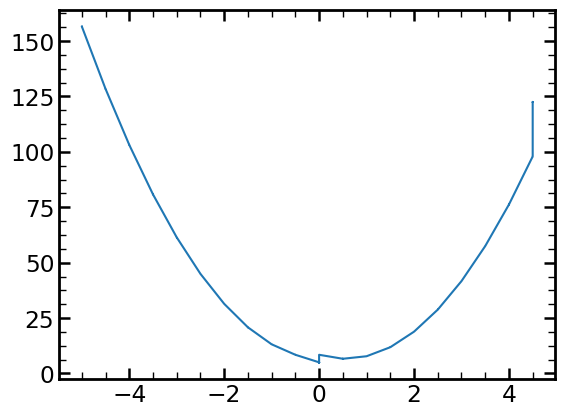

In [78]:
from astropy.io import *

res=[]
for i in range(8546,8635+1):
    hdul = fits.open('/Users/nevencaplar/Documents/PFS/2017-12-15/v000'+str(i)+'/PFLAr1.fits')
    res.append([i,hdul[0].header['W_FCA_FOCUS'],hdul[0].header['EXPTIME']])

    
res=np.array(res)
res_exposure_times=res

plt.plot(res[:,1],res[:,2])

In [79]:
from astropy.io import *

res=[]
for i in range(8637,8708+1):
    hdul = fits.open('/Users/nevencaplar/Documents/PFS/2017-12-15-Rerun/v000'+str(i)+'/PFLAr1.fits')
    res.append([hdul[0].header['W_FCA_FOCUS'],hdul[0].header['EXPTIME']])

    
res=np.array(res)

In [80]:
# which one is the brightest
obs=8600
res=[]
for image_index in [5,15,25,35,45,55,65,75,85,95]:
    sci_image=np.load("/Users/nevencaplar/Documents/PFS/TigerAnalysis/CutsForTigerAug15/sci"+str(obs)+str(image_index)+'Stacked_Cleaned_Dithered.npy')
    res.append([image_index,np.sum(sci_image)])
    
res=np.array(res)

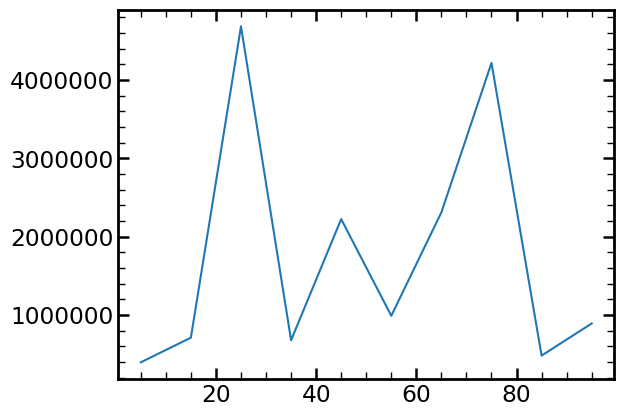

In [81]:
plt.plot(res[:,0],res[:,1])

In [82]:
# which one is the brightest
obs=8600
res=[]
for image_index in [50,51,52,53,54,55,55,57,58,59]:
    sci_image=np.load("/Users/nevencaplar/Documents/PFS/TigerAnalysis/CutsForTigerAug15/sci"+str(obs)+str(image_index)+'Stacked_Cleaned_Dithered.npy')
    res.append([image_index,np.sum(sci_image)])
    
res=np.array(res)

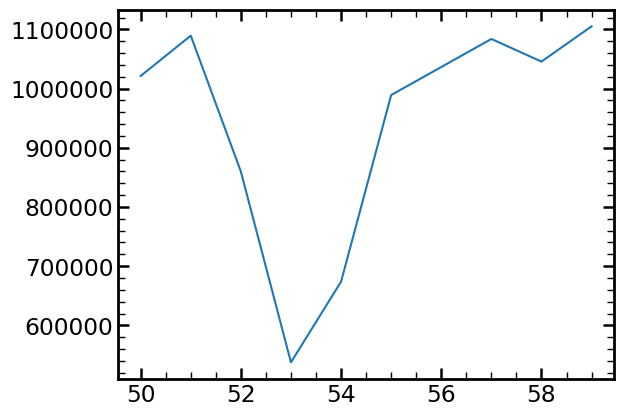

In [83]:
plt.plot(res[:,0],res[:,1])

## Interpolate to get the result 

In [10]:
#take images without stacking!!!!
res=[]
for obs in range(8549,8633,3):
    sci_image=np.load('/Volumes/My Passport for Mac/Old_Files/PFS/ReducedData/2017-12-15/Stamps/sci'+str(obs)+'25.npy')
    hdul = fits.open('/Volumes/My Passport for Mac/Old_Files/PFS/ReducedData/2017-12-15/v000'+str(obs)+'/PFLAr1.fits')
    res.append([obs,hdul[0].header['W_FCA_FOCUS'],hdul[0].header['EXPTIME'],np.max(sci_image)])

res=np.array(res)
res_flux=res

In [11]:
res_flux

array([[ 8549.        ,    -4.50003   ,   128.459     , 17383.35742188],
       [ 8552.        ,    -4.00001   ,   103.177     , 12640.74902344],
       [ 8555.        ,    -3.50001   ,    80.828     , 13089.54785156],
       [ 8558.        ,    -3.        ,    61.426     , 12503.11132812],
       [ 8561.        ,    -2.5       ,    44.952     , 13214.87792969],
       [ 8564.        ,    -2.        ,    31.423     , 13570.40722656],
       [ 8567.        ,    -1.50001   ,    20.817     , 14268.42578125],
       [ 8570.        ,    -0.99999   ,    13.147     , 16692.67578125],
       [ 8573.        ,    -0.50001   ,     8.42      , 26595.54882812],
       [ 8576.        ,     0.        ,     5.013     , 31475.79296875],
       [ 8579.        ,     0.00001   ,     5.013     , 31973.62890625],
       [ 8582.        ,     0.        ,     5.013     , 31429.88671875],
       [ 8585.        ,    -0.00001   ,     5.013     , 31366.59765625],
       [ 8588.        ,    -0.00001   ,     5.013  

In [12]:
# total time 
np.sum(res_flux[:,2]*3)/3600

0.7444774999999999

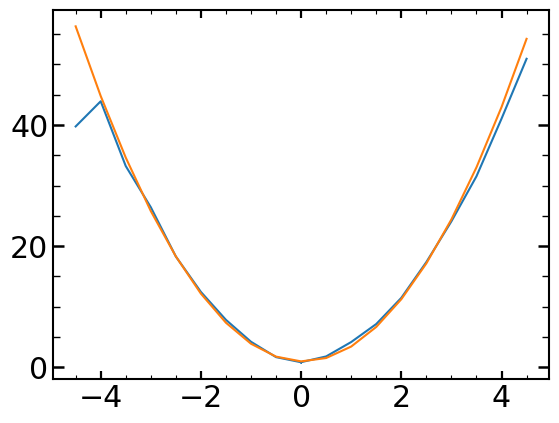

In [20]:
p4=np.poly1d(np.polyfit(np.round(res_flux[:,1][1:],1),(40000/res_flux[:,3][1:])*res_flux[:,2][1:],2,w=-20+np.sqrt((40000/res_flux[:,3][1:])*res_flux[:,2][1:])))/7.4378279674728365


plt.plot(np.round(res_flux[:,1],1),((40000/res_flux[:,3])*res_flux[:,2])/7.4378279674728365)
plt.plot(np.round(res_flux[:,1],1),p4(np.round(res_flux[:,1],1)))

In [22]:
p4

poly1d([ 2.67750812, -0.22915717,  1.        ])

In [23]:
res_HgAr_exposures=[]
for i in np.unique(np.round(res_flux[:,1][0:],1)):
    res_HgAr_exposures.append([i,p4(i)])
    
res_HgAr_exposures=np.array(res_HgAr_exposures)

In [27]:
res_HgAr_exposures[:,0]

array([-4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,
        1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

In [90]:
res=[]
for i in range(10):
    res.append([(np.abs(res_HgAr_exposures[:,0][0+i])+res_HgAr_exposures[:,0][-1-i])/2,np.round((res_HgAr_exposures[:,1][0+i]+res_HgAr_exposures[:,1][-1-i])/2)])
    
res_HgAr_exposures_round=np.array(res)

In [91]:
res_HgAr_exposures_round

array([[  4.5, 411. ],
       [  4. , 326. ],
       [  3.5, 251. ],
       [  3. , 187. ],
       [  2.5, 132. ],
       [  2. ,  87. ],
       [  1.5,  52. ],
       [  1. ,  27. ],
       [  0.5,  12. ],
       [  0. ,   7. ]])

## summing all together 

In [92]:
res_HgAr_exposures_round[:,1]=res_HgAr_exposures_round[:,1]
res_HgAr_exposures_round[:,1]

array([411., 326., 251., 187., 132.,  87.,  52.,  27.,  12.,   7.])

In [93]:
res_HgAr_exposures_round_with_overhead=np.copy(res_HgAr_exposures_round)
res_HgAr_exposures_round_with_overhead[:,1]=res_HgAr_exposures_round_with_overhead[:,1]+40

In [94]:
Dithered_HgAr=(res_HgAr_exposures_round[:,1][-1]*(30*4)+2*res_HgAr_exposures_round[:,1][-2]*(6*4)+2*res_HgAr_exposures_round[:,1][-3]*(6*4))
Dithered_HgAr/3600

0.7533333333333333

In [95]:
Dithered_HgAr_with_overhead=(res_HgAr_exposures_round_with_overhead[:,1][-1]*(30*4)+2*res_HgAr_exposures_round_with_overhead[:,1][-2]*(6*4)+2*res_HgAr_exposures_round_with_overhead[:,1][-3]*(6*4))
Dithered_HgAr_with_overhead/3600

3.1533333333333333

In [96]:
NoDithered_HgAr=(res_HgAr_exposures_round[:,1][-4]*3*2+res_HgAr_exposures_round[:,1][-5]*3*2+
            res_HgAr_exposures_round[:,1][-6]*3*2+res_HgAr_exposures_round[:,1][-7]*3*2+res_HgAr_exposures_round[:,1][-8]*3*2+res_HgAr_exposures_round[:,1][-9]*3*2)
NoDithered_HgAr/3600

1.725

In [97]:
NoDithered_HgAr_with_overhead=(res_HgAr_exposures_round_with_overhead[:,1][-4]*3*2+res_HgAr_exposures_round_with_overhead[:,1][-5]*3*2+
            res_HgAr_exposures_round_with_overhead[:,1][-6]*3*2+res_HgAr_exposures_round_with_overhead[:,1][-7]*3*2+res_HgAr_exposures_round_with_overhead[:,1][-8]*3*2+res_HgAr_exposures_round_with_overhead[:,1][-9]*3*2)
NoDithered_HgAr_with_overhead/3600

2.125

In [98]:
Dithered=(res_HgAr_exposures_round[:,1][-1]*(30*4)+2*res_HgAr_exposures_round[:,1][-2]*(30*4)+2*res_HgAr_exposures_round[:,1][-2]*(30*4))
Dithered/3600

1.8333333333333333

In [99]:
Dithered_with_overhead=(res_HgAr_exposures_round_with_overhead[:,1][-1]*(30*4)+2*res_HgAr_exposures_round_with_overhead[:,1][-2]*(30*4)+2*res_HgAr_exposures_round_with_overhead[:,1][-2]*(30*4))
Dithered_with_overhead/3600

8.5

In [100]:
(Dithered_HgAr+NoDithered_HgAr)/3600

2.4783333333333335

In [101]:
(Dithered_HgAr_with_overhead+NoDithered_HgAr_with_overhead)/3600

5.278333333333333

## comparing flux between new and old on the raw data 

In [102]:
with open('/Users/nevencaplar/Documents/PFS/Data_Nov_14/Dataframes/finalHgAr_expanded.pkl', 'rb') as f:
    finalHgAr=pickle.load(f)

In [103]:
# I know this was the brightest spot in the old data
finalHgAr[finalHgAr["old_index"]==25]

fiber    xc    yc wavelength close  lamp  xc_effective  old_index  \
69     5  2088  3322   912.5693     1  HgAr          2157       25.0   

    old_index_aprox  
69               25

In [104]:
old_data_Dec15_2017=fits.open('/Volumes/My Passport for Mac/Old_Files/PFS/LAM/raw/2017-12-15/PFLA00860312.fits')[0].data
old_data_Dec15_2017_reduced=fits.open('/Users/nevencaplar/Documents/PFS/2017-12-15-Rerun/v0008603/PFLAr1.fits')[1].data
new_data_Jan24_2019=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-24/PFLA01135012.fits')[0].data

new_data_Jan24_2019_only_Ar=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01144112.fits')[0].data

In [105]:
print(fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-24/PFLA01135012.fits')[0].header['EXPTIME'])
print(fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01144112.fits')[0].header['EXPTIME'])

3.999
3.999


In [106]:
old_data_Dec15_2017_reduced_cut25=old_data_Dec15_2017_reduced[3322-200:3322+200,2088-200:2088+200]
old_data_Dec15_2017_cut25=old_data_Dec15_2017[3322-200+50:3322+200+50,2088-200+150:2088+200+150]

new_data_Jan24_2019_cut25=new_data_Jan24_2019[3322-200+50:3322+200+50,2088-200+150:2088+200+150]
new_data_Jan24_2019_cut25_only_Ar=new_data_Jan24_2019_only_Ar[3322-200+50:3322+200+50,2088-200+150:2088+200+150]

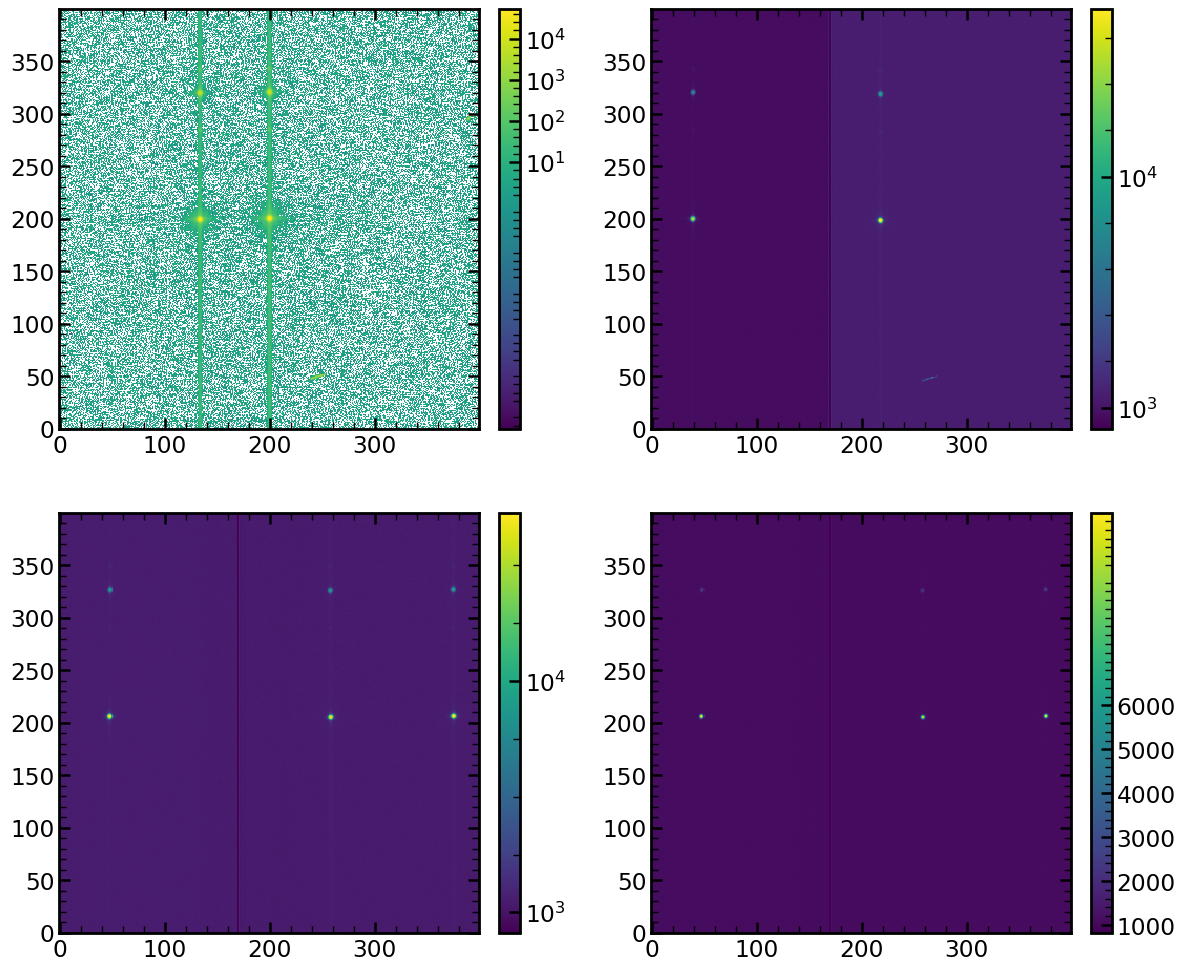

In [107]:
matplotlib.rcParams.update({'font.size': 14})

plt.figure(figsize=(14,12))
plt.subplot(221)
plt.imshow(old_data_Dec15_2017_reduced_cut25,norm=LogNorm())
cbar=plt.colorbar(fraction=0.046, pad=0.04)
cbar.set_ticks([10,10**2,10**3,10**4,10**5])

plt.subplot(222)
plt.imshow(old_data_Dec15_2017_cut25,norm=LogNorm())
cbar=plt.colorbar(fraction=0.046, pad=0.04)
cbar=cbar.set_ticks([10,10**2,10**3,10**4,10**5])

plt.subplot(223)
plt.imshow(new_data_Jan24_2019_cut25,norm=LogNorm())
cbar=plt.colorbar(fraction=0.046, pad=0.04)
cbar=cbar.set_ticks([10,10**2,10**3,10**4,10**5])

plt.subplot(224)
plt.imshow(new_data_Jan24_2019_cut25_only_Ar)
cbar=plt.colorbar(fraction=0.046, pad=0.04)
cbar=cbar.set_ticks([1000,2000,3000,4000,5000,6000])


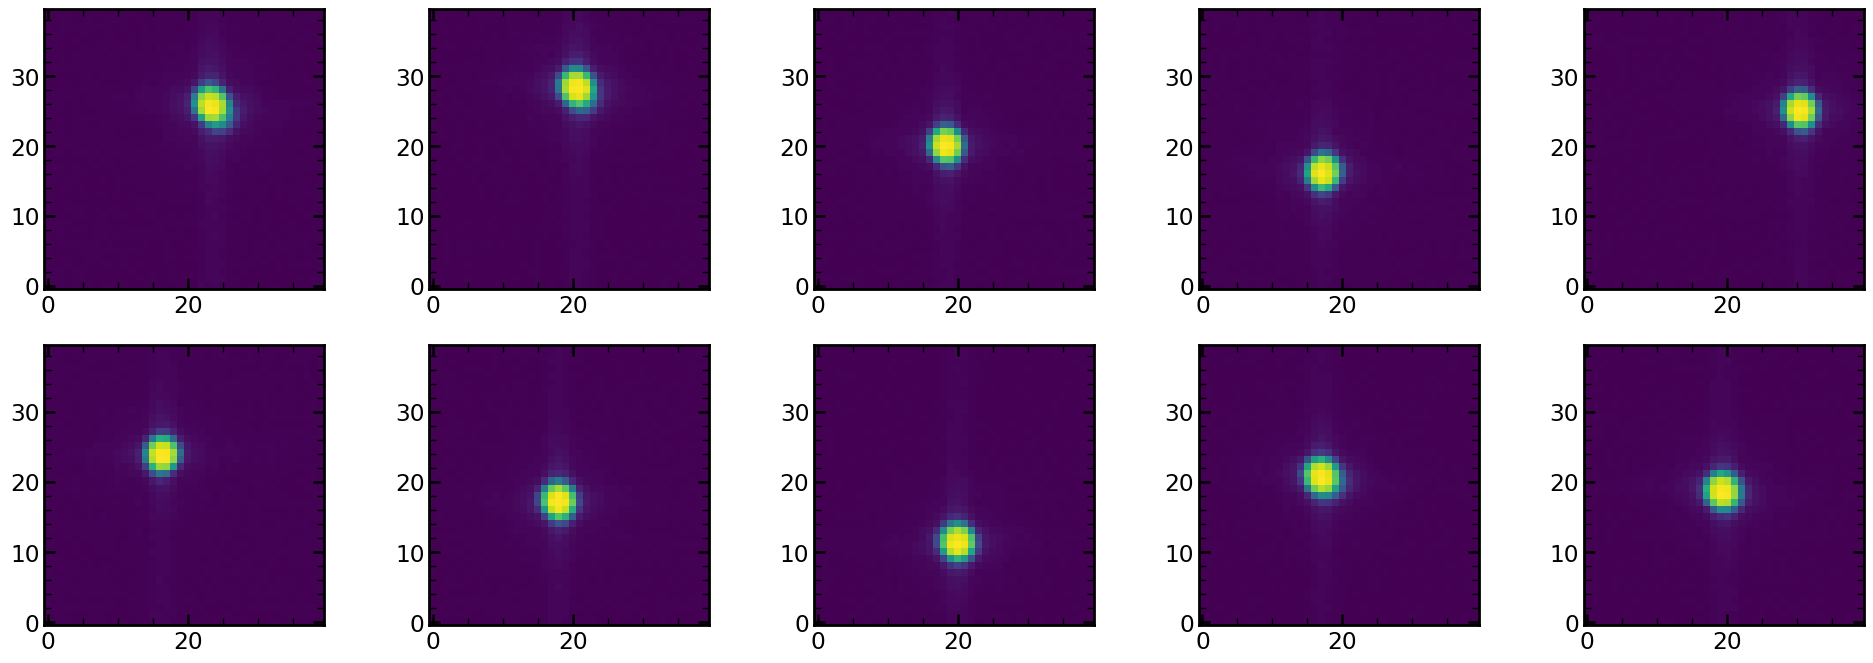

In [108]:
# we are looking at the spot that is at y=3376 for non-reduced images
size=20

list_of_x_coordinates=[90,473,1341,1692,1329,2081,2258,2638,3952,4336]
list_of_y_coordinates=[3420,3397,3378,3373,3373,3368,3373,3382,3428,3409]
old_data_Dec15_2017_cut25s=[]
for i in range(10):
    old_data_Dec15_2017_cut25s.append(old_data_Dec15_2017[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
    
    
plt.figure(figsize=(24,8))
plt.subplot(251)
plt.imshow(old_data_Dec15_2017_cut25s[0],norm=LogNorm())
plt.subplot(252)
plt.imshow(old_data_Dec15_2017_cut25s[1],norm=LogNorm())
plt.subplot(253)
plt.imshow(old_data_Dec15_2017_cut25s[2],norm=LogNorm())
plt.subplot(254)
plt.imshow(old_data_Dec15_2017_cut25s[3],norm=LogNorm())

plt.subplot(255)
plt.imshow(old_data_Dec15_2017_cut25s[4],norm=LogNorm())
plt.subplot(256)
plt.imshow(old_data_Dec15_2017_cut25s[5],norm=LogNorm())
plt.subplot(257)
plt.imshow(old_data_Dec15_2017_cut25s[6],norm=LogNorm())
plt.subplot(258)
plt.imshow(old_data_Dec15_2017_cut25s[7],norm=LogNorm())    

plt.subplot(259)
plt.imshow(old_data_Dec15_2017_cut25s[8],norm=LogNorm())
plt.subplot(2,5,10)
plt.imshow(old_data_Dec15_2017_cut25s[9],norm=LogNorm()) 

In [109]:
# subtract maximal value from the median of the values on the edge of the image (rough estimation of the background)
max_flux_in_fibers_in_old_data=[]
for i in range(10):
    max_flux_in_fibers_in_old_data.append(np.max(old_data_Dec15_2017_cut25s[i])-np.median(old_data_Dec15_2017_cut25s[i][:,0]))
    
max_flux_in_fibers_in_old_data

[54989.5,
 55597.0,
 48872.0,
 40238.0,
 48871.5,
 30076.5,
 52008.5,
 54224.0,
 59789.0,
 53170.0]

In [110]:
np.max(old_data_Dec15_2017_cut25s[5])

31000

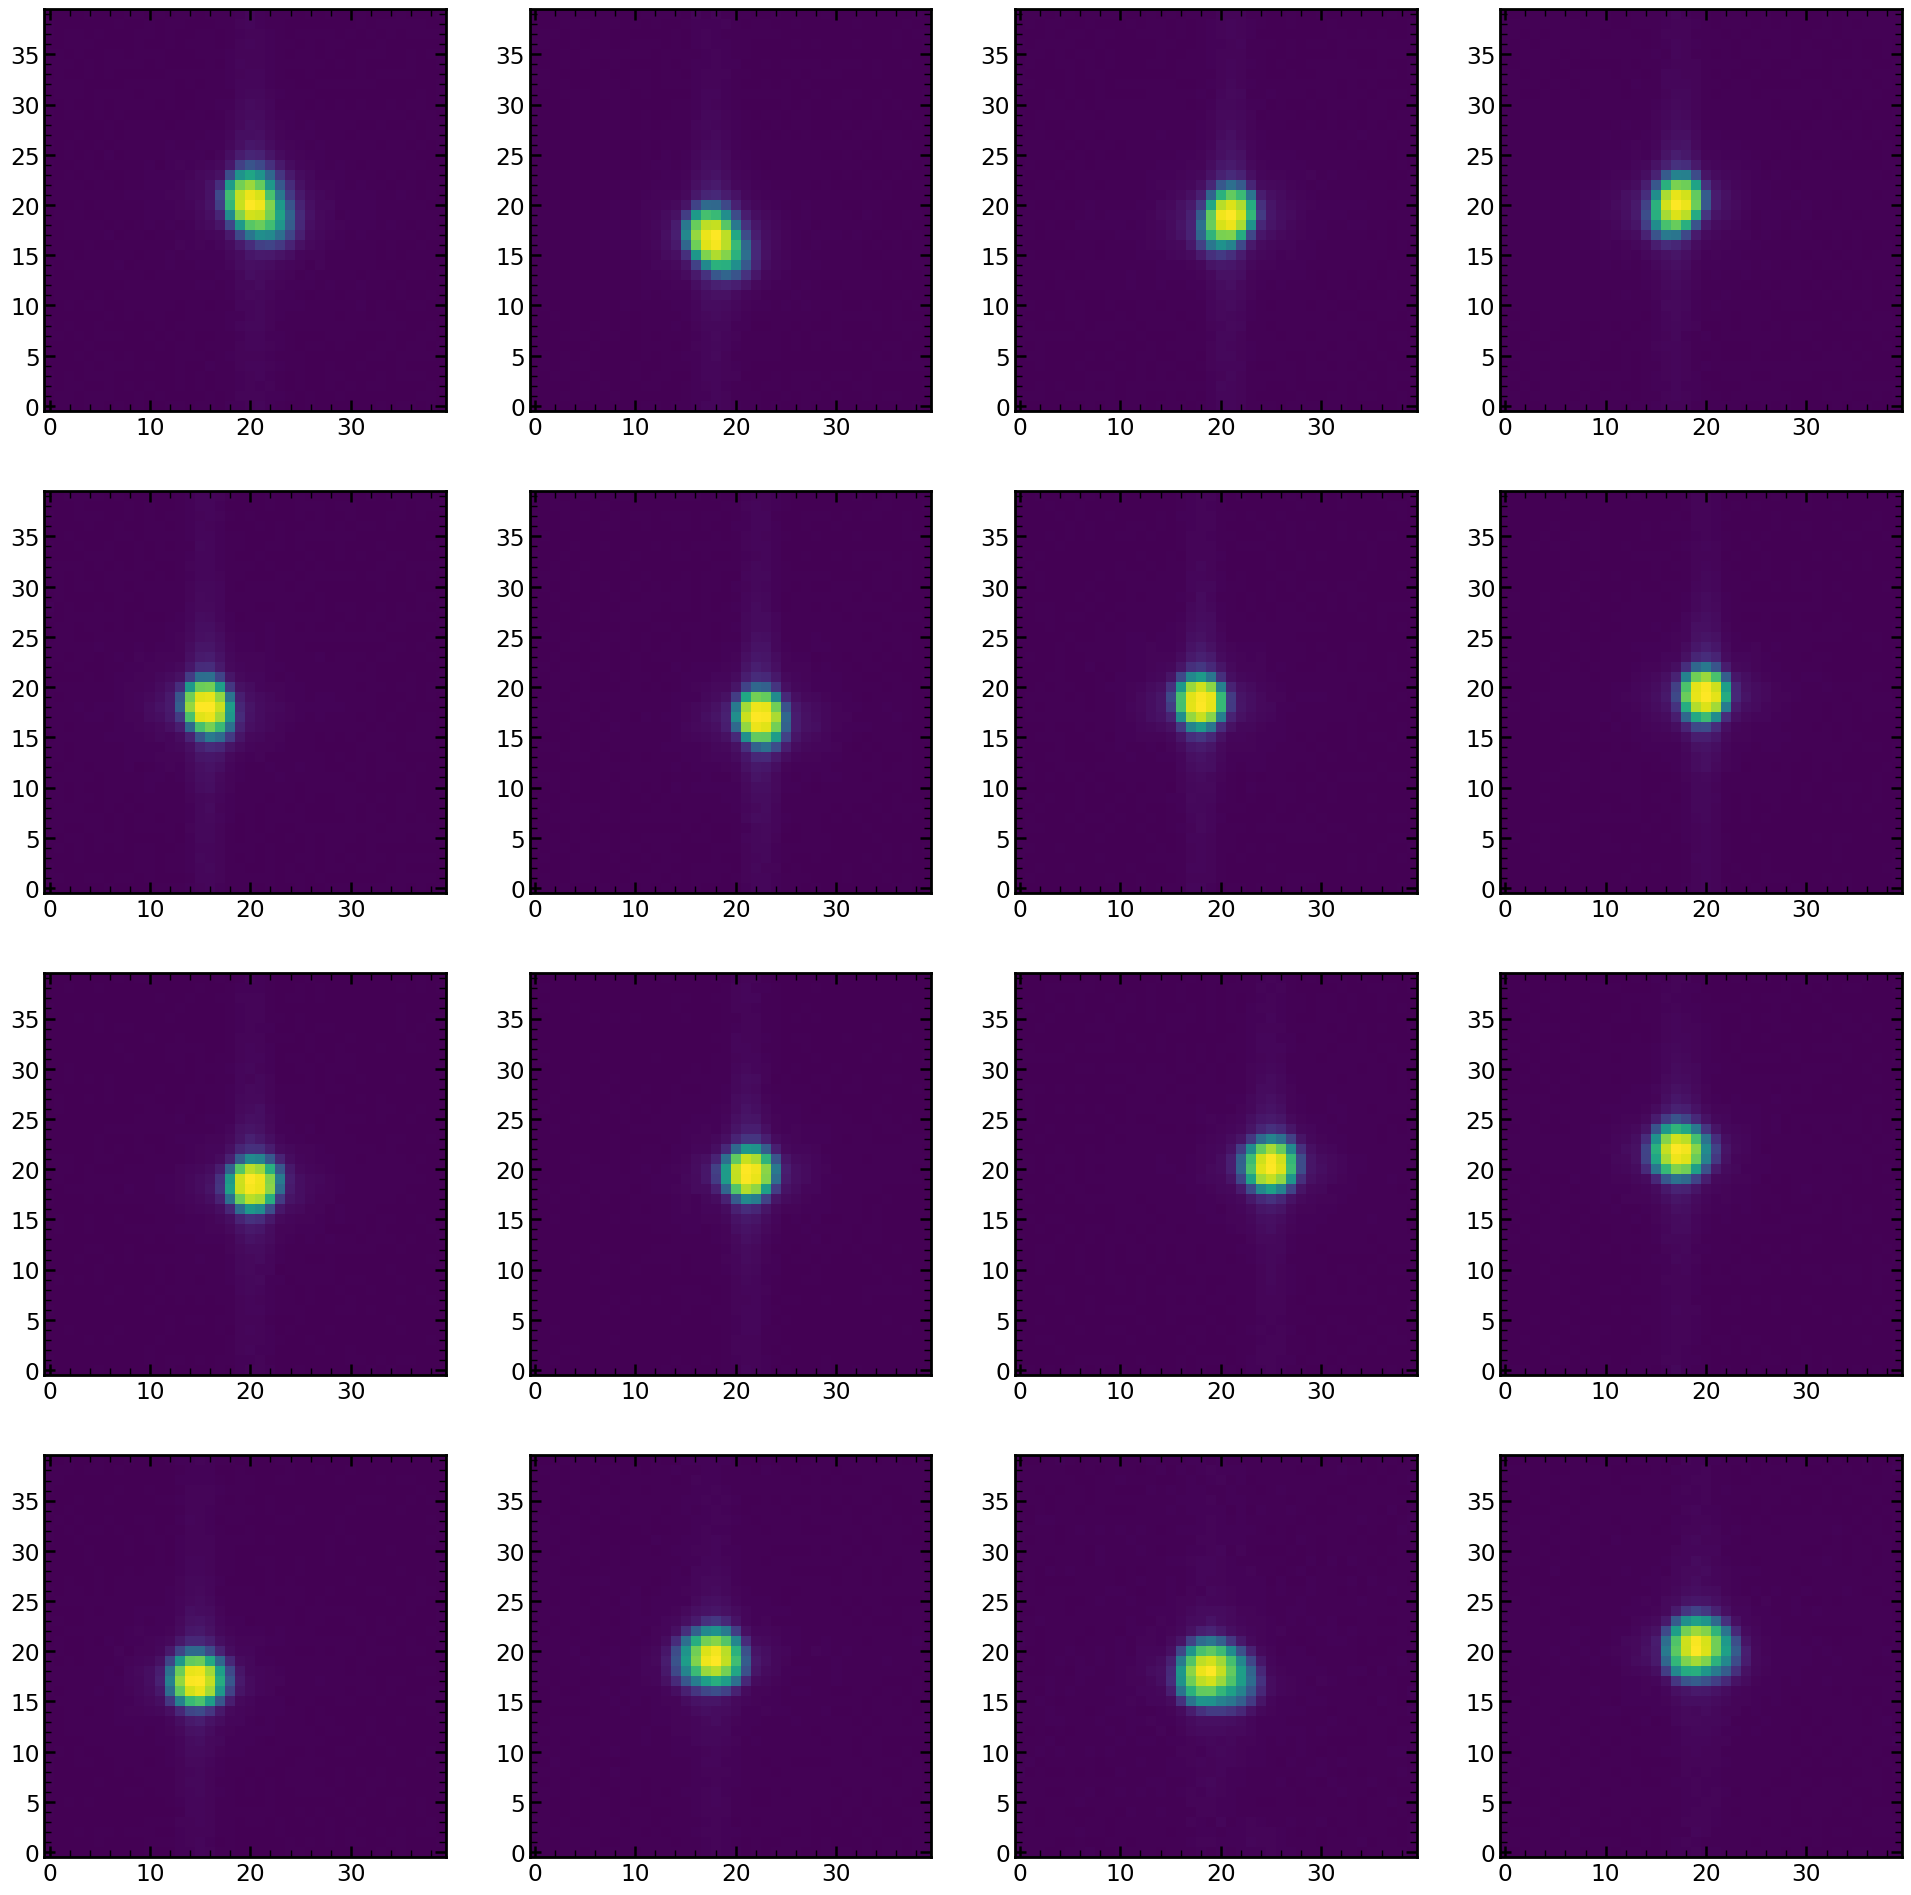

In [111]:
# we are looking at the spot that is at y=3376 for non-reduced images
size=20

new_data_Jan24_2019_cut25s_only_Ar=[]
new_data_Jan24_2019_cut25s=[]

list_of_x_coordinates=[272,486,679,726,1329,1606,1712,2086,2296,2412,2618,2998,3192,3595,4132,4325]
list_of_y_coordinates=[3414,3408,3391,3391,3384,3381,3378,3378,3378,3378,3380,3387,3387,3407,3433,3420]
new_data_Jan24_2019_cut25s=[]
for i in range(16):
    new_data_Jan24_2019_cut25s.append(new_data_Jan24_2019[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])

for i in range(16):
    new_data_Jan24_2019_cut25s_only_Ar.append(new_data_Jan24_2019_only_Ar[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])    

plt.figure(figsize=(24,24))
plt.subplot(441)
plt.imshow(new_data_Jan24_2019_cut25s[0],norm=LogNorm())
plt.subplot(442)
plt.imshow(new_data_Jan24_2019_cut25s[1],norm=LogNorm())
plt.subplot(443)
plt.imshow(new_data_Jan24_2019_cut25s[2],norm=LogNorm())
plt.subplot(444)
plt.imshow(new_data_Jan24_2019_cut25s[3],norm=LogNorm())

plt.subplot(445)
plt.imshow(new_data_Jan24_2019_cut25s[4],norm=LogNorm())
plt.subplot(446)
plt.imshow(new_data_Jan24_2019_cut25s[5],norm=LogNorm())
plt.subplot(447)
plt.imshow(new_data_Jan24_2019_cut25s[6],norm=LogNorm())
plt.subplot(448)
plt.imshow(new_data_Jan24_2019_cut25s[7],norm=LogNorm())

plt.subplot(449)
plt.imshow(new_data_Jan24_2019_cut25s[8],norm=LogNorm())
plt.subplot(4,4,10)
plt.imshow(new_data_Jan24_2019_cut25s[9],norm=LogNorm())
plt.subplot(4,4,11)
plt.imshow(new_data_Jan24_2019_cut25s[10],norm=LogNorm())
plt.subplot(4,4,12)
plt.imshow(new_data_Jan24_2019_cut25s[11],norm=LogNorm())

plt.subplot(4,4,13)
plt.imshow(new_data_Jan24_2019_cut25s[12],norm=LogNorm())
plt.subplot(4,4,14)
plt.imshow(new_data_Jan24_2019_cut25s[13],norm=LogNorm())
plt.subplot(4,4,15)
plt.imshow(new_data_Jan24_2019_cut25s[14],norm=LogNorm())
plt.subplot(4,4,16)
plt.imshow(new_data_Jan24_2019_cut25s[15],norm=LogNorm())


In [112]:
# subtract maximal value from the median of the values on the edge of the image (rough estimation of the background)
max_flux_in_fibers_in_new_data=[]
for i in range(16):
    max_flux_in_fibers_in_new_data.append(np.max(new_data_Jan24_2019_cut25s[i])-np.median(new_data_Jan24_2019_cut25s[i][:,0]))
    
# subtract maximal value from the median of the values on the edge of the image (rough estimation of the background)
max_flux_in_fibers_in_new_data_only_Ar=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_only_Ar.append(np.max(new_data_Jan24_2019_cut25s_only_Ar[i])-np.median(new_data_Jan24_2019_cut25s_only_Ar[i][:,0]))

In [113]:
max_flux_in_fibers_in_new_data_only_Ar

[7301.0,
 7345.0,
 9113.0,
 8170.0,
 10210.5,
 10551.0,
 9601.0,
 9265.5,
 8443.0,
 9167.5,
 7936.0,
 7841.5,
 7140.0,
 4628.5,
 2293.0,
 4590.0]

Text(0,0.5,'Max number of counts')

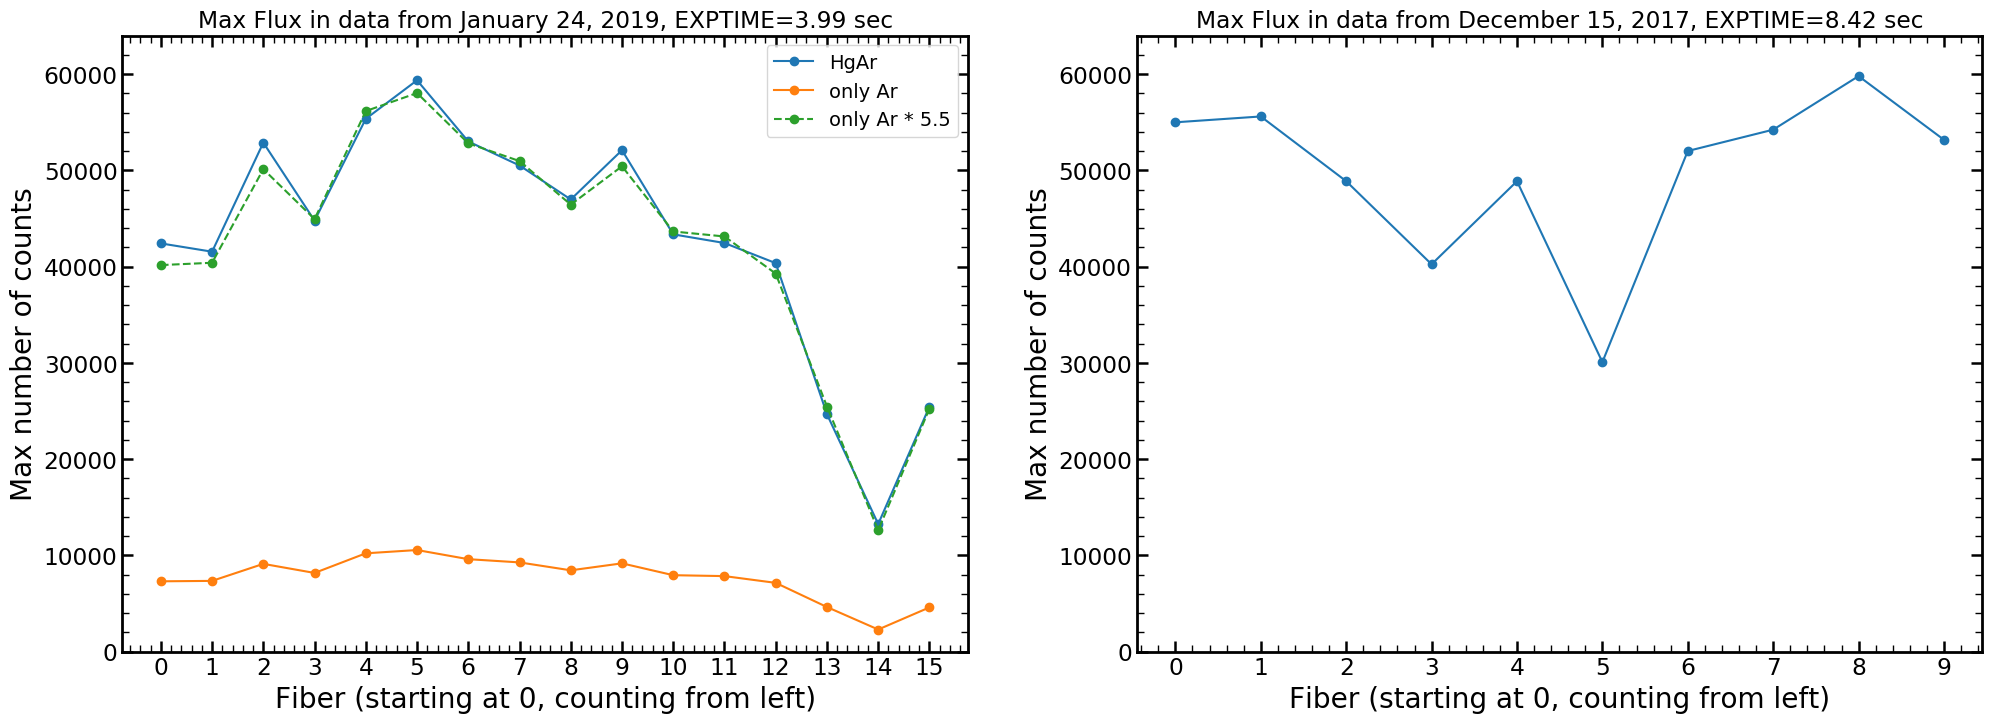

In [114]:
    
plt.figure(figsize=(24,8))
plt.subplot(121)

plt.plot(max_flux_in_fibers_in_new_data,marker='o',label='HgAr')
plt.plot(max_flux_in_fibers_in_new_data_only_Ar,marker='o',label='only Ar')
plt.plot(np.array(max_flux_in_fibers_in_new_data_only_Ar)*5.5,marker='o',ls='--',label='only Ar * 5.5')

plt.xticks(range(16))
plt.ylim(0,64000)
plt.title('Max Flux in data from January 24, 2019, EXPTIME=3.99 sec')
plt.xlabel('Fiber (starting at 0, counting from left)')
plt.ylabel('Max number of counts')
plt.legend()

plt.subplot(122)
plt.plot(max_flux_in_fibers_in_old_data,marker='o')
plt.xticks(range(10))
plt.ylim(0,64000)
plt.title('Max Flux in data from December 15, 2017, EXPTIME=8.42 sec')
plt.xlabel('Fiber (starting at 0, counting from left)')
plt.ylabel('Max number of counts')

In [115]:
max_flux_in_fibers_in_old_data_HgAr=max_flux_in_fibers_in_old_data

In [42]:
np.array(max_flux_in_fibers_in_new_data_only_Ar)*4

array([29204., 29380., 36452., 32680., 40842., 42204., 38404., 37062.,
       33772., 36670., 31744., 31366., 28560., 18514.,  9172., 18360.])

In [43]:
res_HgAr_exposures=[]
for i in np.unique(np.round(res_flux[:,1][0:],1)):
    res_HgAr_exposures.append([i,p4(i)])
    
res_HgAr_exposures=np.array(res_HgAr_exposures)

res_HgAr_exposures_modified=np.copy(res_HgAr_exposures)
res_HgAr_exposures_modified[:,1]=res_HgAr_exposures_modified[:,1]*3.999/8.34

In [44]:
res_HgAr_exposures_modified

array([[ -4.5       , 200.61332429],
       [ -4.        , 159.62103003],
       [ -3.5       , 123.40328399],
       [ -3.        ,  91.96008617],
       [ -2.5       ,  65.29143656],
       [ -2.        ,  43.39733517],
       [ -1.5       ,  26.27778199],
       [ -1.        ,  13.93277703],
       [ -0.5       ,   6.36232028],
       [  0.        ,   3.56641176],
       [  0.5       ,   5.54505144],
       [  1.        ,  12.29823935],
       [  1.5       ,  23.82597546],
       [  2.        ,  40.1282598 ],
       [  2.5       ,  61.20509235],
       [  3.        ,  87.05647312],
       [  3.5       , 117.6824021 ],
       [  4.        , 153.0828793 ],
       [  4.5       , 193.25790471]])

In [45]:
res=[]
for i in range(10):
    res.append([(np.abs(res_HgAr_exposures_modified[:,0][0+i])+res_HgAr_exposures_modified[:,0][-1-i])/2,np.floor((res_HgAr_exposures_modified[:,1][0+i]+res_HgAr_exposures_modified[:,1][-1-i])/2)])
    
res_HgAr_exposures_modified_round=np.array(res)
res_HgAr_exposures_modified_round

array([[  4.5, 196. ],
       [  4. , 156. ],
       [  3.5, 120. ],
       [  3. ,  89. ],
       [  2.5,  63. ],
       [  2. ,  41. ],
       [  1.5,  25. ],
       [  1. ,  13. ],
       [  0.5,   5. ],
       [  0. ,   3. ]])

In [46]:
LamCoorectiveFactor=297/196

In [47]:
#5.5 factor coming from comparison of the flux between Argon and HgAr data
res=[]
for i in range(10):
    res.append([(np.abs(res_HgAr_exposures_modified[:,0][0+i])+res_HgAr_exposures_modified[:,0][-1-i])/2,np.floor(5.5*LamCoorectiveFactor*(res_HgAr_exposures_modified[:,1][0+i]+res_HgAr_exposures_modified[:,1][-1-i])/2)])
    
res_Ar_exposures_modified_round=np.array(res)
res_Ar_exposures_modified_round

array([[   4.5, 1641. ],
       [   4. , 1303. ],
       [   3.5, 1004. ],
       [   3. ,  745. ],
       [   2.5,  527. ],
       [   2. ,  348. ],
       [   1.5,  208. ],
       [   1. ,  109. ],
       [   0.5,   49. ],
       [   0. ,   29. ]])

## Neon data 

In [7]:
old_data_Dec15_2017=fits.open('/Volumes/My Passport for Mac/Old_Files/PFS/LAM/raw/2017-12-15/PFLA00869312.fits')[0].data
old_data_Dec15_2017_reduced=fits.open('/Users/nevencaplar/Documents/PFS/2017-12-15-Rerun/v0008693/PFLAr1.fits')[1].data
new_data_Jan24_2019=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143812.fits')[0].data

FileNotFoundError: [Errno 2] No such file or directory: '/Users/nevencaplar/Documents/PFS/2017-12-15-Rerun/v0008693/PFLAr1.fits'

In [49]:
# which object is the brightest
# how many images are in this stack - 3 (Stacked_Dithered=12, Stacked =3)
obs=8690
res=[]
for image_index in np.array([5,15,25,35,45,55,65,75,85,95]):
    sci_image=np.load("/Users/nevencaplar/Documents/PFS/2017-12-15-Rerun/StampsNeon/sci"+str(obs)+str(image_index)+'Stacked.npy')
    res.append([image_index,np.sum(sci_image),np.max(sci_image)])
    
res=np.array(res)

In [50]:
# from this we see that spot 65 is the brightest
res

array([[     5.        ,   4450.4375    ,    324.22302246],
       [    15.        ,   4943.53173828,    401.55349731],
       [    25.        ,   5546.07910156,    445.65759277],
       [    35.        ,  21249.40039062,   1768.12426758],
       [    45.        ,  79241.1328125 ,   6446.16210938],
       [    55.        , 143943.296875  ,  10709.30078125],
       [    65.        , 674670.75      ,  55138.26171875],
       [    75.        , 252569.953125  ,  20155.97851562],
       [    85.        , 174543.75      ,  14313.18457031],
       [    95.        , 124044.328125  ,  10409.8046875 ]])

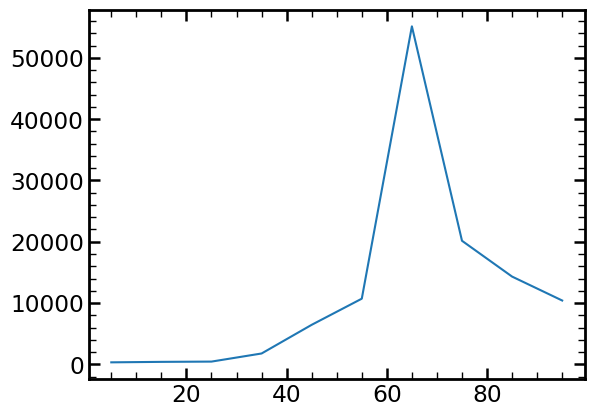

In [51]:
plt.plot(res[:,0],res[:,2])

In [52]:
# which object is the brightest
# how many images are in this stack - 12 (Stacked_Dithered=12, Stacked =3)
obs=8690
res=[]
for image_index in np.array([5,15,25,35,45,55,65,75,85,95]):
    sci_image=np.load("/Users/nevencaplar/Documents/PFS/2017-12-15-Rerun/StampsNeon/sci"+str(obs)+str(image_index)+'Stacked_Dithered.npy')
    res.append([image_index,np.sum(sci_image),np.max(sci_image)])
    
res=np.array(res)

res

array([[       5.        ,    65522.35166834,     1275.70770264],
       [      15.        ,    81780.04436734,     1560.40078735],
       [      25.        ,    88040.09813835,     1777.47592163],
       [      35.        ,   343414.15720771,     6973.84228516],
       [      45.        ,  1266031.14266743,    25535.31835938],
       [      55.        ,  2156779.88208435,    43502.8984375 ],
       [      65.        , 10783487.10600698,   219107.4609375 ],
       [      75.        ,  4027869.47300729,    81156.26953125],
       [      85.        ,  2785880.32528721,    56919.31054688],
       [      95.        ,  1980729.52396098,    40680.0390625 ]])

In [53]:
finalNe.loc[75]

NameError: name 'finalNe' is not defined

In [54]:
#2nd brightest spot
run_full=np.array([8576,8579,8582,8585,8588,8591,8594,8597,8600,8603])+90

res=[]
for obs in run_full:
    sci_image=np.load('/Users/nevencaplar/Documents/PFS/2017-12-15-Rerun/StampsNeon/sci'+str(obs)+'75Stacked.npy')
    hdul = fits.open('/Users/nevencaplar/Documents/PFS/2017-12-15-Rerun/v000'+str(obs)+'/PFLAr1.fits')
    res.append([obs,hdul[0].header['W_FCA_FOCUS'],hdul[0].header['EXPTIME'],np.max(sci_image)])
    
res=np.array(res)
res_flux=res

res

array([[ 8666.        ,     0.        ,     1.006     , 20003.4609375 ],
       [ 8669.        ,     0.00001   ,     1.007     , 20660.18359375],
       [ 8672.        ,     0.        ,     1.006     , 19973.91992188],
       [ 8675.        ,    -0.        ,     1.006     , 20065.66015625],
       [ 8678.        ,    -0.00001   ,     1.006     , 20696.84375   ],
       [ 8681.        ,     0.00001   ,     1.011     , 20221.0859375 ],
       [ 8684.        ,     0.00001   ,     1.006     , 20042.16796875],
       [ 8687.        ,    -0.        ,     1.006     , 20517.53125   ],
       [ 8690.        ,    -0.00001   ,     1.006     , 20155.97851562],
       [ 8693.        ,     0.00001   ,     1.686     , 34053.453125  ]])

In [56]:
#3rd brightest spot
run_full=np.array([8576,8579,8582,8585,8588,8591,8594,8597,8600,8603])+90

res=[]
for obs in run_full:
    sci_image=np.load('/Users/nevencaplar/Documents/PFS/2017-12-15-Rerun/StampsNeon/sci'+str(obs)+'55Stacked.npy')
    hdul = fits.open('/Users/nevencaplar/Documents/PFS/2017-12-15-Rerun/v000'+str(obs)+'/PFLAr1.fits')
    res.append([obs,hdul[0].header['W_FCA_FOCUS'],hdul[0].header['EXPTIME'],np.max(sci_image)])
    
res=np.array(res)
res_flux=res

res

array([[ 8666.        ,     0.        ,     1.006     , 10703.41601562],
       [ 8669.        ,     0.00001   ,     1.007     , 10808.49609375],
       [ 8672.        ,     0.        ,     1.006     , 10795.69042969],
       [ 8675.        ,    -0.        ,     1.006     , 10802.90820312],
       [ 8678.        ,    -0.00001   ,     1.006     , 11188.078125  ],
       [ 8681.        ,     0.00001   ,     1.011     , 10795.5       ],
       [ 8684.        ,     0.00001   ,     1.006     , 10771.83007812],
       [ 8687.        ,    -0.        ,     1.006     , 10781.20898438],
       [ 8690.        ,    -0.00001   ,     1.006     , 10709.30078125],
       [ 8693.        ,     0.00001   ,     1.686     , 18292.14453125]])

In [57]:
with open('/Users/nevencaplar/Documents/PFS/Data_Nov_14/Dataframes/finalNe_expanded.pkl', 'rb') as f:
    finalNe=pickle.load(f)

# in the old, reduced data
y=1142

# in the old, non-reduced data
y=1192

size=20

list_of_x_coordinates=[100,478,1341,1689,2077,2255,2639,2986,3953,4339]
list_of_y_coordinates=[1233,1217,1197,1189,1192,1189,1194,1200,1236,1219]

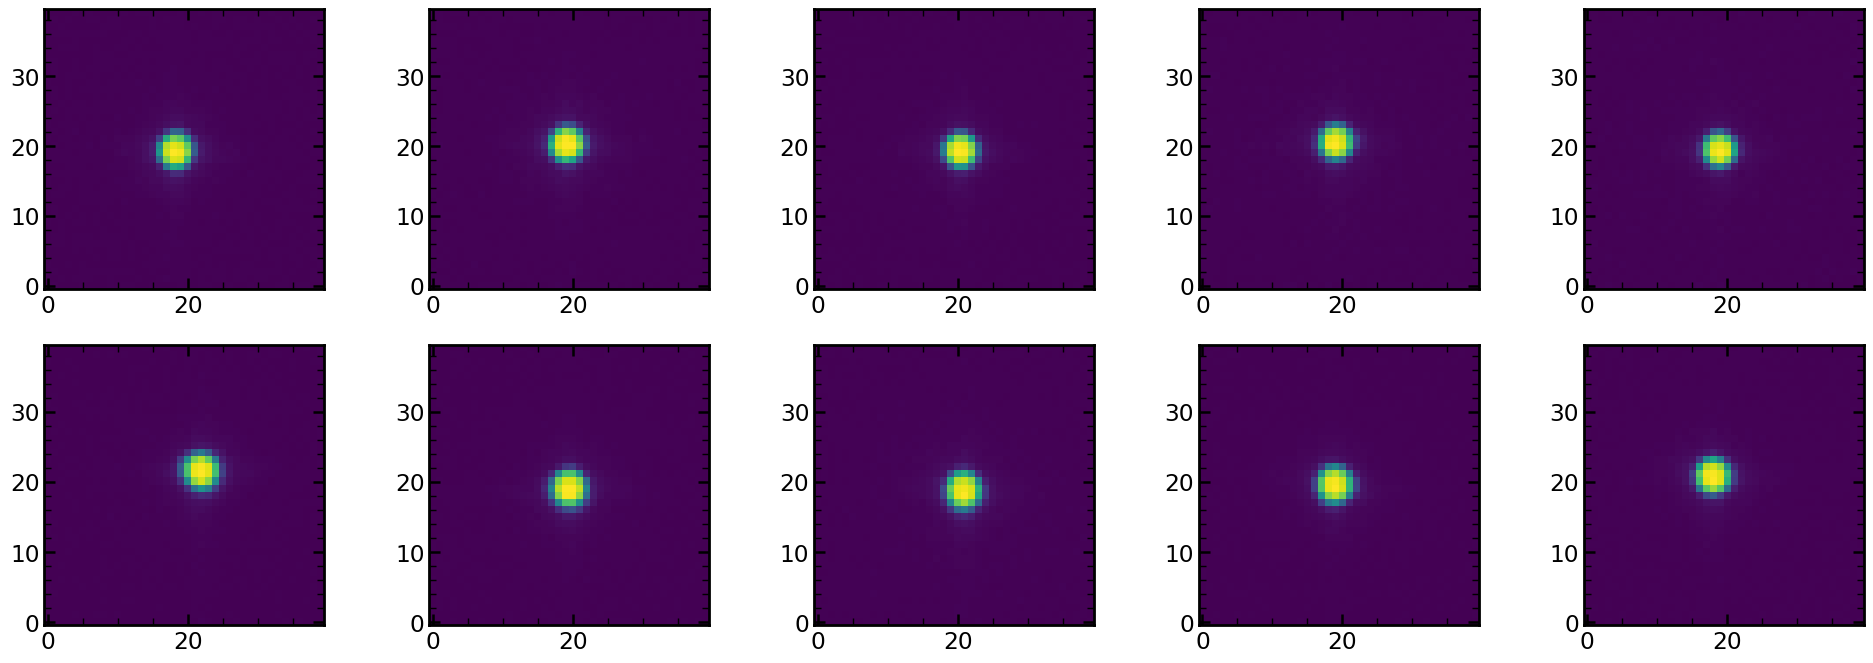

In [58]:
old_data_Dec15_2017_cut25s=[]
for i in range(10):
    old_data_Dec15_2017_cut25s.append(old_data_Dec15_2017[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
    
    
plt.figure(figsize=(24,8))
plt.subplot(251)
plt.imshow(old_data_Dec15_2017_cut25s[0],norm=LogNorm())
plt.subplot(252)
plt.imshow(old_data_Dec15_2017_cut25s[1],norm=LogNorm())
plt.subplot(253)
plt.imshow(old_data_Dec15_2017_cut25s[2],norm=LogNorm())
plt.subplot(254)
plt.imshow(old_data_Dec15_2017_cut25s[3],norm=LogNorm())

plt.subplot(255)
plt.imshow(old_data_Dec15_2017_cut25s[4],norm=LogNorm())
plt.subplot(256)
plt.imshow(old_data_Dec15_2017_cut25s[5],norm=LogNorm())
plt.subplot(257)
plt.imshow(old_data_Dec15_2017_cut25s[6],norm=LogNorm())
plt.subplot(258)
plt.imshow(old_data_Dec15_2017_cut25s[7],norm=LogNorm())    

plt.subplot(259)
plt.imshow(old_data_Dec15_2017_cut25s[8],norm=LogNorm())
plt.subplot(2,5,10)
plt.imshow(old_data_Dec15_2017_cut25s[9],norm=LogNorm()) 

In [59]:
# subtract maximal value from the median of the values on the edge of the image (rough estimation of the background)
max_flux_in_fibers_in_old_data=[]
for i in range(10):
    max_flux_in_fibers_in_old_data.append(np.max(old_data_Dec15_2017_cut25s[i])-np.median(old_data_Dec15_2017_cut25s[i][:,0]))
    
max_flux_in_fibers_in_old_data

[37018.0,
 34673.0,
 28304.0,
 21972.5,
 18063.0,
 30319.5,
 30577.0,
 35765.0,
 36297.0,
 34237.0]

In [60]:
size=20

list_of_x_coordinates=[282,494,672,716,1333,1616,1705,2080,2305,2421,2633,2991,3183,3597,4131,4322]
list_of_y_coordinates=[1223,1216,1206,1208,1200,1200,1197,1197,1194,1197,1199,1207,1204,1221,1237,1229]

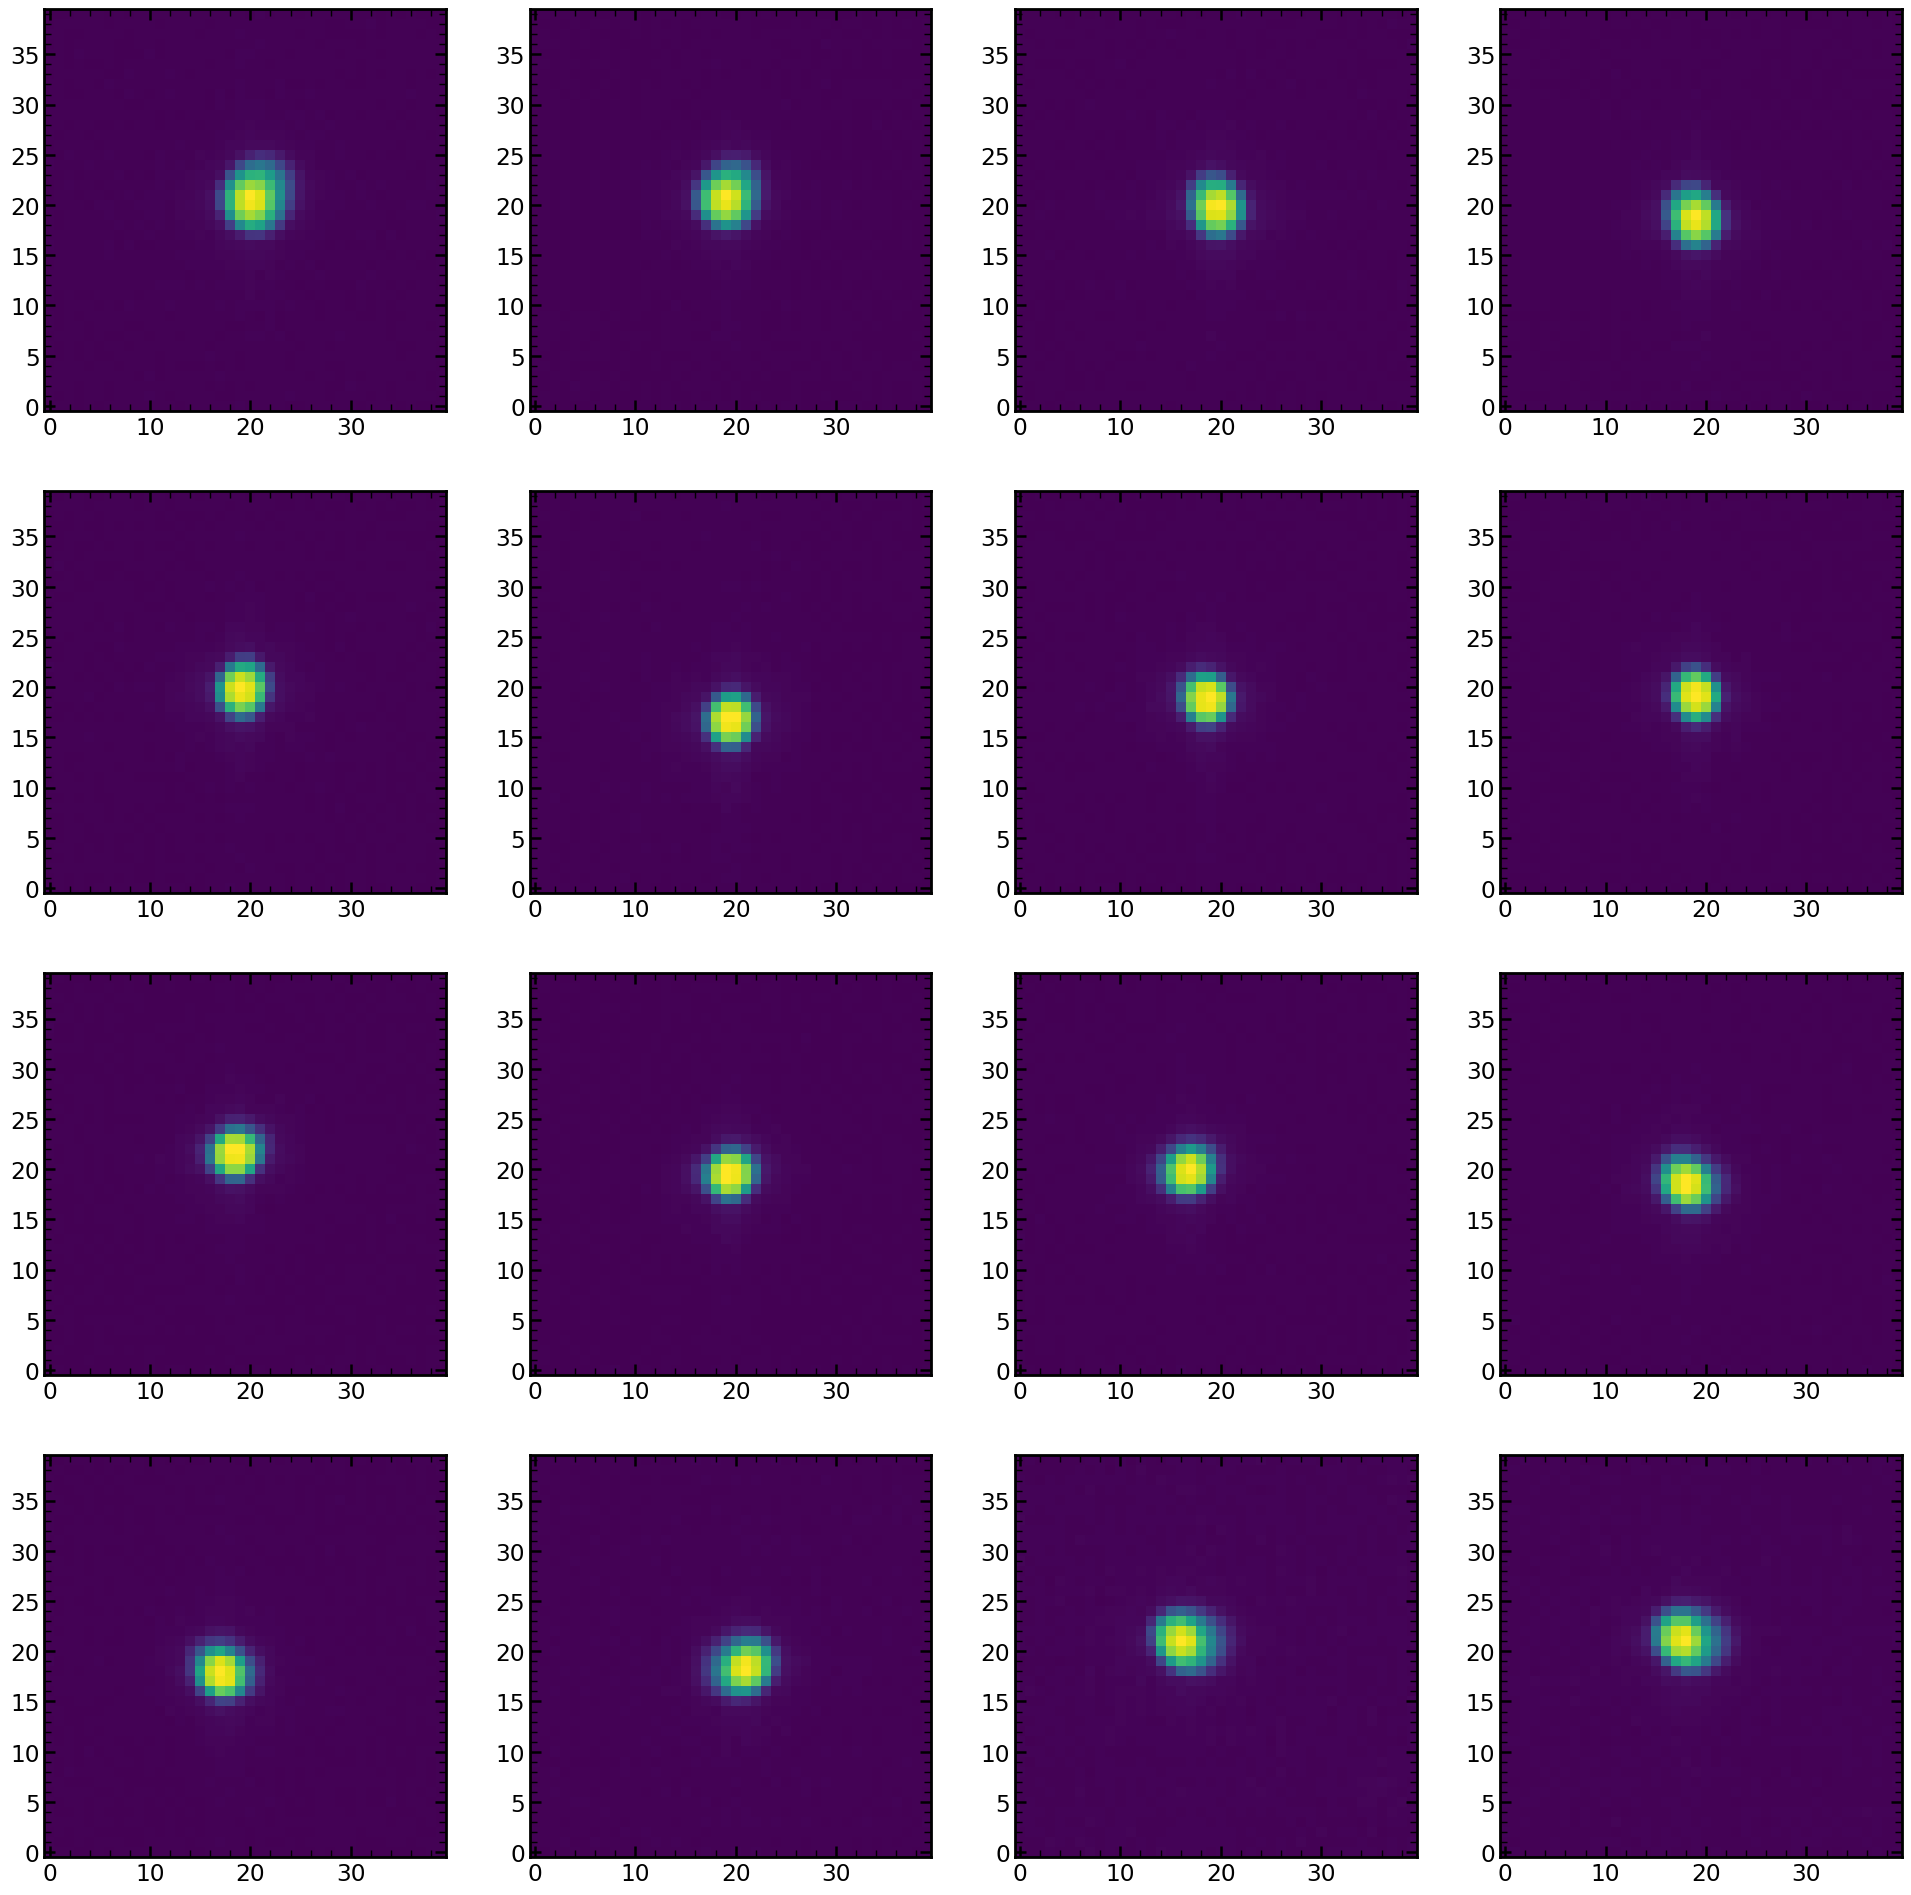

In [61]:
new_data_Jan24_2019_cut25s=[]

for i in range(16):
    new_data_Jan24_2019_cut25s.append(new_data_Jan24_2019[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
 
plt.figure(figsize=(24,24))
plt.subplot(441)
plt.imshow(new_data_Jan24_2019_cut25s[0],norm=LogNorm())
plt.subplot(442)
plt.imshow(new_data_Jan24_2019_cut25s[1],norm=LogNorm())
plt.subplot(443)
plt.imshow(new_data_Jan24_2019_cut25s[2],norm=LogNorm())
plt.subplot(444)
plt.imshow(new_data_Jan24_2019_cut25s[3],norm=LogNorm())

plt.subplot(445)
plt.imshow(new_data_Jan24_2019_cut25s[4],norm=LogNorm())
plt.subplot(446)
plt.imshow(new_data_Jan24_2019_cut25s[5],norm=LogNorm())
plt.subplot(447)
plt.imshow(new_data_Jan24_2019_cut25s[6],norm=LogNorm())
plt.subplot(448)
plt.imshow(new_data_Jan24_2019_cut25s[7],norm=LogNorm())

plt.subplot(449)
plt.imshow(new_data_Jan24_2019_cut25s[8],norm=LogNorm())
plt.subplot(4,4,10)
plt.imshow(new_data_Jan24_2019_cut25s[9],norm=LogNorm())
plt.subplot(4,4,11)
plt.imshow(new_data_Jan24_2019_cut25s[10],norm=LogNorm())
plt.subplot(4,4,12)
plt.imshow(new_data_Jan24_2019_cut25s[11],norm=LogNorm())

plt.subplot(4,4,13)
plt.imshow(new_data_Jan24_2019_cut25s[12],norm=LogNorm())
plt.subplot(4,4,14)
plt.imshow(new_data_Jan24_2019_cut25s[13],norm=LogNorm())
plt.subplot(4,4,15)
plt.imshow(new_data_Jan24_2019_cut25s[14],norm=LogNorm())
plt.subplot(4,4,16)
plt.imshow(new_data_Jan24_2019_cut25s[15],norm=LogNorm())


In [62]:
np.max(new_data_Jan24_2019_cut25s[0])

19739

In [63]:
# subtract maximal value from the median of the values on the edge of the image (rough estimation of the background)
max_flux_in_fibers_in_new_data=[]
for i in range(16):
    max_flux_in_fibers_in_new_data.append(np.max(new_data_Jan24_2019_cut25s[i])-np.median(new_data_Jan24_2019_cut25s[i][:,0]))

Text(0,0.5,'Max number of counts')

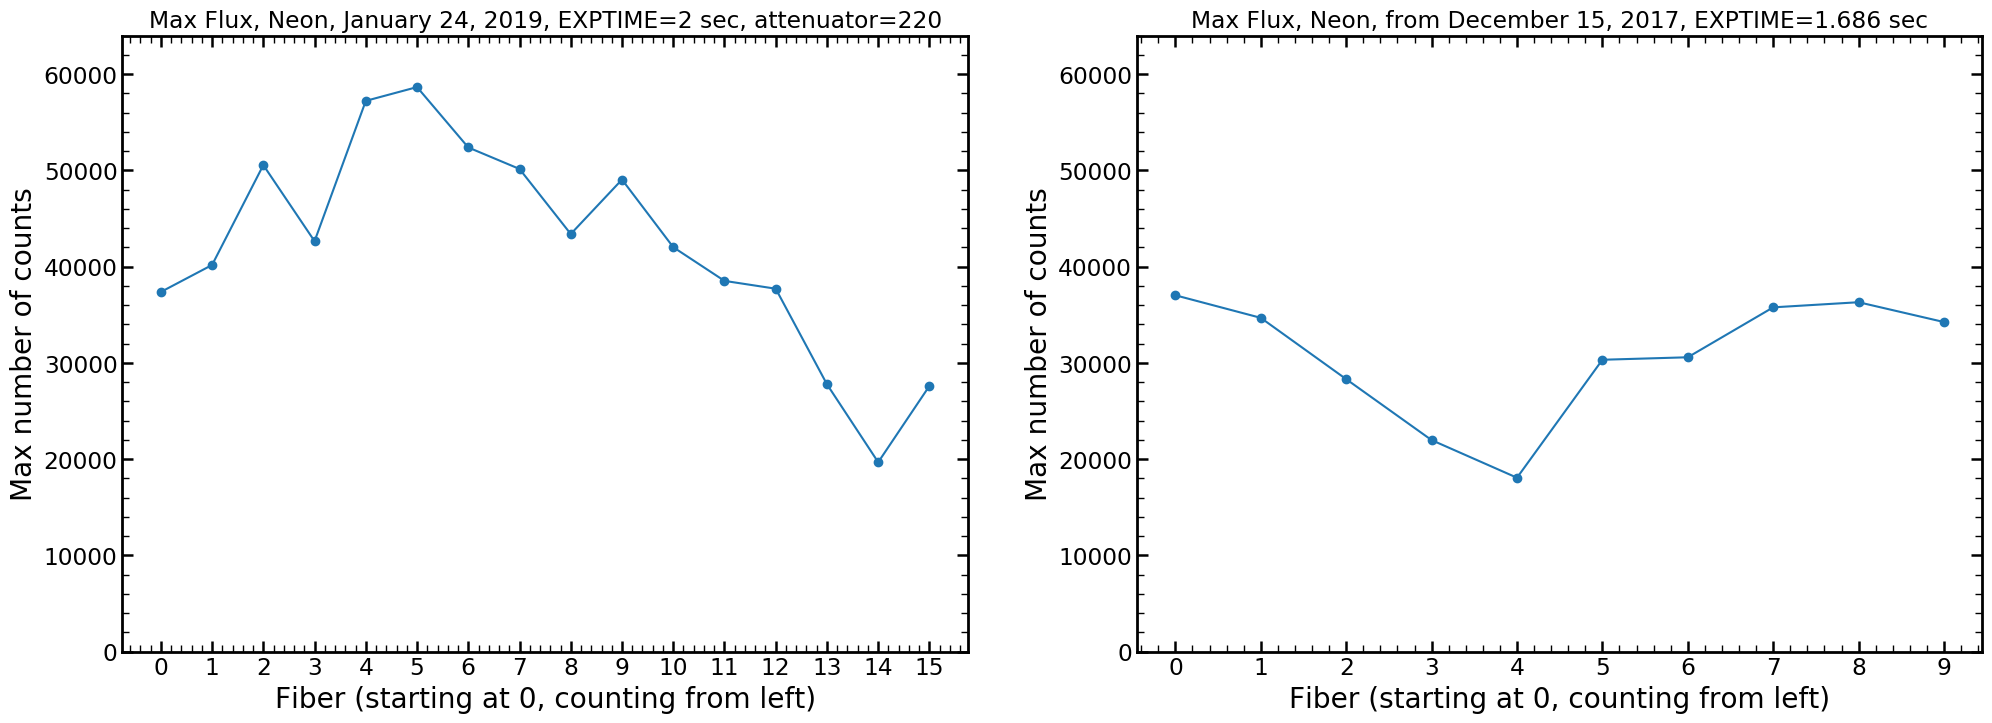

In [64]:
    
plt.figure(figsize=(24,8))
plt.subplot(121)

plt.plot(np.array(max_flux_in_fibers_in_new_data)*2,marker='o')
plt.xticks(range(16))
plt.ylim(0,64000)
plt.title('Max Flux, Neon, January 24, 2019, EXPTIME=2 sec, attenuator=220')
plt.xlabel('Fiber (starting at 0, counting from left)')
plt.ylabel('Max number of counts')

plt.subplot(122)
plt.plot(np.array(max_flux_in_fibers_in_old_data),marker='o')
plt.xticks(range(10))
plt.ylim(0,64000)
plt.title('Max Flux, Neon, from December 15, 2017, EXPTIME=1.686 sec')
plt.xlabel('Fiber (starting at 0, counting from left)')
plt.ylabel('Max number of counts')

In [65]:
res_Neon_exposures=np.copy(res_HgAr_exposures_round)
res_Neon_exposures[:,1]=np.round(res_Neon_exposures[:,1]/((7*1.5)/(3)),1)

In [66]:
res_Neon_exposures

array([[  4.5, 117.4],
       [  4. ,  93.1],
       [  3.5,  71.7],
       [  3. ,  53.4],
       [  2.5,  37.7],
       [  2. ,  24.9],
       [  1.5,  14.9],
       [  1. ,   7.7],
       [  0.5,   3.4],
       [  0. ,   2. ]])

## how much attenuator attenuates? - faintest line

In [141]:

new_data_Jan24_2019_11433=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143312.fits')[0].data
new_data_Jan24_2019_11434=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143412.fits')[0].data
new_data_Jan24_2019_11435=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143512.fits')[0].data
new_data_Jan24_2019_11436=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143612.fits')[0].data
new_data_Jan24_2019_11437=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143712.fits')[0].data
new_data_Jan24_2019_11438=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143812.fits')[0].data
new_data_Jan24_2019_11439=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143912.fits')[0].data
# W_AITATT =180
new_data_Jan24_2019_11444=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144412.fits')[0].data
# W_AITATT =180
new_data_Jan24_2019_11445=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144512.fits')[0].data
# W_AITATT =180
new_data_Jan24_2019_11446=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144612.fits')[0].data
# W_AITATT =185
new_data_Jan24_2019_11447=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144712.fits')[0].data
# W_AITATT =190
new_data_Jan24_2019_11448=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144812.fits')[0].data
# W_AITATT =195
new_data_Jan24_2019_11449=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144912.fits')[0].data
# W_AITATT =200
new_data_Jan24_2019_11450=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145012.fits')[0].data
# W_AITATT =205
new_data_Jan24_2019_11451=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145112.fits')[0].data
# W_AITATT =210
new_data_Jan24_2019_11452=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145212.fits')[0].data
# W_AITATT =215
new_data_Jan24_2019_11453=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145312.fits')[0].data
# W_AITATT =220
new_data_Jan24_2019_11454=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145412.fits')[0].data
# W_AITATT =225
new_data_Jan24_2019_11455=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145512.fits')[0].data
# W_AITATT =230
new_data_Jan24_2019_11456=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145612.fits')[0].data
# W_AITATT =235
new_data_Jan24_2019_11457=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145712.fits')[0].data
# W_AITATT =240
new_data_Jan24_2019_11458=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145812.fits')[0].data
# W_AITATT =245
new_data_Jan24_2019_11459=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145912.fits')[0].data
# W_AITATT =250
new_data_Jan24_2019_11460=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01146012.fits')[0].data
# W_AITATT =255
new_data_Jan24_2019_11461=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01146112.fits')[0].data

size=20


list_of_x_coordinates=[282,494,672,716,1333,1616,1705,2080,2305,2421,2633,2991,3183,3597,4131,4322]

# bright line
#list_of_y_coordinates=np.array([1223,1216,1206,1208,1200,1200,1197,1197,1194,1197,1199,1207,1204,1221,1237,1229])

# faint line
#list_of_y_coordinates=np.array([1223,1216,1206,1208,1200,1200,1197,1197,1194,1197,1199,1207,1204,1221,1237,1229])-740-74

# faintest line
list_of_y_coordinates=np.array([1223,1216,1206,1208,1200,1200,1197,1197,1194,1197,1199,1207,1204,1221,1237,1229])+1306

In [142]:
new_data_Jan24_2019_cut25s_11433=[]
new_data_Jan24_2019_cut25s_11434=[]
new_data_Jan24_2019_cut25s_11435=[]
new_data_Jan24_2019_cut25s_11436=[]
new_data_Jan24_2019_cut25s_11437=[]
new_data_Jan24_2019_cut25s_11438=[]
new_data_Jan24_2019_cut25s_11439=[]

new_data_Jan24_2019_cut25s_11444=[]
new_data_Jan24_2019_cut25s_11445=[]
new_data_Jan24_2019_cut25s_11446=[]
new_data_Jan24_2019_cut25s_11447=[]
new_data_Jan24_2019_cut25s_11448=[]
new_data_Jan24_2019_cut25s_11449=[]
new_data_Jan24_2019_cut25s_11450=[]
new_data_Jan24_2019_cut25s_11451=[]
new_data_Jan24_2019_cut25s_11452=[]
new_data_Jan24_2019_cut25s_11453=[]
new_data_Jan24_2019_cut25s_11454=[]
new_data_Jan24_2019_cut25s_11455=[]
new_data_Jan24_2019_cut25s_11456=[]
new_data_Jan24_2019_cut25s_11457=[]
new_data_Jan24_2019_cut25s_11458=[]
new_data_Jan24_2019_cut25s_11459=[]
new_data_Jan24_2019_cut25s_11460=[]
new_data_Jan24_2019_cut25s_11461=[]
new_data_Jan24_2019_cut25s_11457=[]

for i in range(16):
    new_data_Jan24_2019_cut25s_11433.append(new_data_Jan24_2019_11433[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11434.append(new_data_Jan24_2019_11434[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11435.append(new_data_Jan24_2019_11435[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11436.append(new_data_Jan24_2019_11436[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11437.append(new_data_Jan24_2019_11437[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11438.append(new_data_Jan24_2019_11438[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11439.append(new_data_Jan24_2019_11439[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
    
for i in range(16):
    new_data_Jan24_2019_cut25s_11444.append(new_data_Jan24_2019_11444[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11445.append(new_data_Jan24_2019_11445[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11446.append(new_data_Jan24_2019_11446[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11447.append(new_data_Jan24_2019_11447[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11448.append(new_data_Jan24_2019_11448[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11449.append(new_data_Jan24_2019_11449[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11450.append(new_data_Jan24_2019_11450[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])    
for i in range(16):
    new_data_Jan24_2019_cut25s_11451.append(new_data_Jan24_2019_11451[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11452.append(new_data_Jan24_2019_11452[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11453.append(new_data_Jan24_2019_11453[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11454.append(new_data_Jan24_2019_11454[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11455.append(new_data_Jan24_2019_11455[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11456.append(new_data_Jan24_2019_11456[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11457.append(new_data_Jan24_2019_11457[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])    
for i in range(16):
    new_data_Jan24_2019_cut25s_11458.append(new_data_Jan24_2019_11458[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11459.append(new_data_Jan24_2019_11459[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11460.append(new_data_Jan24_2019_11460[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11461.append(new_data_Jan24_2019_11461[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
             

In [143]:
max_flux_in_fibers_in_new_data_11433=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11433.append(np.max(new_data_Jan24_2019_cut25s_11433[i])-np.median(new_data_Jan24_2019_cut25s_11433[i][:,0]))
    
max_flux_in_fibers_in_new_data_11434=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11434.append(np.max(new_data_Jan24_2019_cut25s_11434[i])-np.median(new_data_Jan24_2019_cut25s_11434[i][:,0]))
    
max_flux_in_fibers_in_new_data_11435=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11435.append(np.max(new_data_Jan24_2019_cut25s_11435[i])-np.median(new_data_Jan24_2019_cut25s_11435[i][:,0]))
    
max_flux_in_fibers_in_new_data_11436=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11436.append(np.max(new_data_Jan24_2019_cut25s_11436[i])-np.median(new_data_Jan24_2019_cut25s_11436[i][:,0]))
    
max_flux_in_fibers_in_new_data_11437=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11437.append(np.max(new_data_Jan24_2019_cut25s_11437[i])-np.median(new_data_Jan24_2019_cut25s_11437[i][:,0]))
    
max_flux_in_fibers_in_new_data_11438=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11438.append(np.max(new_data_Jan24_2019_cut25s_11438[i])-np.median(new_data_Jan24_2019_cut25s_11438[i][:,0]))
    
max_flux_in_fibers_in_new_data_11439=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11439.append(np.max(new_data_Jan24_2019_cut25s_11439[i])-np.median(new_data_Jan24_2019_cut25s_11439[i][:,0]))
    
    
max_flux_in_fibers_in_new_data_11444=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11444.append(np.max(new_data_Jan24_2019_cut25s_11444[i])-np.median(new_data_Jan24_2019_cut25s_11444[i][:,0]))
    
max_flux_in_fibers_in_new_data_11445=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11445.append(np.max(new_data_Jan24_2019_cut25s_11445[i])-np.median(new_data_Jan24_2019_cut25s_11445[i][:,0]))
    
max_flux_in_fibers_in_new_data_11446=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11446.append(np.max(new_data_Jan24_2019_cut25s_11446[i])-np.median(new_data_Jan24_2019_cut25s_11446[i][:,0]))
    
max_flux_in_fibers_in_new_data_11447=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11447.append(np.max(new_data_Jan24_2019_cut25s_11447[i])-np.median(new_data_Jan24_2019_cut25s_11447[i][:,0]))
    
max_flux_in_fibers_in_new_data_11448=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11448.append(np.max(new_data_Jan24_2019_cut25s_11448[i])-np.median(new_data_Jan24_2019_cut25s_11448[i][:,0]))
    
max_flux_in_fibers_in_new_data_11449=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11449.append(np.max(new_data_Jan24_2019_cut25s_11449[i])-np.median(new_data_Jan24_2019_cut25s_11449[i][:,0]))
    
max_flux_in_fibers_in_new_data_11450=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11450.append(np.max(new_data_Jan24_2019_cut25s_11450[i])-np.median(new_data_Jan24_2019_cut25s_11450[i][:,0]))

max_flux_in_fibers_in_new_data_11451=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11451.append(np.max(new_data_Jan24_2019_cut25s_11451[i])-np.median(new_data_Jan24_2019_cut25s_11451[i][:,0]))
    
max_flux_in_fibers_in_new_data_11452=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11452.append(np.max(new_data_Jan24_2019_cut25s_11452[i])-np.median(new_data_Jan24_2019_cut25s_11452[i][:,0]))
    
max_flux_in_fibers_in_new_data_11453=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11453.append(np.max(new_data_Jan24_2019_cut25s_11453[i])-np.median(new_data_Jan24_2019_cut25s_11453[i][:,0]))
    
max_flux_in_fibers_in_new_data_11454=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11454.append(np.max(new_data_Jan24_2019_cut25s_11454[i])-np.median(new_data_Jan24_2019_cut25s_11454[i][:,0]))
    
max_flux_in_fibers_in_new_data_11455=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11455.append(np.max(new_data_Jan24_2019_cut25s_11455[i])-np.median(new_data_Jan24_2019_cut25s_11455[i][:,0]))
    
max_flux_in_fibers_in_new_data_11456=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11456.append(np.max(new_data_Jan24_2019_cut25s_11456[i])-np.median(new_data_Jan24_2019_cut25s_11456[i][:,0]))
    
max_flux_in_fibers_in_new_data_11457=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11457.append(np.max(new_data_Jan24_2019_cut25s_11457[i])-np.median(new_data_Jan24_2019_cut25s_11457[i][:,0]))
    
max_flux_in_fibers_in_new_data_11458=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11458.append(np.max(new_data_Jan24_2019_cut25s_11458[i])-np.median(new_data_Jan24_2019_cut25s_11458[i][:,0]))
    
max_flux_in_fibers_in_new_data_11459=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11459.append(np.max(new_data_Jan24_2019_cut25s_11459[i])-np.median(new_data_Jan24_2019_cut25s_11459[i][:,0]))
    
max_flux_in_fibers_in_new_data_11460=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11460.append(np.max(new_data_Jan24_2019_cut25s_11460[i])-np.median(new_data_Jan24_2019_cut25s_11460[i][:,0]))
    
max_flux_in_fibers_in_new_data_11461=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11461.append(np.max(new_data_Jan24_2019_cut25s_11461[i])-np.median(new_data_Jan24_2019_cut25s_11461[i][:,0]))


    

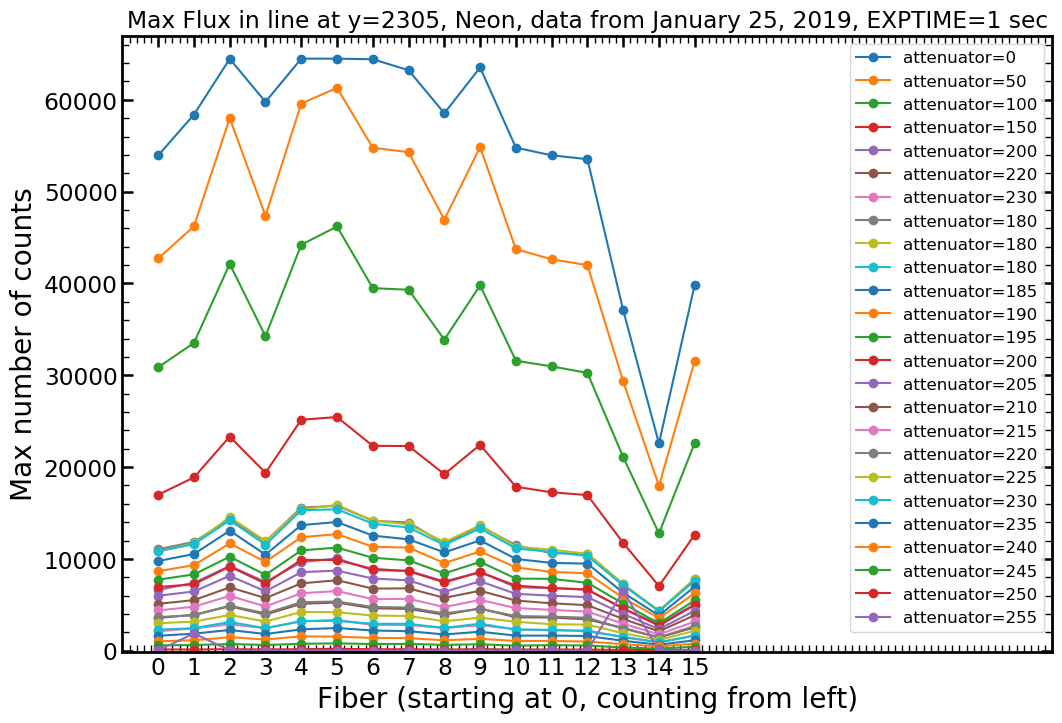

In [144]:
plt.figure(figsize=(12,8))
plt.plot(np.array(max_flux_in_fibers_in_new_data_11433),marker='o',label='attenuator=0')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11434),marker='o',label='attenuator=50')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11435),marker='o',label='attenuator=100')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11436),marker='o',label='attenuator=150')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11437),marker='o',label='attenuator=200')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11438),marker='o',label='attenuator=220')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11439),marker='o',label='attenuator=230')

plt.plot(np.array(max_flux_in_fibers_in_new_data_11444),marker='o',label='attenuator=180')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11445),marker='o',label='attenuator=180')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11446),marker='o',label='attenuator=180')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11447),marker='o',label='attenuator=185')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11448),marker='o',label='attenuator=190')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11449),marker='o',label='attenuator=195')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11450),marker='o',label='attenuator=200')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11451),marker='o',label='attenuator=205')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11452),marker='o',label='attenuator=210')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11453),marker='o',label='attenuator=215')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11454),marker='o',label='attenuator=220')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11455),marker='o',label='attenuator=225')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11456),marker='o',label='attenuator=230')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11457),marker='o',label='attenuator=235')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11458),marker='o',label='attenuator=240')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11459),marker='o',label='attenuator=245')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11460),marker='o',label='attenuator=250')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11461),marker='o',label='attenuator=255')

plt.xticks(range(16))
plt.xlim(-1,25)
plt.ylim(-100,67000)
plt.title('Max Flux in line at y=2305, Neon, data from January 25, 2019, EXPTIME=1 sec')
plt.xlabel('Fiber (starting at 0, counting from left)')
plt.ylabel('Max number of counts')
plt.legend(fontsize=12)

In [145]:
flux_with_att=np.transpose(np.array(np.split(np.concatenate((max_flux_in_fibers_in_new_data_11433,max_flux_in_fibers_in_new_data_11434,max_flux_in_fibers_in_new_data_11435,max_flux_in_fibers_in_new_data_11436,
                                                             max_flux_in_fibers_in_new_data_11437,np.array(max_flux_in_fibers_in_new_data_11438),np.array(max_flux_in_fibers_in_new_data_11439)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11444),np.array(max_flux_in_fibers_in_new_data_11445),np.array(max_flux_in_fibers_in_new_data_11446)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11447),np.array(max_flux_in_fibers_in_new_data_11448),np.array(max_flux_in_fibers_in_new_data_11449)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11450),np.array(max_flux_in_fibers_in_new_data_11451),np.array(max_flux_in_fibers_in_new_data_11452)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11453),np.array(max_flux_in_fibers_in_new_data_11454),np.array(max_flux_in_fibers_in_new_data_11455)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11456),np.array(max_flux_in_fibers_in_new_data_11457),np.array(max_flux_in_fibers_in_new_data_11458)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11459),np.array(max_flux_in_fibers_in_new_data_11460),np.array(max_flux_in_fibers_in_new_data_11461)),axis=0),25)))

In [146]:
att_values=[0,50,100,150,200,220,230,180,180,180,185,190,195,200,205,210,215,220,225,230,235,240,245,250,255]
positions_of_att_values_larger_than_200=np.where(np.array(att_values)>=200)[0]
att_values_larger_than_200=np.array(att_values)[positions_of_att_values_larger_than_200]

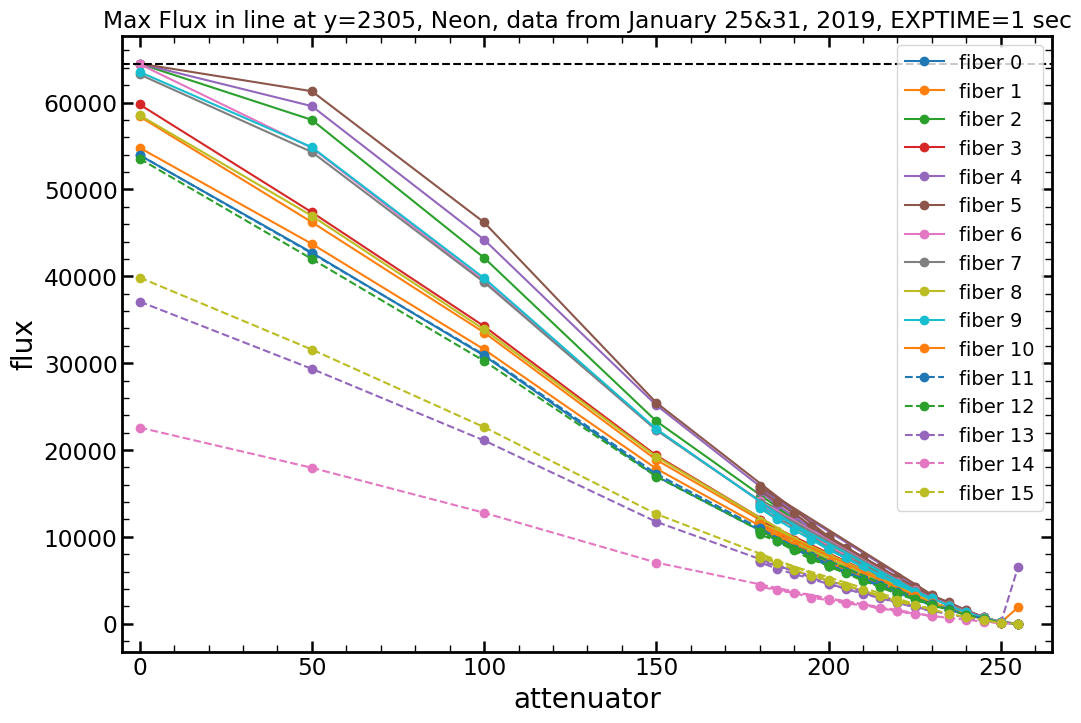

In [147]:
plt.figure(figsize=(12,8))
plt.title('Max Flux in line at y=2305, Neon, data from January 25&31, 2019, EXPTIME=1 sec')
plt.plot(att_values,flux_with_att[0],marker='o',label='fiber 0',color=plt.cm.tab10(0.0))
plt.plot(att_values,flux_with_att[1],marker='o',label='fiber 1',color=plt.cm.tab10(0.1))
plt.plot(att_values,flux_with_att[2],marker='o',label='fiber 2',color=plt.cm.tab10(0.2))
plt.plot(att_values,flux_with_att[3],marker='o',label='fiber 3',color=plt.cm.tab10(0.3))
plt.plot(att_values,flux_with_att[4],marker='o',label='fiber 4',color=plt.cm.tab10(0.4))
plt.plot(att_values,flux_with_att[5],marker='o',label='fiber 5',color=plt.cm.tab10(0.5))
plt.plot(att_values,flux_with_att[6],marker='o',label='fiber 6',color=plt.cm.tab10(0.6))
plt.plot(att_values,flux_with_att[7],marker='o',label='fiber 7',color=plt.cm.tab10(0.7))
plt.plot(att_values,flux_with_att[8],marker='o',label='fiber 8',color=plt.cm.tab10(0.8))
plt.plot(att_values,flux_with_att[9],marker='o',label='fiber 9',color=plt.cm.tab10(0.9))
plt.plot(att_values,flux_with_att[10],marker='o',label='fiber 10',color=plt.cm.tab10(1))
plt.plot(att_values,flux_with_att[11],marker='o',label='fiber 11',color=plt.cm.tab10(0.0),ls='--')
plt.plot(att_values,flux_with_att[12],marker='o',label='fiber 12',color=plt.cm.tab10(0.2),ls='--')
plt.plot(att_values,flux_with_att[13],marker='o',label='fiber 13',color=plt.cm.tab10(0.4),ls='--')
plt.plot(att_values,flux_with_att[14],marker='o',label='fiber 14',color=plt.cm.tab10(0.6),ls='--')
plt.plot(att_values,flux_with_att[15],marker='o',label='fiber 15',color=plt.cm.tab10(0.8),ls='--')
plt.axhline(y=64487, color='black', linestyle='--')
plt.xlabel('attenuator')
plt.ylabel('flux')
plt.xlim(-5,265)
plt.legend()


In [148]:
import scipy.optimize

def func(x, a, b, c,d):
    return a+b*(x/100)+c*(x/100)**2+d*(x/100)**3

popt14, pcov = scipy.optimize.curve_fit(func, att_values, flux_with_att[14]/np.max(flux_with_att[14]))
popt14_200, pcov = scipy.optimize.curve_fit(func, np.array(att_values)[positions_of_att_values_larger_than_200], flux_with_att[14][positions_of_att_values_larger_than_200]/np.max(flux_with_att[14][positions_of_att_values_larger_than_200]))


(-0.05, 1.05)

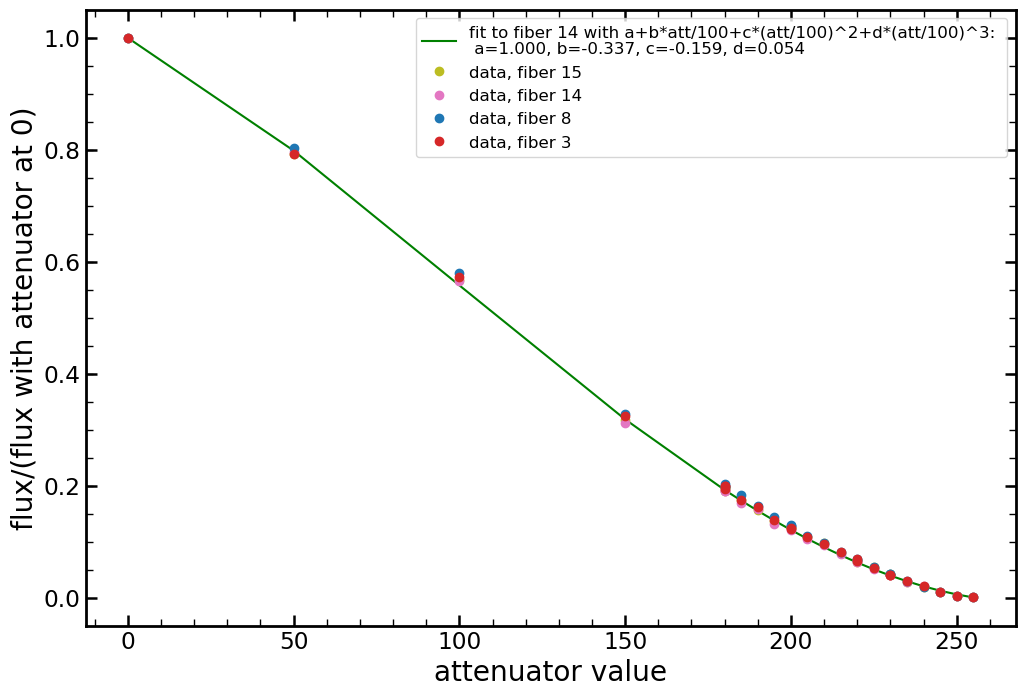

In [149]:
plt.figure(figsize=(12,8))
plt.plot(np.unique(np.array(att_values)), func(np.unique(np.array(att_values)), *popt14), 'g',
          label='fit to fiber 14 with a+b*att/100+c*(att/100)^2+d*(att/100)^3: \n a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt14))
plt.plot(att_values,flux_with_att[15]/np.max(flux_with_att[15]),marker='o',label='data, fiber 15',color=plt.cm.tab10(0.8),ls='')
plt.plot(att_values,flux_with_att[14]/np.max(flux_with_att[14]),marker='o',label='data, fiber 14',color=plt.cm.tab10(0.6),ls='')
plt.plot(att_values,flux_with_att[8]/np.max(flux_with_att[8]),marker='o',label='data, fiber 8',color=plt.cm.tab10(0.0),ls='')
plt.plot(att_values,flux_with_att[3]/np.max(flux_with_att[3]),marker='o',label='data, fiber 3',color=plt.cm.tab10(0.3),ls='')
plt.xlabel('attenuator value')
plt.ylabel('flux/(flux with attenuator at 0)')
plt.legend(fontsize=12)
plt.ylim(-0.05,1.05)

## how much attenuator attenuates? - bright line

In [6]:

new_data_Jan24_2019_11433=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143312.fits')[0].data
new_data_Jan24_2019_11434=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143412.fits')[0].data
new_data_Jan24_2019_11435=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143512.fits')[0].data
new_data_Jan24_2019_11436=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143612.fits')[0].data
new_data_Jan24_2019_11437=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143712.fits')[0].data
new_data_Jan24_2019_11438=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143812.fits')[0].data
new_data_Jan24_2019_11439=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-25/PFLA01143912.fits')[0].data
# W_AITATT =180
new_data_Jan24_2019_11444=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144412.fits')[0].data
# W_AITATT =180
new_data_Jan24_2019_11445=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144512.fits')[0].data
# W_AITATT =180
new_data_Jan24_2019_11446=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144612.fits')[0].data
# W_AITATT =185
new_data_Jan24_2019_11447=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144712.fits')[0].data
# W_AITATT =190
new_data_Jan24_2019_11448=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144812.fits')[0].data
# W_AITATT =195
new_data_Jan24_2019_11449=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01144912.fits')[0].data
# W_AITATT =200
new_data_Jan24_2019_11450=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145012.fits')[0].data
# W_AITATT =205
new_data_Jan24_2019_11451=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145112.fits')[0].data
# W_AITATT =210
new_data_Jan24_2019_11452=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145212.fits')[0].data
# W_AITATT =215
new_data_Jan24_2019_11453=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145312.fits')[0].data
# W_AITATT =220
new_data_Jan24_2019_11454=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145412.fits')[0].data
# W_AITATT =225
new_data_Jan24_2019_11455=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145512.fits')[0].data
# W_AITATT =230
new_data_Jan24_2019_11456=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145612.fits')[0].data
# W_AITATT =235
new_data_Jan24_2019_11457=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145712.fits')[0].data
# W_AITATT =240
new_data_Jan24_2019_11458=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145812.fits')[0].data
# W_AITATT =245
new_data_Jan24_2019_11459=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01145912.fits')[0].data
# W_AITATT =250
new_data_Jan24_2019_11460=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01146012.fits')[0].data
# W_AITATT =255
new_data_Jan24_2019_11461=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-01-31/PFLA01146112.fits')[0].data

size=20


list_of_x_coordinates=[282,494,672,716,1333,1616,1705,2080,2305,2421,2633,2991,3183,3597,4131,4322]

# bright line
list_of_y_coordinates=np.array([1223,1216,1206,1208,1200,1200,1197,1197,1194,1197,1199,1207,1204,1221,1237,1229])

# faint line
#list_of_y_coordinates=np.array([1223,1216,1206,1208,1200,1200,1197,1197,1194,1197,1199,1207,1204,1221,1237,1229])-740-74

# faintest line
#list_of_y_coordinates=np.array([1223,1216,1206,1208,1200,1200,1197,1197,1194,1197,1199,1207,1204,1221,1237,1229])+1306

In [151]:
new_data_Jan24_2019_cut25s_11433=[]
new_data_Jan24_2019_cut25s_11434=[]
new_data_Jan24_2019_cut25s_11435=[]
new_data_Jan24_2019_cut25s_11436=[]
new_data_Jan24_2019_cut25s_11437=[]
new_data_Jan24_2019_cut25s_11438=[]
new_data_Jan24_2019_cut25s_11439=[]

new_data_Jan24_2019_cut25s_11444=[]
new_data_Jan24_2019_cut25s_11445=[]
new_data_Jan24_2019_cut25s_11446=[]
new_data_Jan24_2019_cut25s_11447=[]
new_data_Jan24_2019_cut25s_11448=[]
new_data_Jan24_2019_cut25s_11449=[]
new_data_Jan24_2019_cut25s_11450=[]
new_data_Jan24_2019_cut25s_11451=[]
new_data_Jan24_2019_cut25s_11452=[]
new_data_Jan24_2019_cut25s_11453=[]
new_data_Jan24_2019_cut25s_11454=[]
new_data_Jan24_2019_cut25s_11455=[]
new_data_Jan24_2019_cut25s_11456=[]
new_data_Jan24_2019_cut25s_11457=[]
new_data_Jan24_2019_cut25s_11458=[]
new_data_Jan24_2019_cut25s_11459=[]
new_data_Jan24_2019_cut25s_11460=[]
new_data_Jan24_2019_cut25s_11461=[]
new_data_Jan24_2019_cut25s_11457=[]

for i in range(16):
    new_data_Jan24_2019_cut25s_11433.append(new_data_Jan24_2019_11433[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11434.append(new_data_Jan24_2019_11434[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11435.append(new_data_Jan24_2019_11435[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11436.append(new_data_Jan24_2019_11436[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11437.append(new_data_Jan24_2019_11437[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11438.append(new_data_Jan24_2019_11438[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11439.append(new_data_Jan24_2019_11439[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
    
for i in range(16):
    new_data_Jan24_2019_cut25s_11444.append(new_data_Jan24_2019_11444[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11445.append(new_data_Jan24_2019_11445[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11446.append(new_data_Jan24_2019_11446[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11447.append(new_data_Jan24_2019_11447[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11448.append(new_data_Jan24_2019_11448[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11449.append(new_data_Jan24_2019_11449[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11450.append(new_data_Jan24_2019_11450[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])    
for i in range(16):
    new_data_Jan24_2019_cut25s_11451.append(new_data_Jan24_2019_11451[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11452.append(new_data_Jan24_2019_11452[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11453.append(new_data_Jan24_2019_11453[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11454.append(new_data_Jan24_2019_11454[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11455.append(new_data_Jan24_2019_11455[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11456.append(new_data_Jan24_2019_11456[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11457.append(new_data_Jan24_2019_11457[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])    
for i in range(16):
    new_data_Jan24_2019_cut25s_11458.append(new_data_Jan24_2019_11458[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11459.append(new_data_Jan24_2019_11459[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11460.append(new_data_Jan24_2019_11460[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
for i in range(16):
    new_data_Jan24_2019_cut25s_11461.append(new_data_Jan24_2019_11461[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
             

In [152]:
max_flux_in_fibers_in_new_data_11433=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11433.append(np.max(new_data_Jan24_2019_cut25s_11433[i])-np.median(new_data_Jan24_2019_cut25s_11433[i][:,0]))
    
max_flux_in_fibers_in_new_data_11434=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11434.append(np.max(new_data_Jan24_2019_cut25s_11434[i])-np.median(new_data_Jan24_2019_cut25s_11434[i][:,0]))
    
max_flux_in_fibers_in_new_data_11435=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11435.append(np.max(new_data_Jan24_2019_cut25s_11435[i])-np.median(new_data_Jan24_2019_cut25s_11435[i][:,0]))
    
max_flux_in_fibers_in_new_data_11436=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11436.append(np.max(new_data_Jan24_2019_cut25s_11436[i])-np.median(new_data_Jan24_2019_cut25s_11436[i][:,0]))
    
max_flux_in_fibers_in_new_data_11437=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11437.append(np.max(new_data_Jan24_2019_cut25s_11437[i])-np.median(new_data_Jan24_2019_cut25s_11437[i][:,0]))
    
max_flux_in_fibers_in_new_data_11438=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11438.append(np.max(new_data_Jan24_2019_cut25s_11438[i])-np.median(new_data_Jan24_2019_cut25s_11438[i][:,0]))
    
max_flux_in_fibers_in_new_data_11439=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11439.append(np.max(new_data_Jan24_2019_cut25s_11439[i])-np.median(new_data_Jan24_2019_cut25s_11439[i][:,0]))
    
    
max_flux_in_fibers_in_new_data_11444=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11444.append(np.max(new_data_Jan24_2019_cut25s_11444[i])-np.median(new_data_Jan24_2019_cut25s_11444[i][:,0]))
    
max_flux_in_fibers_in_new_data_11445=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11445.append(np.max(new_data_Jan24_2019_cut25s_11445[i])-np.median(new_data_Jan24_2019_cut25s_11445[i][:,0]))
    
max_flux_in_fibers_in_new_data_11446=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11446.append(np.max(new_data_Jan24_2019_cut25s_11446[i])-np.median(new_data_Jan24_2019_cut25s_11446[i][:,0]))
    
max_flux_in_fibers_in_new_data_11447=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11447.append(np.max(new_data_Jan24_2019_cut25s_11447[i])-np.median(new_data_Jan24_2019_cut25s_11447[i][:,0]))
    
max_flux_in_fibers_in_new_data_11448=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11448.append(np.max(new_data_Jan24_2019_cut25s_11448[i])-np.median(new_data_Jan24_2019_cut25s_11448[i][:,0]))
    
max_flux_in_fibers_in_new_data_11449=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11449.append(np.max(new_data_Jan24_2019_cut25s_11449[i])-np.median(new_data_Jan24_2019_cut25s_11449[i][:,0]))
    
max_flux_in_fibers_in_new_data_11450=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11450.append(np.max(new_data_Jan24_2019_cut25s_11450[i])-np.median(new_data_Jan24_2019_cut25s_11450[i][:,0]))

max_flux_in_fibers_in_new_data_11451=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11451.append(np.max(new_data_Jan24_2019_cut25s_11451[i])-np.median(new_data_Jan24_2019_cut25s_11451[i][:,0]))
    
max_flux_in_fibers_in_new_data_11452=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11452.append(np.max(new_data_Jan24_2019_cut25s_11452[i])-np.median(new_data_Jan24_2019_cut25s_11452[i][:,0]))
    
max_flux_in_fibers_in_new_data_11453=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11453.append(np.max(new_data_Jan24_2019_cut25s_11453[i])-np.median(new_data_Jan24_2019_cut25s_11453[i][:,0]))
    
max_flux_in_fibers_in_new_data_11454=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11454.append(np.max(new_data_Jan24_2019_cut25s_11454[i])-np.median(new_data_Jan24_2019_cut25s_11454[i][:,0]))
    
max_flux_in_fibers_in_new_data_11455=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11455.append(np.max(new_data_Jan24_2019_cut25s_11455[i])-np.median(new_data_Jan24_2019_cut25s_11455[i][:,0]))
    
max_flux_in_fibers_in_new_data_11456=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11456.append(np.max(new_data_Jan24_2019_cut25s_11456[i])-np.median(new_data_Jan24_2019_cut25s_11456[i][:,0]))
    
max_flux_in_fibers_in_new_data_11457=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11457.append(np.max(new_data_Jan24_2019_cut25s_11457[i])-np.median(new_data_Jan24_2019_cut25s_11457[i][:,0]))
    
max_flux_in_fibers_in_new_data_11458=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11458.append(np.max(new_data_Jan24_2019_cut25s_11458[i])-np.median(new_data_Jan24_2019_cut25s_11458[i][:,0]))
    
max_flux_in_fibers_in_new_data_11459=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11459.append(np.max(new_data_Jan24_2019_cut25s_11459[i])-np.median(new_data_Jan24_2019_cut25s_11459[i][:,0]))
    
max_flux_in_fibers_in_new_data_11460=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11460.append(np.max(new_data_Jan24_2019_cut25s_11460[i])-np.median(new_data_Jan24_2019_cut25s_11460[i][:,0]))
    
max_flux_in_fibers_in_new_data_11461=[]
for i in range(16):
    max_flux_in_fibers_in_new_data_11461.append(np.max(new_data_Jan24_2019_cut25s_11461[i])-np.median(new_data_Jan24_2019_cut25s_11461[i][:,0]))


    

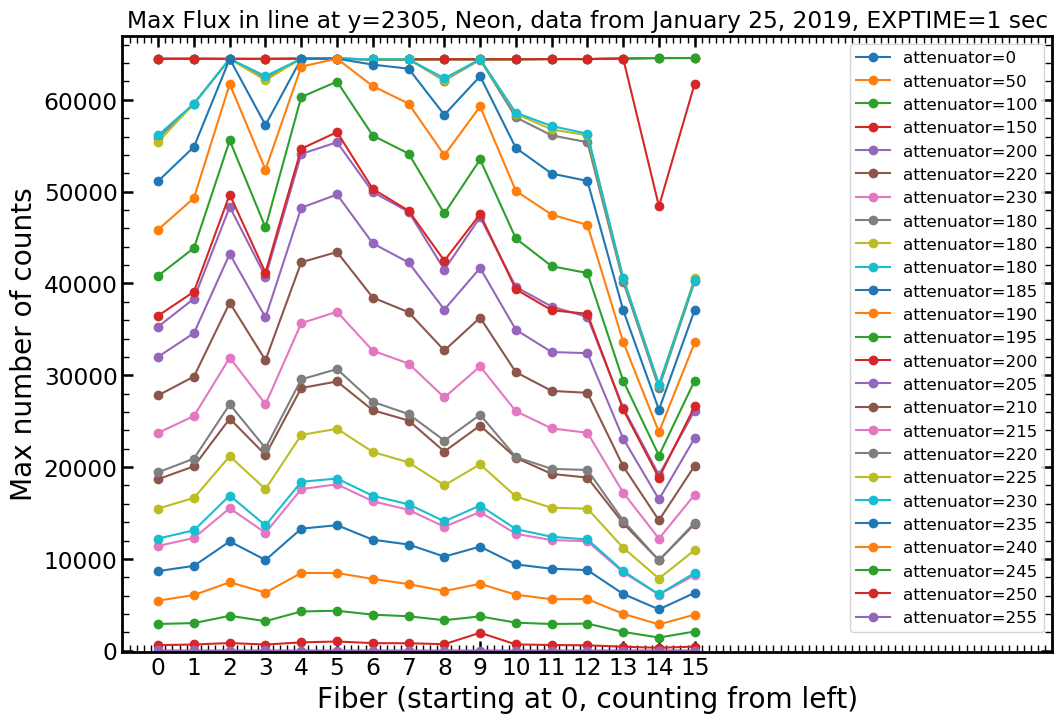

In [153]:
plt.figure(figsize=(12,8))
plt.plot(np.array(max_flux_in_fibers_in_new_data_11433),marker='o',label='attenuator=0')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11434),marker='o',label='attenuator=50')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11435),marker='o',label='attenuator=100')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11436),marker='o',label='attenuator=150')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11437),marker='o',label='attenuator=200')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11438),marker='o',label='attenuator=220')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11439),marker='o',label='attenuator=230')

plt.plot(np.array(max_flux_in_fibers_in_new_data_11444),marker='o',label='attenuator=180')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11445),marker='o',label='attenuator=180')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11446),marker='o',label='attenuator=180')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11447),marker='o',label='attenuator=185')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11448),marker='o',label='attenuator=190')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11449),marker='o',label='attenuator=195')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11450),marker='o',label='attenuator=200')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11451),marker='o',label='attenuator=205')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11452),marker='o',label='attenuator=210')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11453),marker='o',label='attenuator=215')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11454),marker='o',label='attenuator=220')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11455),marker='o',label='attenuator=225')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11456),marker='o',label='attenuator=230')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11457),marker='o',label='attenuator=235')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11458),marker='o',label='attenuator=240')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11459),marker='o',label='attenuator=245')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11460),marker='o',label='attenuator=250')
plt.plot(np.array(max_flux_in_fibers_in_new_data_11461),marker='o',label='attenuator=255')

plt.xticks(range(16))
plt.xlim(-1,25)
plt.ylim(-100,67000)
plt.title('Max Flux in line at y=2305, Neon, data from January 25, 2019, EXPTIME=1 sec')
plt.xlabel('Fiber (starting at 0, counting from left)')
plt.ylabel('Max number of counts')
plt.legend(fontsize=12)

In [154]:
flux_with_att=np.transpose(np.array(np.split(np.concatenate((max_flux_in_fibers_in_new_data_11433,max_flux_in_fibers_in_new_data_11434,max_flux_in_fibers_in_new_data_11435,max_flux_in_fibers_in_new_data_11436,
                                                             max_flux_in_fibers_in_new_data_11437,np.array(max_flux_in_fibers_in_new_data_11438),np.array(max_flux_in_fibers_in_new_data_11439)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11444),np.array(max_flux_in_fibers_in_new_data_11445),np.array(max_flux_in_fibers_in_new_data_11446)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11447),np.array(max_flux_in_fibers_in_new_data_11448),np.array(max_flux_in_fibers_in_new_data_11449)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11450),np.array(max_flux_in_fibers_in_new_data_11451),np.array(max_flux_in_fibers_in_new_data_11452)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11453),np.array(max_flux_in_fibers_in_new_data_11454),np.array(max_flux_in_fibers_in_new_data_11455)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11456),np.array(max_flux_in_fibers_in_new_data_11457),np.array(max_flux_in_fibers_in_new_data_11458)
                                                            ,np.array(max_flux_in_fibers_in_new_data_11459),np.array(max_flux_in_fibers_in_new_data_11460),np.array(max_flux_in_fibers_in_new_data_11461)),axis=0),25)))

In [155]:
att_values=[0,50,100,150,200,220,230,180,180,180,185,190,195,200,205,210,215,220,225,230,235,240,245,250,255]
positions_of_att_values_larger_than_200=np.where(np.array(att_values)>=200)[0]
att_values_larger_than_200=np.array(att_values)[positions_of_att_values_larger_than_200]

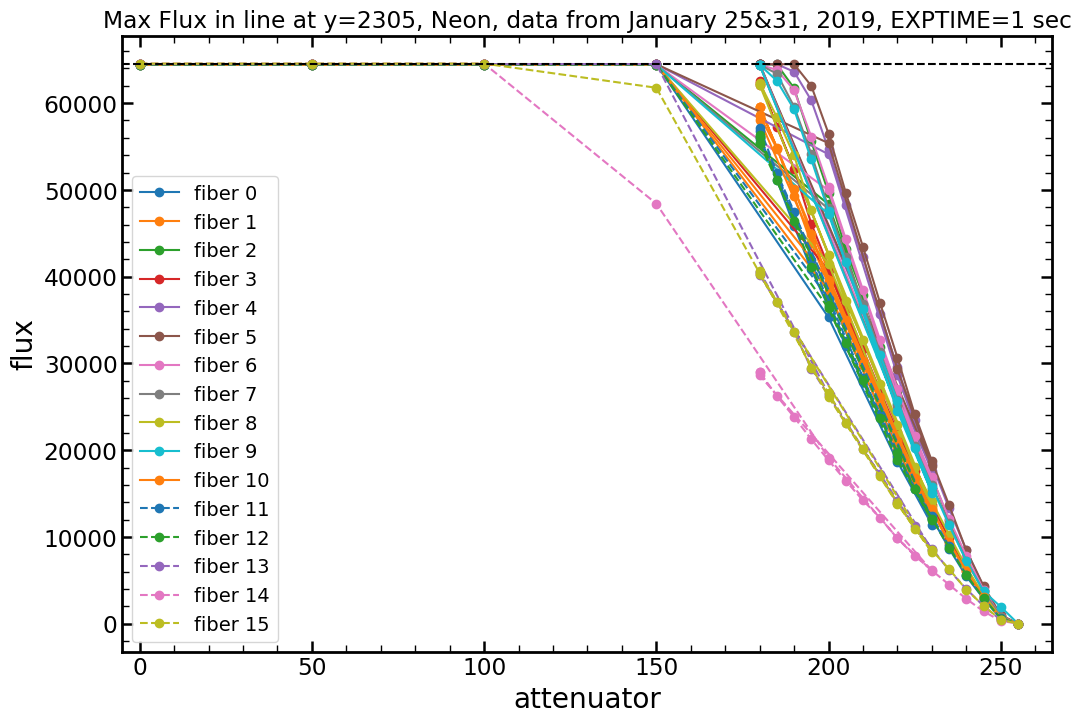

In [156]:
plt.figure(figsize=(12,8))
plt.title('Max Flux in line at y=2305, Neon, data from January 25&31, 2019, EXPTIME=1 sec')
plt.plot(att_values,flux_with_att[0],marker='o',label='fiber 0',color=plt.cm.tab10(0.0))
plt.plot(att_values,flux_with_att[1],marker='o',label='fiber 1',color=plt.cm.tab10(0.1))
plt.plot(att_values,flux_with_att[2],marker='o',label='fiber 2',color=plt.cm.tab10(0.2))
plt.plot(att_values,flux_with_att[3],marker='o',label='fiber 3',color=plt.cm.tab10(0.3))
plt.plot(att_values,flux_with_att[4],marker='o',label='fiber 4',color=plt.cm.tab10(0.4))
plt.plot(att_values,flux_with_att[5],marker='o',label='fiber 5',color=plt.cm.tab10(0.5))
plt.plot(att_values,flux_with_att[6],marker='o',label='fiber 6',color=plt.cm.tab10(0.6))
plt.plot(att_values,flux_with_att[7],marker='o',label='fiber 7',color=plt.cm.tab10(0.7))
plt.plot(att_values,flux_with_att[8],marker='o',label='fiber 8',color=plt.cm.tab10(0.8))
plt.plot(att_values,flux_with_att[9],marker='o',label='fiber 9',color=plt.cm.tab10(0.9))
plt.plot(att_values,flux_with_att[10],marker='o',label='fiber 10',color=plt.cm.tab10(1))
plt.plot(att_values,flux_with_att[11],marker='o',label='fiber 11',color=plt.cm.tab10(0.0),ls='--')
plt.plot(att_values,flux_with_att[12],marker='o',label='fiber 12',color=plt.cm.tab10(0.2),ls='--')
plt.plot(att_values,flux_with_att[13],marker='o',label='fiber 13',color=plt.cm.tab10(0.4),ls='--')
plt.plot(att_values,flux_with_att[14],marker='o',label='fiber 14',color=plt.cm.tab10(0.6),ls='--')
plt.plot(att_values,flux_with_att[15],marker='o',label='fiber 15',color=plt.cm.tab10(0.8),ls='--')
plt.axhline(y=64487, color='black', linestyle='--')
plt.xlabel('attenuator')
plt.ylabel('flux')
plt.xlim(-5,265)
plt.legend()


In [157]:
import scipy.optimize

def func(x, a, b, c,d):
    return a+b*(x/100)+c*(x/100)**2+d*(x/100)**3

#popt14, pcov = scipy.optimize.curve_fit(func, att_values, flux_with_att[14]/np.max(flux_with_att[14]))
popt14_200, pcov = scipy.optimize.curve_fit(func, np.array(att_values)[positions_of_att_values_larger_than_200], func(np.unique(np.array([200])), *popt14)[0]*flux_with_att[14][positions_of_att_values_larger_than_200]/np.max(flux_with_att[14][positions_of_att_values_larger_than_200]))


(195, 255)

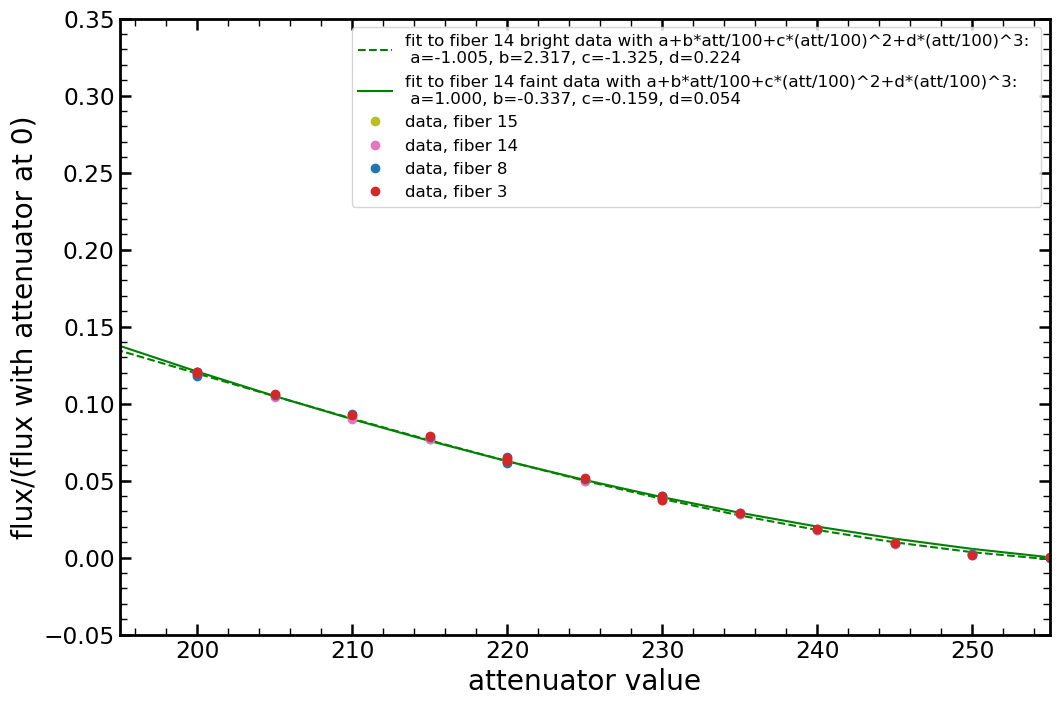

In [158]:
plt.figure(figsize=(12,8))
#plt.plot(np.unique(np.array(att_values)), func(np.unique(np.array(att_values)), *popt14), 'g',
#          label='fit to fiber 14 with a+b*att/100+c*(att/100)^2+d*(att/100)^3: \n a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt14))

plt.plot(np.unique(np.array(att_values)), func(np.unique(np.array(att_values)), *popt14_200), 'g--',
          label='fit to fiber 14 bright data with a+b*att/100+c*(att/100)^2+d*(att/100)^3: \n a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt14_200))
plt.plot(np.unique(np.array(att_values)), func(np.unique(np.array(att_values)), *popt14), 'g',
          label='fit to fiber 14 faint data with a+b*att/100+c*(att/100)^2+d*(att/100)^3: \n a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt14))

plt.plot(att_values_larger_than_200,func(np.unique(np.array([200])), *popt14)[0]*flux_with_att[15][positions_of_att_values_larger_than_200]/np.max(flux_with_att[15][positions_of_att_values_larger_than_200]),marker='o',label='data, fiber 15',color=plt.cm.tab10(0.8),ls='')
plt.plot(att_values_larger_than_200,func(np.unique(np.array([200])), *popt14)[0]*flux_with_att[14][positions_of_att_values_larger_than_200]/np.max(flux_with_att[14][positions_of_att_values_larger_than_200]),marker='o',label='data, fiber 14',color=plt.cm.tab10(0.6),ls='')
plt.plot(att_values_larger_than_200,func(np.unique(np.array([200])), *popt14)[0]*flux_with_att[8][positions_of_att_values_larger_than_200]/np.max(flux_with_att[8][positions_of_att_values_larger_than_200]),marker='o',label='data, fiber 8',color=plt.cm.tab10(0.0),ls='')
plt.plot(att_values_larger_than_200,func(np.unique(np.array([200])), *popt14)[0]*flux_with_att[3][positions_of_att_values_larger_than_200]/np.max(flux_with_att[3][positions_of_att_values_larger_than_200]),marker='o',label='data, fiber 3',color=plt.cm.tab10(0.3),ls='')
plt.xlabel('attenuator value')
plt.ylabel('flux/(flux with attenuator at 0)')
plt.legend(fontsize=12)
plt.ylim(-0.05,0.35)
plt.xlim(195,255)

## Estimating Neon numbers 

In [67]:
# these are HgAr exposure times from December
res_HgAr_exposures_round

array([[  4.5, 411. ],
       [  4. , 326. ],
       [  3.5, 251. ],
       [  3. , 187. ],
       [  2.5, 132. ],
       [  2. ,  87. ],
       [  1.5,  52. ],
       [  1. ,  27. ],
       [  0.5,  12. ],
       [  0. ,   7. ]])

In [68]:
# we know that these need to be somehwat shorter - at 4.5 mm defocus the time should be 297 sec 

In [69]:
res_Neon_exposures=np.copy(res_HgAr_exposures_round)
res_Neon_exposures[:,1]=np.round((297/411)*res_Neon_exposures[:,1]/((7*1.5)/(3)),1)

In [208]:
res_HgAr_exposures_round

array([[  4.5, 411. ],
       [  4. , 326. ],
       [  3.5, 251. ],
       [  3. , 187. ],
       [  2.5, 132. ],
       [  2. ,  87. ],
       [  1.5,  52. ],
       [  1. ,  27. ],
       [  0.5,  12. ],
       [  0. ,   7. ]])

In [70]:
res_Neon_exposures

array([[ 4.5, 84.9],
       [ 4. , 67.3],
       [ 3.5, 51.8],
       [ 3. , 38.6],
       [ 2.5, 27.3],
       [ 2. , 18. ],
       [ 1.5, 10.7],
       [ 1. ,  5.6],
       [ 0.5,  2.5],
       [ 0. ,  1.4]])

In [214]:
print(func(240, *popt14)/func(210, *popt14))

0.224202120562293


In [219]:
print(func(235, *popt14)/func(190, *popt14))

0.18802525217097696


In [222]:
print(func(215, *popt14)/func(135, *popt14))

0.19553943106121183


In [227]:
print(func(190, *popt14)/func(65, *popt14))

0.21285650753324856


In [232]:
print(func(160, *popt14)*(15/18))

0.2284611122194559


In [234]:
print(func(140, *popt14)*(15/27))

0.20227777737407612


In [236]:
print(func(100, *popt14)*(15/39))

0.21445486238169661


In [238]:
print(func(65, *popt14)*(15/51))

0.21419840364027398


In [242]:
print(func(0, *popt14)*(15/67))

0.223786184529146


In [243]:
85/5

17.0

In [159]:
# search for att values that raise the times to 15 sec - focus
print(1.4/15)
print(func(210, *popt14))

print(" ")
# search for att values that raise the times to 15 sec - 0.5
print(2.5/15)
print(func(190, *popt14))

print(" ")
# search for att values that raise the times to 15 sec - 1
print(5.6/15)
print(func(135, *popt14))

print(" ")
# search for att values that raise the times to 15 sec - 1
print(10.7/15)
print(func(65, *popt14))

0.09333333333333332
0.08989819582795189
 
0.16666666666666666
0.1550179820014237
 
0.3733333333333333
0.3875307350621895
 
0.7133333333333333
0.7282745723769315


## Xe

### Initial analysis with the old data 

In [76]:
res_Xe_exposures_round=np.copy(res_HgAr_exposures_round)
res_Xe_exposures_round[:,1]=(297/411)*res_Xe_exposures_round[:,1]
# this is after applying February empirical correction
res_Xe_exposures

array([[  4.5       , 297.        ],
       [  4.        , 235.57664234],
       [  3.5       , 181.37956204],
       [  3.        , 135.13138686],
       [  2.5       ,  95.38686131],
       [  2.        ,  62.86861314],
       [  1.5       ,  37.57664234],
       [  1.        ,  19.51094891],
       [  0.5       ,   8.67153285],
       [  0.        ,   5.05839416]])

In [161]:
res_HgAr_exposures_round


array([[  4.5, 411. ],
       [  4. , 326. ],
       [  3.5, 251. ],
       [  3. , 187. ],
       [  2.5, 132. ],
       [  2. ,  87. ],
       [  1.5,  52. ],
       [  1. ,  27. ],
       [  0.5,  12. ],
       [  0. ,   7. ]])

In [ ]:
# now we want to compare flux bettween HgAr and Xe

Text(0,0.5,'Max number of counts')

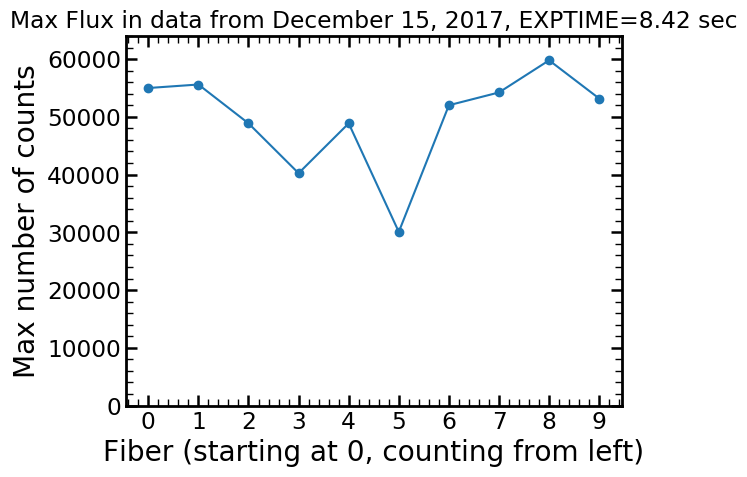

In [116]:
plt.plot(max_flux_in_fibers_in_old_data_HgAr,marker='o')
plt.xticks(range(10))
plt.ylim(0,64000)
plt.title('Max Flux in data from December 15, 2017, EXPTIME=8.42 sec')
plt.xlabel('Fiber (starting at 0, counting from left)')
plt.ylabel('Max number of counts')

In [186]:
old_data_Dec15_2017_Xe=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2017-12-20/PFLA00894712.fits')[0].data

(np.max(old_data_Dec15_2017_Xe[2581-70:2581+300,3950-30:3950+30])-np.median(old_data_Dec15_2017_Xe[2581-70:2581+300,3950-30:3950+30]))*(1/func(np.unique(np.array([210])), *popt14)[0])*4.7

57509.49674111815

In [194]:
func(np.unique(np.array([80])), *popt14)

array([0.65593368])

In [192]:
func(np.unique(np.array([165])), *popt14)

array([0.50832346])

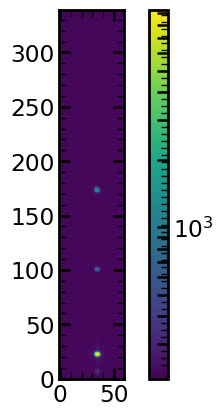

In [179]:
plt.imshow(old_data_Dec15_2017_Xe[2581-170:2581+170,3950-30:3950+30]-1000,origin='lower',norm=LogNorm())
plt.colorbar()

In [180]:
func(np.unique(np.array([210])), *popt14)

array([0.0898982])

In [182]:
# new fluxes need 297/411 less time
# so old HgAr would need 5 second without attenuator

# Xenon filled that in 1 second with att at 210
1/(func(np.unique(np.array([210])), *popt14)[0]/5)
# so xenon it 1.2 times brighter

55.61846880185507

In [181]:
func(210, *popt14)

0.08989819582795189

In [174]:
func(250, *popt14)

0.005653818029557556

### Second analysis with the new data 

## Krypton

### Initial analysis with the old data 

In [206]:
(np.max(old_data_Dec15_2017_Kr[2327-70:2327+300,3950-30:3950+30])-np.median(old_data_Dec15_2017_Kr[2327-70:2327+300,3950-30:3950+30]))*(1/func(np.unique(np.array([190])), *popt14)[0])*15/60000

29.424005790232187

In [207]:
297/30

9.9

In [203]:
old_data_Dec15_2017_Kr=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2017-12-21/PFLA00904312.fits')[0].data

(np.max(old_data_Dec15_2017_Kr[2327-70:2327+300,3950-30:3950+30])-np.median(old_data_Dec15_2017_Kr[2327-70:2327+300,3950-30:3950+30]))*(1/func(np.unique(np.array([190])), *popt14)[0])*(411/297)*15*func(np.unique(np.array([240])), *popt14)

array([49241.25488996])

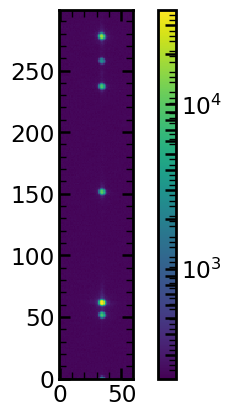

In [256]:
plt.imshow(old_data_Dec15_2017_Kr[2327-150:2327+150,3950-30:3950+30]-1000,origin='lower',norm=LogNorm())
plt.colorbar()

### Second analysis with the new data 

In [244]:
new_data_Jan24_2019=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-02-18/PFLA01247812.fits')[0].data

In [246]:
(np.max(old_data_Dec15_2017_Xe[2581-70:2581+300,3950-30:3950+30])-np.median(old_data_Dec15_2017_Xe[2581-70:2581+300,3950-30:3950+30]))*(1/func(np.unique(np.array([210])), *popt14)[0])*4.7

57509.49674111815

In [251]:
(np.max(new_data_Jan24_2019[2296-70:2296+70,2092-30:2092+30])-np.median(new_data_Jan24_2019[2296-70:2296+300,2092-30:2092+30]))

9496.0

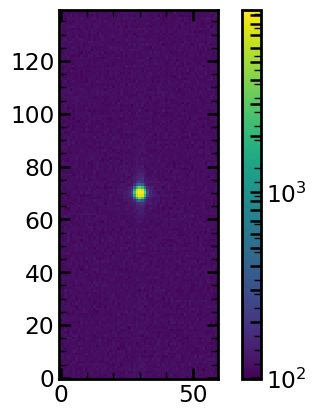

In [253]:
plt.imshow(new_data_Jan24_2019[2296-70:2296+70,2092-30:2092+30]-1000,origin='lower',norm=LogNorm())
plt.colorbar()

In [ ]:
# we do the same as with Neon

### Second analysis with the new data 

## Rerunning numbers so that exposure times for HgAr are not below 15 sec

In [540]:
# exposures modified without 
res_HgAr_exposures_modified

array([[ -4.5       , 200.61332429],
       [ -4.        , 159.62103003],
       [ -3.5       , 123.40328399],
       [ -3.        ,  91.96008617],
       [ -2.5       ,  65.29143656],
       [ -2.        ,  43.39733517],
       [ -1.5       ,  26.27778199],
       [ -1.        ,  13.93277703],
       [ -0.5       ,   6.36232028],
       [  0.        ,   3.56641176],
       [  0.5       ,   5.54505144],
       [  1.        ,  12.29823935],
       [  1.5       ,  23.82597546],
       [  2.        ,  40.1282598 ],
       [  2.5       ,  61.20509235],
       [  3.        ,  87.05647312],
       [  3.5       , 117.6824021 ],
       [  4.        , 153.0828793 ],
       [  4.5       , 193.25790471]])

In [547]:
func(np.array([175,130]), *popt)

array([0.23800477, 0.42288695])

In [548]:
[3.54/15,6.36/15]

[0.23600000000000002, 0.42400000000000004]

In [551]:
res=[]
for i in range(10):
    res.append([(np.abs(res_HgAr_exposures_modified[:,0][0+i])+res_HgAr_exposures_modified[:,0][-1-i])/2,np.floor((res_HgAr_exposures_modified[:,1][0+i]+res_HgAr_exposures_modified[:,1][-1-i])/2)])
    
res_HgAr_exposures_modified_round=np.array(res)
res_HgAr_exposures_modified_round

array([[  4.5, 196. ],
       [  4. , 156. ],
       [  3.5, 120. ],
       [  3. ,  89. ],
       [  2.5,  63. ],
       [  2. ,  41. ],
       [  1.5,  25. ],
       [  1. ,  13. ],
       [  0.5,   5. ],
       [  0. ,   3. ]])

# April 12 analysis of new f-ratio 

In [53]:
def func_att(x, a, b, c,d):
    return a+b*(x/100)+c*(x/100)**2+d*(x/100)**3

a=1
b=-0.337
c=-0.159
d=0.054

In [65]:
print(fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-04-09/PFLA01576412.fits')[0].header['EXPTIME'])
print(fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-04-10/PFLA01581212.fits')[0].header['EXPTIME'])
print(fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-02-02/PFLA01174812.fits')[0].header['EXPTIME'])

15.0
14.999
14.998


In [66]:
print(fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-04-09/PFLA01576412.fits')[0].header['W_AITATT'])
print(fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-04-10/PFLA01581212.fits')[0].header['W_AITATT'])
print(fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-02-02/PFLA01174812.fits')[0].header['W_AITATT'])

220
220
165


In [6]:
new_data_No_f=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-04-09/PFLA01576412.fits')[0].data
new_data_f_28=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-04-10/PFLA01581212.fits')[0].data
new_data_f_large=fits.open('/Users/nevencaplar/Documents/PFS/LAM/raw/2019-02-02/PFLA01174812.fits')[0].data

from165_to_220=func_att(220,1,-0.337,-0.159,0.054)/func_att(165,1,-0.337,-0.159,0.054)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/nevencaplar/Documents/PFS/LAM/raw/2019-04-09/PFLA01576412.fits'

In [122]:
test_spot_No_f_fiber1=new_data_No_f[1670-20:1670+20,736-20:736+20]
test_spot_f_28_fiber1=new_data_f_28[1670-20:1670+20,736-20:736+20]
test_spot_f_large_fiber1=new_data_f_large[1655-20:1655+20,715-20:715+20]

test_spot_No_f_fiber2=new_data_No_f[1665-20:1665+20,1314-20:1314+20]
test_spot_f_28_fiber2=new_data_f_28[1665-20:1665+20,1314-20:1314+20]
test_spot_f_large_fiber2=new_data_f_large[1645-20:1645+20,1337-20:1337+20]

test_spot_No_f_fiber3=new_data_No_f[1665-20:1665+20,1718-20:1718+20]
test_spot_f_28_fiber3=new_data_f_28[1665-20:1665+20,1718-20:1718+20]
test_spot_f_large_fiber3=new_data_f_large[1652-20:1652+20,1718-20:1718+20]


test_spot_No_f_fiber4=new_data_No_f[1657-20:1657+20,2099-20:2099+20]
test_spot_f_28_fiber4=new_data_f_28[1657-20:1657+20,2099-20:2099+20]
test_spot_f_large_fiber4=new_data_f_large[1645-20:1645+20,2080-20:2080+20]

test_spot_No_f_fiber5=new_data_No_f[1657-20:1657+20,2608-20:2608+20]
test_spot_f_28_fiber5=new_data_f_28[1657-20:1657+20,2608-20:2608+20]
test_spot_f_large_fiber5=new_data_f_large[1647-20:1647+20,2628-20:2628+20]

test_spot_No_f_fiber6=new_data_No_f[1659-20:1659+20,3012-20:3012+20]
test_spot_f_28_fiber6=new_data_f_28[1659-20:1659+20,3012-20:3012+20]
test_spot_f_large_fiber6=new_data_f_large[1649-20:1649+20,2992-20:2992+20]

test_spot_No_f_fiber7=new_data_No_f[1682-20:1682+20,4345-20:4345+20]
test_spot_f_28_fiber7=new_data_f_28[1682-20:1682+20,4345-20:4345+20]
test_spot_f_large_fiber7=new_data_f_large[1672-20:1672+20,4325-20:4325+20]

24112 8495 6181.622643257514


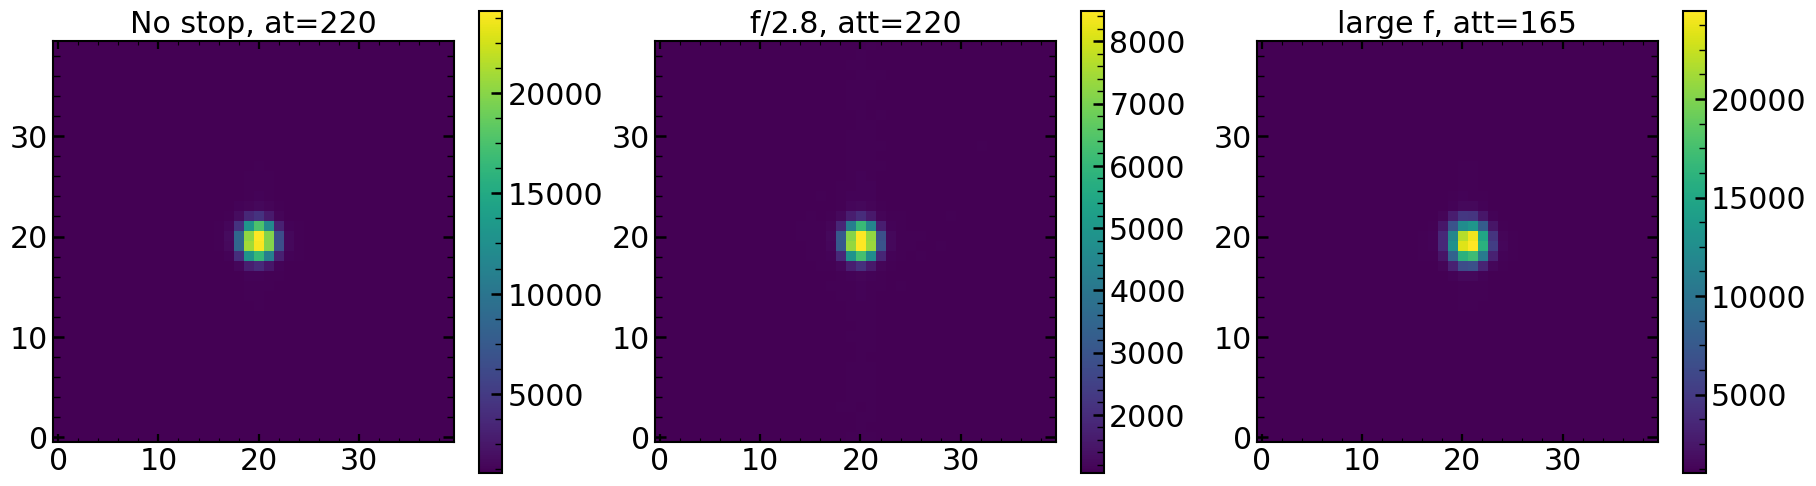

In [123]:

plt.figure(figsize=(22,6))

plt.subplot(131)
plt.imshow(test_spot_No_f_fiber1)
plt.colorbar()
plt.title('No stop, at=220')

plt.subplot(132)
plt.imshow(test_spot_f_28_fiber1)
plt.colorbar()
plt.title('f/2.8, att=220')


plt.subplot(133)
plt.imshow(test_spot_f_large_fiber1)
plt.colorbar()
plt.title('large f, att=165')

print(np.max(test_spot_No_f_fiber1),np.max(test_spot_f_28_fiber1),np.max(test_spot_f_large_fiber1)*from165_to_220)

25603 8976 8550.567262211593


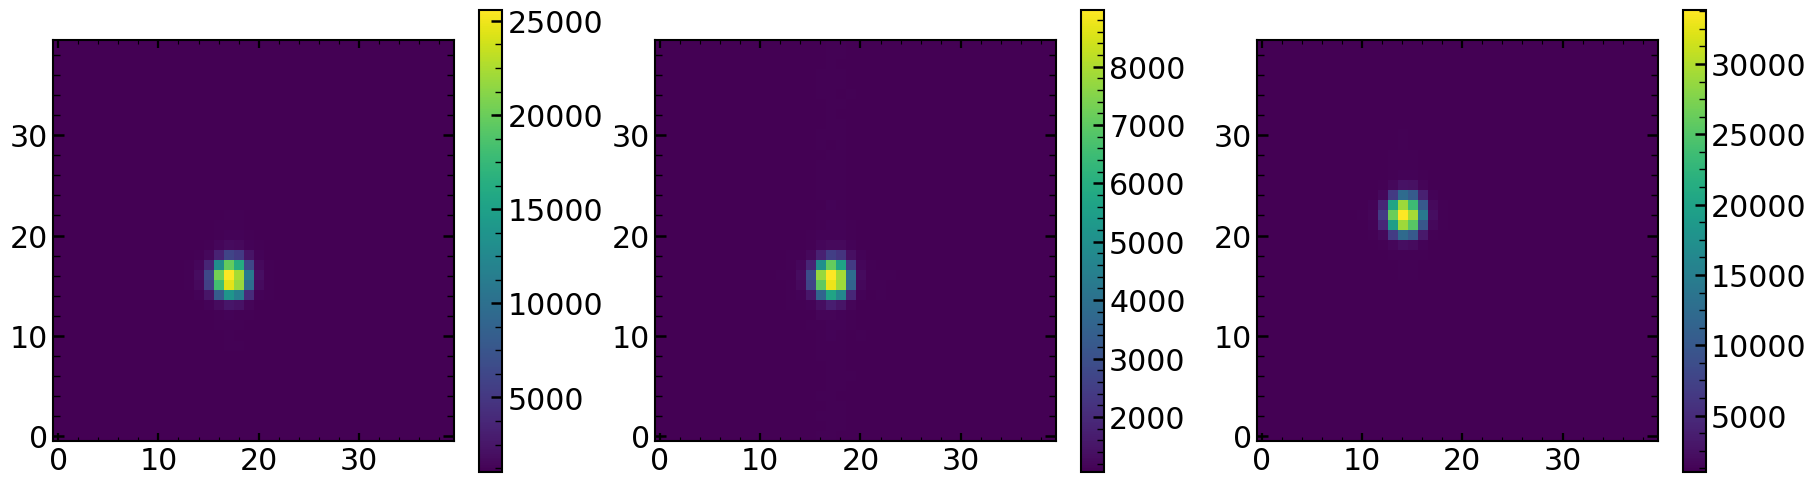

In [73]:

plt.figure(figsize=(22,6))

plt.subplot(131)
plt.imshow(test_spot_No_f_fiber2)
plt.colorbar()

plt.subplot(132)
plt.imshow(test_spot_f_28_fiber2)
plt.colorbar()

plt.subplot(133)
plt.imshow(test_spot_f_large_fiber2)
plt.colorbar()

print(np.max(test_spot_No_f_fiber2),np.max(test_spot_f_28_fiber2),np.max(test_spot_f_large_fiber2)*from165_to_220)

21567 7688 5987.4923777017075


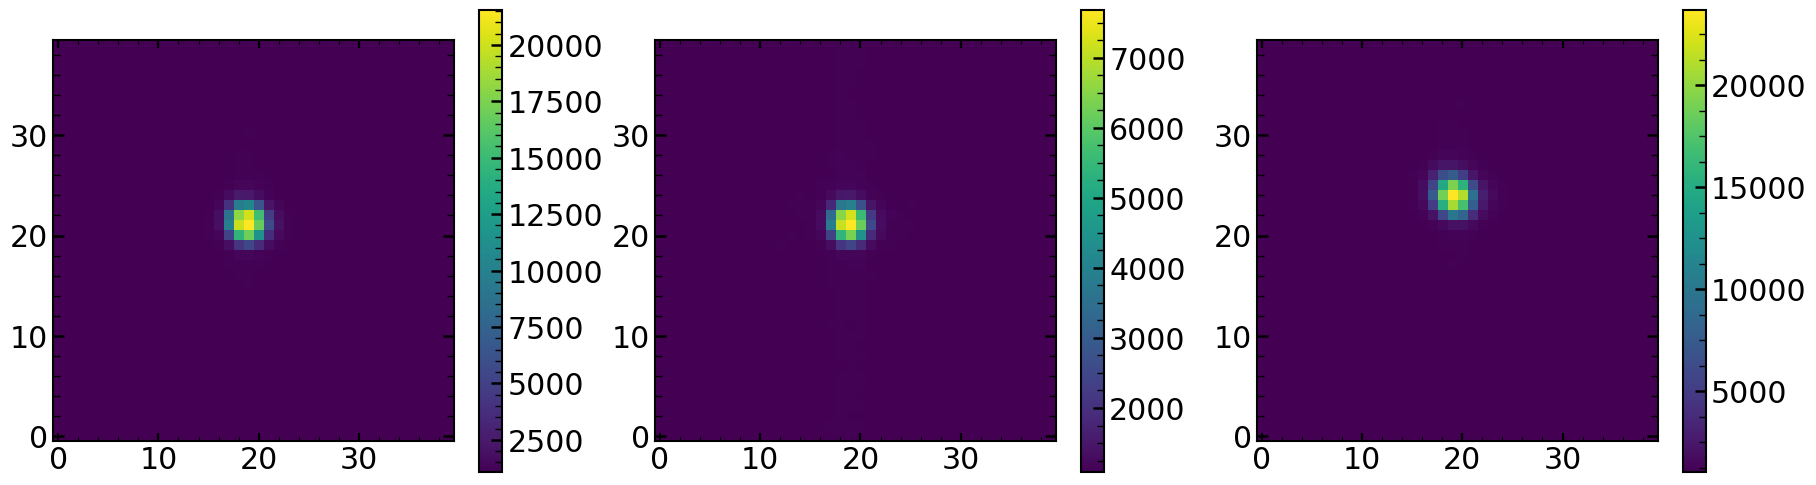

In [58]:

plt.figure(figsize=(22,6))

plt.subplot(131)
plt.imshow(test_spot_No_f_fiber3)
plt.colorbar()

plt.subplot(132)
plt.imshow(test_spot_f_28_fiber3)
plt.colorbar()

plt.subplot(133)
plt.imshow(test_spot_f_large_fiber3)
plt.colorbar()

print(np.max(test_spot_No_f_fiber3),np.max(test_spot_f_28_fiber3),np.max(test_spot_f_large_fiber3)*from165_to_220)

25044 8821 7306.013023992964


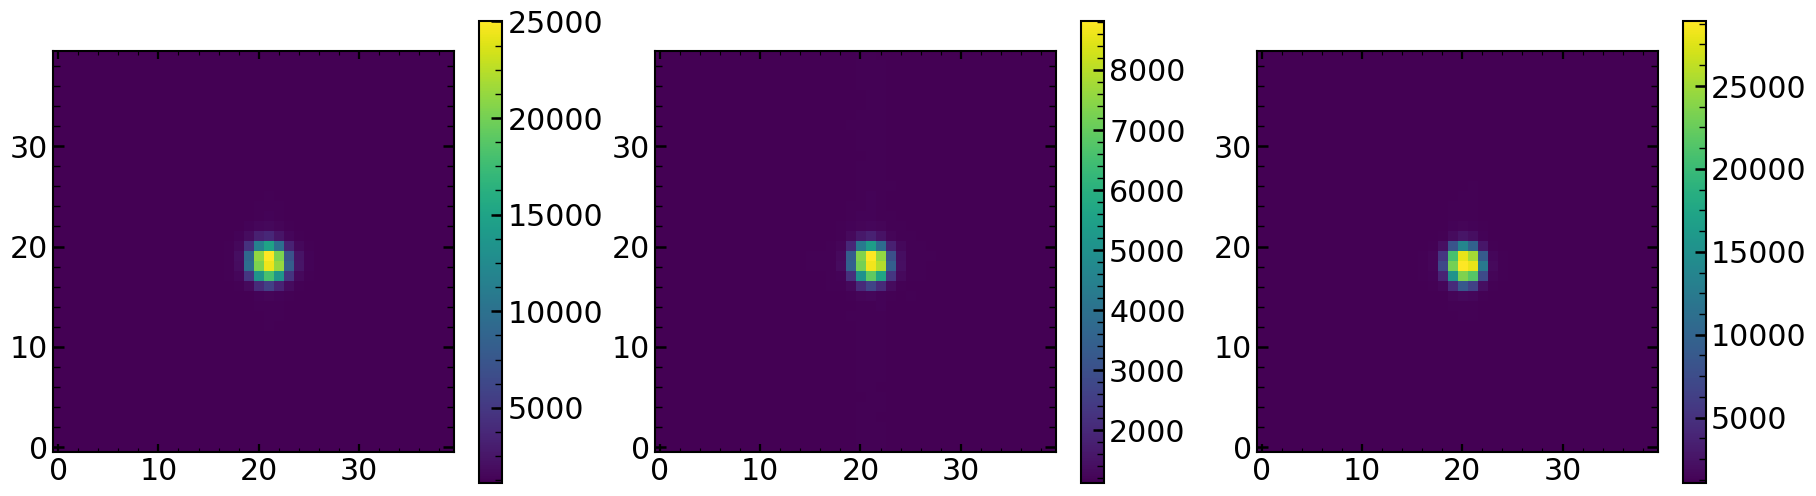

In [74]:


plt.figure(figsize=(22,6))

plt.subplot(131)
plt.imshow(test_spot_No_f_fiber4)
plt.colorbar()

plt.subplot(132)
plt.imshow(test_spot_f_28_fiber4)
plt.colorbar()

plt.subplot(133)
plt.imshow(test_spot_f_large_fiber4)
plt.colorbar()

print(np.max(test_spot_No_f_fiber4),np.max(test_spot_f_28_fiber4),np.max(test_spot_f_large_fiber4)*from165_to_220)

18780 7000 6333.59458066271


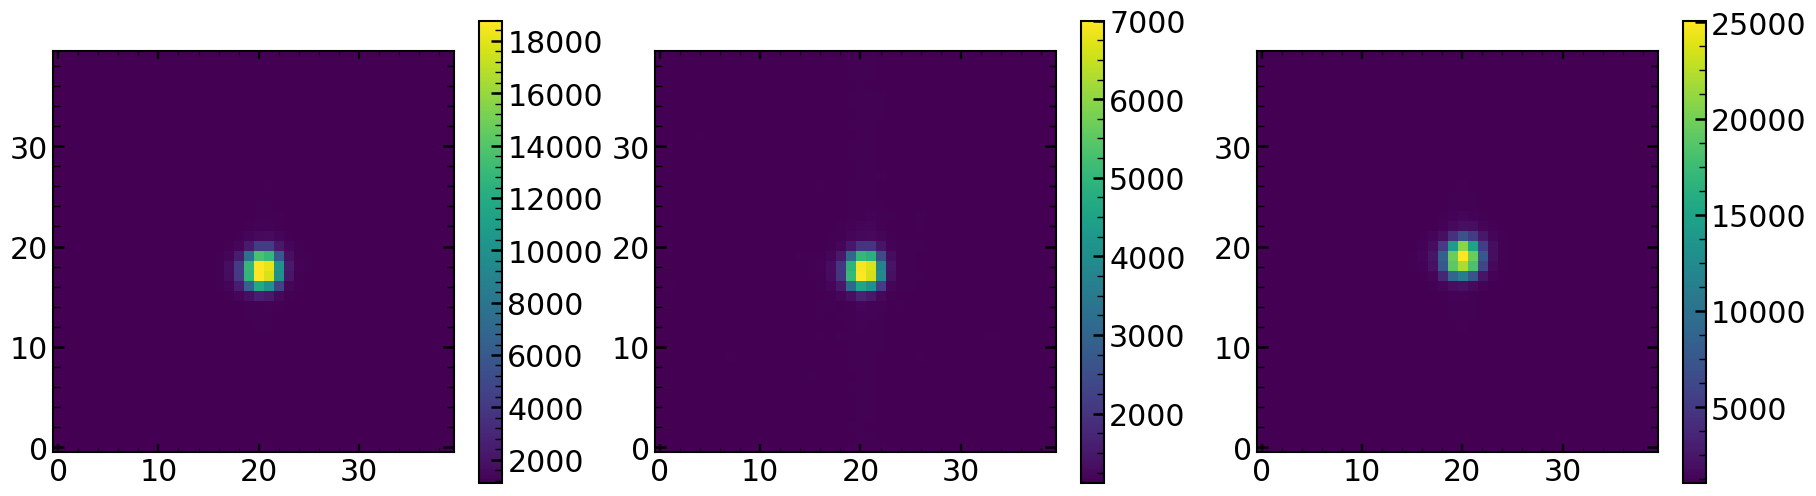

In [75]:

plt.figure(figsize=(22,6))

plt.subplot(131)
plt.imshow(test_spot_No_f_fiber5)
plt.colorbar()

plt.subplot(132)
plt.imshow(test_spot_f_28_fiber5)
plt.colorbar()

plt.subplot(133)
plt.imshow(test_spot_f_large_fiber5)
plt.colorbar()

print(np.max(test_spot_No_f_fiber5),np.max(test_spot_f_28_fiber5),np.max(test_spot_f_large_fiber5)*from165_to_220)

21567 7688 5987.4923777017075


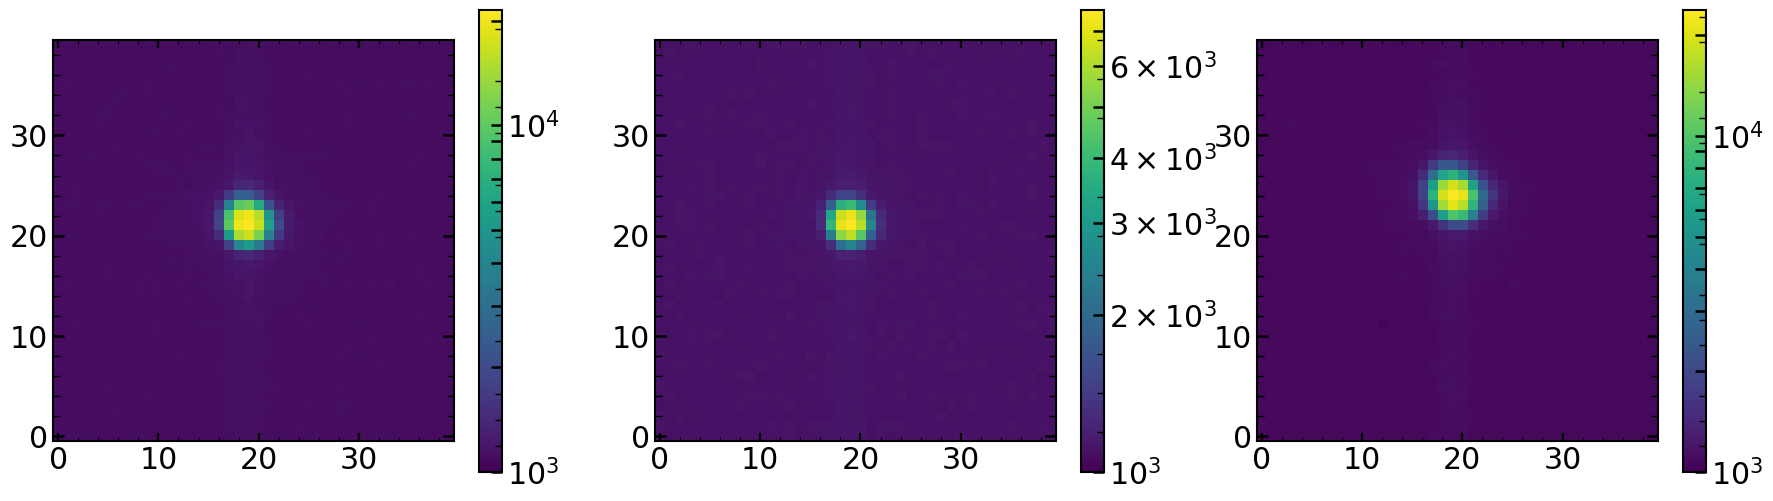

In [79]:

plt.figure(figsize=(22,6))

plt.subplot(131)
plt.imshow(test_spot_No_f_fiber6,vmin=1000,norm=LogNorm())
plt.colorbar()

plt.subplot(132)
plt.imshow(test_spot_f_28_fiber6,vmin=1000,norm=LogNorm())
plt.colorbar()

plt.subplot(133)
plt.imshow(test_spot_f_large_fiber6,vmin=1000,norm=LogNorm())
plt.colorbar()

print(np.max(test_spot_No_f_fiber6),np.max(test_spot_f_28_fiber6),np.max(test_spot_f_large_fiber6)*from165_to_220)

16779 6172 4122.933026082481


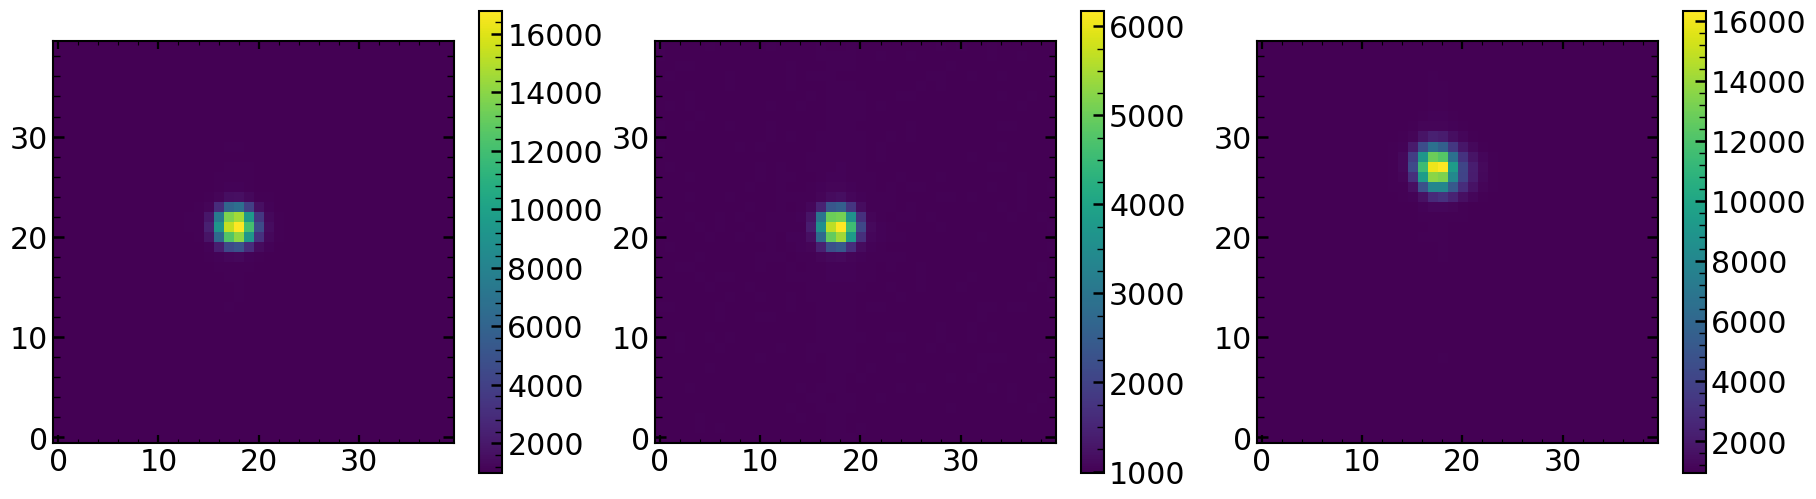

In [77]:

plt.figure(figsize=(22,6))

plt.subplot(131)
plt.imshow(test_spot_No_f_fiber7)
plt.colorbar()

plt.subplot(132)
plt.imshow(test_spot_f_28_fiber7)
plt.colorbar()

plt.subplot(133)
plt.imshow(test_spot_f_large_fiber7)
plt.colorbar()

print(np.max(test_spot_No_f_fiber7),np.max(test_spot_f_28_fiber7),np.max(test_spot_f_large_fiber7)*from165_to_220)

In [99]:
ratio1=[(np.max(test_spot_No_f_fiber1)-np.median(test_spot_No_f_fiber1[:,0]))/((np.max(test_spot_f_large_fiber1)-np.median(test_spot_f_large_fiber1[:,0]))*from165_to_220),
        (np.max(test_spot_f_28_fiber1)-np.median(test_spot_f_28_fiber1[:,0]))/((np.max(test_spot_f_large_fiber1)-np.median(test_spot_f_large_fiber1[:,0]))*from165_to_220)]
ratio2=[(np.max(test_spot_No_f_fiber2)-np.median(test_spot_No_f_fiber2[:,0]))/((np.max(test_spot_f_large_fiber2)-np.median(test_spot_f_large_fiber2[:,0]))*from165_to_220),
        (np.max(test_spot_f_28_fiber2)-np.median(test_spot_f_28_fiber2[:,0]))/((np.max(test_spot_f_large_fiber2)-np.median(test_spot_f_large_fiber2[:,0]))*from165_to_220)]
ratio3=[(np.max(test_spot_No_f_fiber3)-np.median(test_spot_No_f_fiber3[:,0]))/((np.max(test_spot_f_large_fiber3)-np.median(test_spot_f_large_fiber3[:,0]))*from165_to_220),
        (np.max(test_spot_f_28_fiber3)-np.median(test_spot_f_28_fiber3[:,0]))/((np.max(test_spot_f_large_fiber3)-np.median(test_spot_f_large_fiber3[:,0]))*from165_to_220)]
ratio4=[(np.max(test_spot_No_f_fiber4)-np.median(test_spot_No_f_fiber4[:,0]))/((np.max(test_spot_f_large_fiber4)-np.median(test_spot_f_large_fiber4[:,0]))*from165_to_220),
        (np.max(test_spot_f_28_fiber4)-np.median(test_spot_f_28_fiber4[:,0]))/((np.max(test_spot_f_large_fiber4)-np.median(test_spot_f_large_fiber4[:,0]))*from165_to_220)]
ratio5=[(np.max(test_spot_No_f_fiber5)-np.median(test_spot_No_f_fiber5[:,0]))/((np.max(test_spot_f_large_fiber5)-np.median(test_spot_f_large_fiber5[:,0]))*from165_to_220),
        (np.max(test_spot_f_28_fiber5)-np.median(test_spot_f_28_fiber5[:,0]))/((np.max(test_spot_f_large_fiber5)-np.median(test_spot_f_large_fiber5[:,0]))*from165_to_220)]
ratio6=[(np.max(test_spot_No_f_fiber6)-np.median(test_spot_No_f_fiber6[:,0]))/((np.max(test_spot_f_large_fiber6)-np.median(test_spot_f_large_fiber6[:,0]))*from165_to_220),
        (np.max(test_spot_f_28_fiber6)-np.median(test_spot_f_28_fiber6[:,0]))/((np.max(test_spot_f_large_fiber6)-np.median(test_spot_f_large_fiber6[:,0]))*from165_to_220)]
ratio7=[(np.max(test_spot_No_f_fiber7)-np.median(test_spot_No_f_fiber7[:,0]))/((np.max(test_spot_f_large_fiber7)-np.median(test_spot_f_large_fiber7[:,0]))*from165_to_220),
        (np.max(test_spot_f_28_fiber7)-np.median(test_spot_f_28_fiber7[:,0]))/((np.max(test_spot_f_large_fiber7)-np.median(test_spot_f_large_fiber7[:,0]))*from165_to_220)]

In [100]:
print(ratio1,ratio2,ratio3,ratio4,ratio5,ratio6,ratio7)

[3.8925198723627346, 1.252329641161555] [2.958574867520187, 0.952967963629124] [2.340802390657824, 0.9621774608420337] [3.4007311909988482, 1.0927312862309755] [2.9133281740315624, 0.9685771634655129] [3.579391714861293, 1.151634181459955] [4.067740300852, 1.3338692049475707]


In [101]:
np.median(np.array((ratio1,ratio2,ratio3,ratio4,ratio5,ratio6,ratio7))[:,0])

3.4007311909988482

In [102]:
np.median(np.array((ratio1,ratio2,ratio3,ratio4,ratio5,ratio6,ratio7))[:,1])

1.0927312862309755

In [103]:
np.median(np.array((ratio1,ratio2,ratio3,ratio4,ratio5,ratio6,ratio7))[:,0])/np.median(np.array((ratio1,ratio2,ratio3,ratio4,ratio5,ratio6,ratio7))[:,1])

3.112138577754623

In [ ]:
-np.median(old_data_Dec15_2017_cut25s[i][:,0])

# June 6, checking F ratio with 2.5

In [15]:
print(fits.open('/Volumes/My Passport for Mac/Old_Files/PFS/LAM/raw/2019-04-09/PFLA01576412.fits')[0].header['EXPTIME'])
print(fits.open('/Volumes/My Passport for Mac/Old_Files/PFS/LAM/raw/2019-04-10/PFLA01581212.fits')[0].header['EXPTIME'])
print(fits.open('/Volumes/My Passport for Mac/Old_Files/PFS/LAM/raw/2019-05-06/PFLA01707112.fits')[0].header['EXPTIME'])

print(fits.open('/Volumes/My Passport for Mac/Old_Files/PFS/LAM/raw/2019-04-09/PFLA01576412.fits')[0].header['W_ENFCAX'])
print(fits.open('/Volumes/My Passport for Mac/Old_Files/PFS/LAM/raw/2019-04-10/PFLA01581212.fits')[0].header['W_ENFCAX'])
print(fits.open('/Volumes/My Passport for Mac/Old_Files/PFS/LAM/raw/2019-05-06/PFLA01707112.fits')[0].header['W_ENFCAX'])

print(fits.open('/Volumes/My Passport for Mac/Old_Files/PFS/LAM/raw/2019-04-09/PFLA01576412.fits')[0].header['W_AITATT'])
print(fits.open('/Volumes/My Passport for Mac/Old_Files/PFS/LAM/raw/2019-04-10/PFLA01581212.fits')[0].header['W_AITATT'])
print(fits.open('/Volumes/My Passport for Mac/Old_Files/PFS/LAM/raw/2019-05-06/PFLA01707112.fits')[0].header['W_AITATT'])



15.0
14.999
14.998
-0.0
-0.0
-3e-05
220
220
190


In [44]:
new_data_No_f=fits.open('/Volumes/My Passport for Mac/Old_Files/PFS/LAM/raw/2019-04-09/PFLA01576412.fits')[0].data
new_data_f_28=fits.open('/Volumes/My Passport for Mac/Old_Files/PFS/LAM/raw/2019-04-10/PFLA01581212.fits')[0].data
new_official_data_f_28=fits.open('/Volumes/My Passport for Mac/Old_Files/PFS/LAM/raw/2019-05-06/PFLA01707112.fits')[0].data 



new_data_f_28=fits.open('/Users/nevencaplar/Downloads/PFLA01899212.fits')[0].data

In [45]:
test_spot_No_f_fiber1=new_data_No_f[1670-20:1670+20,736-20:736+20]
test_spot_f_28_fiber1=new_data_f_28[1670-20:1670+20,736-20:736+20]
test_spot_f_large_fiber1=new_official_data_f_28[1670-20:1670+20,736-20:736+20]

test_spot_No_f_fiber2=new_data_No_f[1665-20:1665+20,1314-20:1314+20]
test_spot_f_28_fiber2=new_data_f_28[1665-20:1665+20,1314-20:1314+20]
test_spot_f_large_fiber2=new_official_data_f_28[1665-20:1665+20,1314-20:1314+20]

test_spot_No_f_fiber3=new_data_No_f[1665-20:1665+20,1718-20:1718+20]
test_spot_f_28_fiber3=new_data_f_28[1665-20:1665+20,1718-20:1718+20]
test_spot_f_large_fiber3=new_official_data_f_28[1665-20:1665+20,1718-20:1718+20]


test_spot_No_f_fiber4=new_data_No_f[1657-20:1657+20,2099-20:2099+20]
test_spot_f_28_fiber4=new_data_f_28[1657-20:1657+20,2099-20:2099+20]
test_spot_f_large_fiber4=new_official_data_f_28[1657-20:1657+20,2099-20:2099+20]

test_spot_No_f_fiber5=new_data_No_f[1657-20:1657+20,2608-20:2608+20]
test_spot_f_28_fiber5=new_data_f_28[1657-20:1657+20,2608-20:2608+20]
test_spot_f_large_fiber5=new_official_data_f_28[1657-20:1657+20,2608-20:2608+20]

test_spot_No_f_fiber6=new_data_No_f[1659-20:1659+20,3012-20:3012+20]
test_spot_f_28_fiber6=new_data_f_28[1659-20:1659+20,3012-20:3012+20]
test_spot_f_large_fiber6=new_official_data_f_28[1659-20:1659+20,3012-20:3012+20]

test_spot_No_f_fiber7=new_data_No_f[1682-20:1682+20,4345-20:4345+20]
test_spot_f_28_fiber7=new_data_f_28[1682-20:1682+20,4345-20:4345+20]
test_spot_f_large_fiber7=new_official_data_f_28[1682-20:1682+20,4345-20:4345+20]

24112 41573 37451


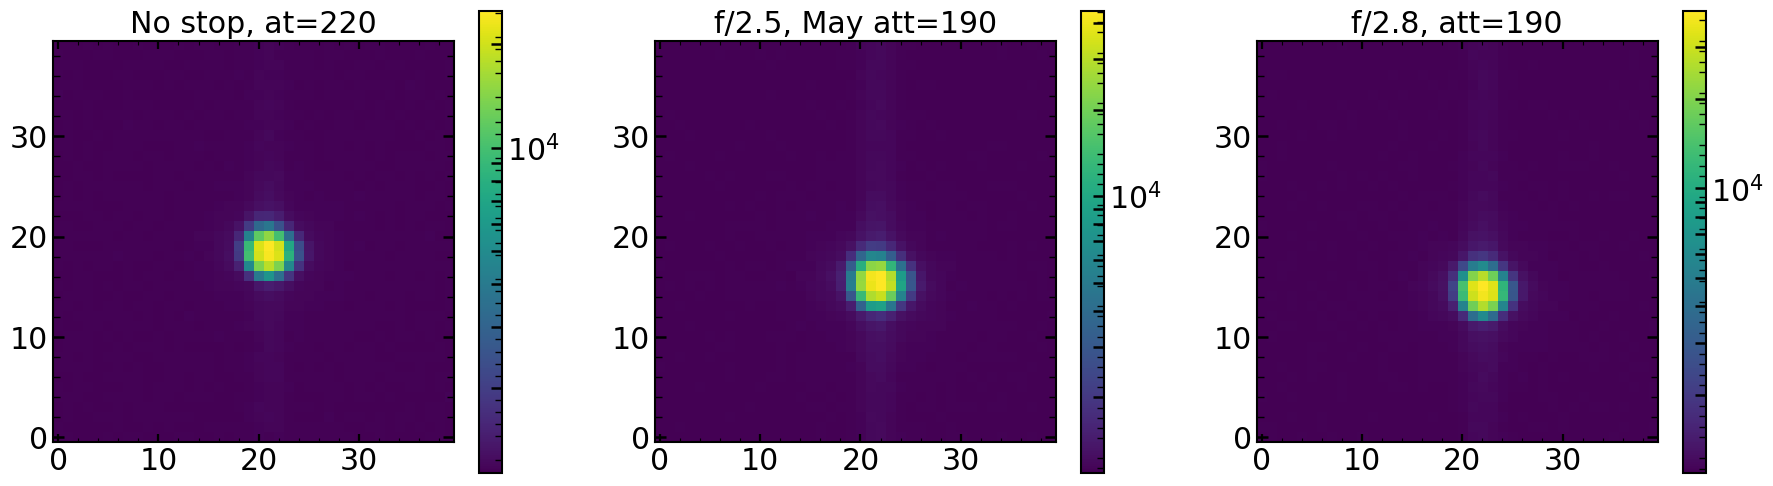

In [46]:

plt.figure(figsize=(22,6))

plt.subplot(131)
plt.imshow(test_spot_No_f_fiber4,norm=LogNorm())
plt.colorbar()
plt.title('No stop, at=220')

plt.subplot(132)
plt.imshow(test_spot_f_28_fiber4,norm=LogNorm())
plt.colorbar()
plt.title('f/2.5, May att=190')


plt.subplot(133)
plt.imshow(test_spot_f_large_fiber4,norm=LogNorm())
plt.colorbar()
plt.title('f/2.8, att=190')

print(np.max(test_spot_No_f_fiber1),np.max(test_spot_f_28_fiber1),np.max(test_spot_f_large_fiber1))

In [17]:
np.max(test_spot_f_large_fiber4)

39814

In [18]:
np.max(test_spot_f_28_fiber4)

8821

In [55]:
print(func_att(190,1,-0.337,-0.159,0.054)/func_att(195,1,-0.337,-0.159,0.054))
print(func_att(240,1,-0.337,-0.159,0.054)/func_att(243,1,-0.337,-0.159,0.054))
print(func_att(243,1,-0.337,-0.159,0.054)/func_att(245,1,-0.337,-0.159,0.054))
print(func_att(160,1,-0.337,-0.159,0.054)/func_att(165,1,-0.337,-0.159,0.054))


1.1257809358789663
1.281735653984861
1.210791401132551
1.0839620772549277


In [39]:
import numpy as np
from scipy.optimize import fmin

def func_att_diff(x,x_target):
    """ gives the difference between the current flux and the asked one

    @param[in] x             current value of the attenuator
    @param[in] x_target      fraction of the flux you are looking for

    @returns                 difference of flux
    """
    
    a=1
    b=-0.337
    c=-0.159
    d=0.054
    return np.abs(a+b*(x/100)+c*(x/100)**2+d*(x/100)**3-x_target)

def func_att(x):
    """ gives the fraction of flux given the attenuator value

    @param[in] x             current value of the attenuator

    @returns                 fraction of the full flux
    """
    a=1
    b=-0.337
    c=-0.159
    d=0.054
    return a+b*(x/100)+c*(x/100)**2+d*(x/100)**3

# list of defocus_values, movement of the slit
list_of_defocus_exposure_times=np.array([-4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,
        1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

# polynomial that gives exp time as a function of defocus
p2=np.poly1d([ 2.67750812, -0.22915717,  1.        ])
#p2 = np.poly1d([0.03920849, 5.04702675, -1.24206109, 2.611892])


# helper value, when looking for best attenuator value start search  x = 0
x0 = 0

#
#value_att = fmin(lamda_f,x0)



def defocused_exposure_times(exp_time_0,att_value_0):
    """ gives list of exposure time and attenatuor values for defocused experiment

    @param[in] exp_time_0            exposure time for focus
    @param[in] att_value_0           attenuator value  for focus

    @returns                        array of exposure times, array of attenuator values
    """
    defocused_exposure_times=[]
    att_values=[]
    
    if att_value_0==0:
        effective_exp_time_0=exp_time_0
    else:
        effective_exp_time_0=exp_time_0*(func_att(att_value_0))
    
    
    for i in list_of_defocus_exposure_times:
        time_without_att=p2(i)*effective_exp_time_0
        if time_without_att <15:
            how_much_too_bright=15/time_without_att
            
            lamda_f = lambda x: func_att_diff(x,1/how_much_too_bright)
            
            value_att = fmin(lamda_f,0)
            time_without_att=15
            att_values.append(value_att[0])
        else:
            att_values.append(0)
        defocused_exposure_times.append(time_without_att)
        
        
        
    return(np.round(defocused_exposure_times).astype(int),np.round(att_values).astype(int))


def defocused_exposure_times_single_position(exp_time_0,att_value_0,defocused_value):
    """ gives list of exposure time and attenatuor values for defocused experiment

    @param[in] exp_time_0            exposure time for focus
    @param[in] att_value_0           attenuator value  for focus
    @param[in] defocused_value       value for the slit positions
    
    @returns                        single exposure time, single attenuator value
    """
    
    defocused_exposure_times=[]
    att_values=[]
    
    if att_value_0==0:
        effective_exp_time_0=exp_time_0
    else:
        effective_exp_time_0=exp_time_0*(func_att(att_value_0))
    
    
    i=defocused_value
    time_without_att=p2(i)*effective_exp_time_0
    print(time_without_att)
    
    if time_without_att <15:
        how_much_too_bright=15/time_without_att

        lamda_f = lambda x: func_att_diff(x,1/how_much_too_bright)

        value_att = fmin(lamda_f,0)
        time_without_att=15
        att_values.append(value_att[0])
    else:
        att_values.append(0)
    defocused_exposure_times.append(time_without_att)
    return(np.round(defocused_exposure_times[0]).astype(int),np.round(att_values[0]).astype(int))


#example
test=defocused_exposure_times(5,200)
defocused_exposure_times_single_position(15,225,-4)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 37
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 38
         Function evaluations: 76
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 39
         Function evaluations: 78
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 40
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 40
         Function evaluations: 80
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 42
         Function evaluations: 85
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 42
         Function evaluations: 84
Optimization terminated successful

(35, 0)

# PIPE2D-529 (exposure for Subaru)

In [20]:
LAM_DATA='/Volumes/Saturn_USA/PFS/LAM/'
Subaru_DATA='/Volumes/Saturn_USA/PFS/Subaru/'

In [24]:
new_data_No_f=fits.open(LAM_DATA+'raw/2019-04-09/PFLA01576412.fits')[0].data
new_data_f_28=fits.open(LAM_DATA+'raw/2019-04-10/PFLA01581212.fits')[0].data
new_official_data_f_28=fits.open(LAM_DATA+'raw/2019-05-06/PFLA01707112.fits')[0].data 


In [26]:
print(fits.open(LAM_DATA+'raw/2019-04-09/PFLA01576412.fits')[0].header['EXPTIME'])
print(fits.open(LAM_DATA+'raw/2019-04-10/PFLA01581212.fits')[0].header['EXPTIME'])
print(fits.open(LAM_DATA+'raw/2019-02-02/PFLA01174812.fits')[0].header['EXPTIME'])

15.0
14.999
14.998


In [27]:
print(fits.open(LAM_DATA+'raw/2019-04-09/PFLA01576412.fits')[0].header['W_AITATT'])
print(fits.open(LAM_DATA+'raw/2019-04-10/PFLA01581212.fits')[0].header['W_AITATT'])
print(fits.open(LAM_DATA+'raw/2019-02-02/PFLA01174812.fits')[0].header['W_AITATT'])

220
220
165


In [28]:
print(fits.open(Subaru_DATA+'raw/pfs/2020-03-03/PFSA00052312.fits')[0].header['EXPTIME'])
print(fits.open(Subaru_DATA+'raw/pfs/2020-03-03/PFSA00052312.fits')[0].header['W_AITATT'])

15.002
-9998


In [29]:
Subaru_March_2020_data=fits.open(Subaru_DATA+'raw/pfs/2020-03-03/PFSA00052312.fits')[0].data

In [30]:
"""
test_spot_No_f_fiber1=new_data_No_f[1670-20:1670+20,736-20:736+20]
test_spot_f_28_fiber1=new_data_f_28[1670-20:1670+20,736-20:736+20]
test_spot_f_large_fiber1=new_data_f_large[1655-20:1655+20,715-20:715+20]

test_spot_No_f_fiber2=new_data_No_f[1665-20:1665+20,1314-20:1314+20]
test_spot_f_28_fiber2=new_data_f_28[1665-20:1665+20,1314-20:1314+20]
test_spot_f_large_fiber2=new_data_f_large[1645-20:1645+20,1337-20:1337+20]

test_spot_No_f_fiber3=new_data_No_f[1665-20:1665+20,1718-20:1718+20]
test_spot_f_28_fiber3=new_data_f_28[1665-20:1665+20,1718-20:1718+20]
test_spot_f_large_fiber3=new_data_f_large[1652-20:1652+20,1718-20:1718+20]


test_spot_No_f_fiber4=new_data_No_f[1657-20:1657+20,2099-20:2099+20]
test_spot_f_28_fiber4=new_data_f_28[1657-20:1657+20,2099-20:2099+20]
test_spot_f_large_fiber4=new_data_f_large[1645-20:1645+20,2080-20:2080+20]
"""
test_spot_Subaru_March_2020_data_fiber4=Subaru_March_2020_data[1653-20:1653+20,2090-20:2090+20]
"""
test_spot_No_f_fiber5=new_data_No_f[1657-20:1657+20,2608-20:2608+20]
test_spot_f_28_fiber5=new_data_f_28[1657-20:1657+20,2608-20:2608+20]
test_spot_f_large_fiber5=new_data_f_large[1647-20:1647+20,2628-20:2628+20]

test_spot_No_f_fiber6=new_data_No_f[1659-20:1659+20,3012-20:3012+20]
test_spot_f_28_fiber6=new_data_f_28[1659-20:1659+20,3012-20:3012+20]
test_spot_f_large_fiber6=new_data_f_large[1649-20:1649+20,2992-20:2992+20]

test_spot_No_f_fiber7=new_data_No_f[1682-20:1682+20,4345-20:4345+20]
test_spot_f_28_fiber7=new_data_f_28[1682-20:1682+20,4345-20:4345+20]
test_spot_f_large_fiber7=new_data_f_large[1672-20:1672+20,4325-20:4325+20]
"""

'\ntest_spot_No_f_fiber5=new_data_No_f[1657-20:1657+20,2608-20:2608+20]\ntest_spot_f_28_fiber5=new_data_f_28[1657-20:1657+20,2608-20:2608+20]\ntest_spot_f_large_fiber5=new_data_f_large[1647-20:1647+20,2628-20:2628+20]\n\ntest_spot_No_f_fiber6=new_data_No_f[1659-20:1659+20,3012-20:3012+20]\ntest_spot_f_28_fiber6=new_data_f_28[1659-20:1659+20,3012-20:3012+20]\ntest_spot_f_large_fiber6=new_data_f_large[1649-20:1649+20,2992-20:2992+20]\n\ntest_spot_No_f_fiber7=new_data_No_f[1682-20:1682+20,4345-20:4345+20]\ntest_spot_f_28_fiber7=new_data_f_28[1682-20:1682+20,4345-20:4345+20]\ntest_spot_f_large_fiber7=new_data_f_large[1672-20:1672+20,4325-20:4325+20]\n'

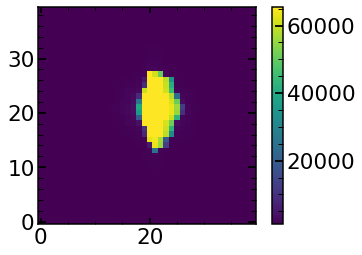

In [31]:
plt.imshow(test_spot_Subaru_March_2020_data_fiber4)
plt.colorbar()

## HgAr 

In [32]:
Subaru_Mar03_2020_HgAr_data_12_sec=fits.open(Subaru_DATA+'raw/pfs/2020-03-03/PFSA00052412.fits')[0].data
Subaru_Mar03_2020_HgAr_data_15_sec=fits.open(Subaru_DATA+'raw/pfs/2020-03-03/PFSA00052512.fits')[0].data
Subaru_Mar03_2020_HgAr_data_60_sec=fits.open(Subaru_DATA+'raw/pfs/2020-03-03/PFSA00052612.fits')[0].data


LAM_July26_2020_HgAr_data_15_sec=fits.open(LAM_DATA+'raw/2019-07-26/PFLA02140112.fits')[0].data

print(fits.open(Subaru_DATA+'raw/pfs/2020-03-03/PFSA00052412.fits')[0].header['EXPTIME'])
print(fits.open(Subaru_DATA+'raw/pfs/2020-03-03/PFSA00052412.fits')[0].header['W_AITATT'])

print(fits.open(Subaru_DATA+'raw/pfs/2020-03-03/PFSA00052512.fits')[0].header['EXPTIME'])
print(fits.open(Subaru_DATA+'raw/pfs/2020-03-03/PFSA00052512.fits')[0].header['W_AITATT'])

print(fits.open(Subaru_DATA+'raw/pfs/2020-03-03/PFSA00052612.fits')[0].header['EXPTIME'])
print(fits.open(Subaru_DATA+'raw/pfs/2020-03-03/PFSA00052612.fits')[0].header['W_AITATT'])

print(fits.open(LAM_DATA+'raw/2019-07-26/PFLA02140112.fits')[0].header['EXPTIME'])
print(fits.open(LAM_DATA+'raw/2019-07-26/PFLA02140112.fits')[0].header['W_AITATT'])

11.999
-9998
15.002
-9998
59.999
-9998
15.002
195


In [33]:
LAM_July26_2020_HgAr_data_15_sec

array([[4335,  816,  919, ...,  970,  971, 1057],
       [ 729, 1185, 1040, ...,  972,  970, 1053],
       [ 731, 1193, 1050, ...,  975,  969, 1060],
       ...,
       [ 731, 1189, 1048, ...,  965,  976, 1055],
       [ 727, 1184, 1043, ...,  976,  975, 1064],
       [ 741, 1177, 1056, ...,  977,  975,  975]], dtype=uint16)

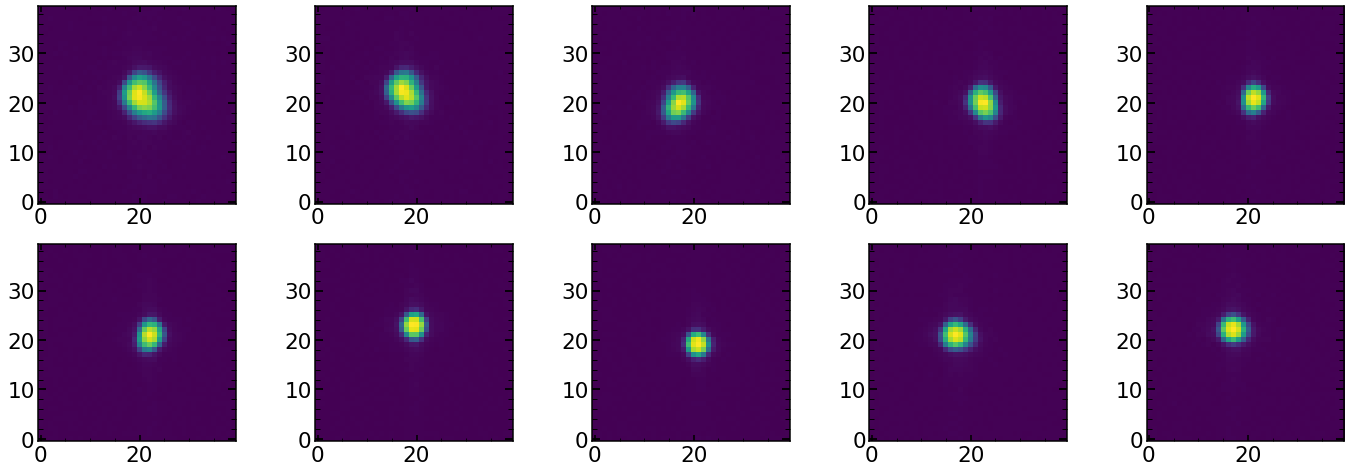

In [34]:
# we are looking at the spot that is at y=3376 for non-reduced images
size=20

list_of_x_coordinates=[86,481,731,1317,1708,2089,2618,3000,3952,4333]
list_of_y_coordinates=[3436,3416,3404,3394,3385,3387,3385,3396,3442,3421]

new_Subaru_data_Mar03_2020_cuts_12_sec=[]
for i in range(10):
    new_Subaru_data_Mar03_2020_cuts_12_sec.append(Subaru_Mar03_2020_HgAr_data_12_sec[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,\
                                                                                     list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])

new_Subaru_data_Mar03_2020_cuts_15_sec=[]
for i in range(10):
    new_Subaru_data_Mar03_2020_cuts_15_sec.append(Subaru_Mar03_2020_HgAr_data_15_sec[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,\
                                                                                     list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])

new_Subaru_data_Mar03_2020_cuts_60_sec=[]
for i in range(10):
    new_Subaru_data_Mar03_2020_cuts_60_sec.append(Subaru_Mar03_2020_HgAr_data_60_sec[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,\
                                                                                     list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])


#for i in range(16):
#    new_data_Jan24_2019_cut25s_only_Ar.append(new_data_Jan24_2019_only_Ar[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])    

plt.figure(figsize=(24,8))
plt.subplot(251)
plt.imshow(new_Subaru_data_Mar03_2020_cuts_15_sec[0],norm=LogNorm())
plt.subplot(252)
plt.imshow(new_Subaru_data_Mar03_2020_cuts_15_sec[1],norm=LogNorm())
plt.subplot(253)
plt.imshow(new_Subaru_data_Mar03_2020_cuts_15_sec[2],norm=LogNorm())
plt.subplot(254)
plt.imshow(new_Subaru_data_Mar03_2020_cuts_15_sec[3],norm=LogNorm())

plt.subplot(255)
plt.imshow(new_Subaru_data_Mar03_2020_cuts_15_sec[4],norm=LogNorm())
plt.subplot(256)
plt.imshow(new_Subaru_data_Mar03_2020_cuts_15_sec[5],norm=LogNorm())
plt.subplot(257)
plt.imshow(new_Subaru_data_Mar03_2020_cuts_15_sec[6],norm=LogNorm())
plt.subplot(258)
plt.imshow(new_Subaru_data_Mar03_2020_cuts_15_sec[7],norm=LogNorm())

plt.subplot(259)
plt.imshow(new_Subaru_data_Mar03_2020_cuts_15_sec[8],norm=LogNorm())
plt.subplot(2,5,10)
plt.imshow(new_Subaru_data_Mar03_2020_cuts_15_sec[9],norm=LogNorm())


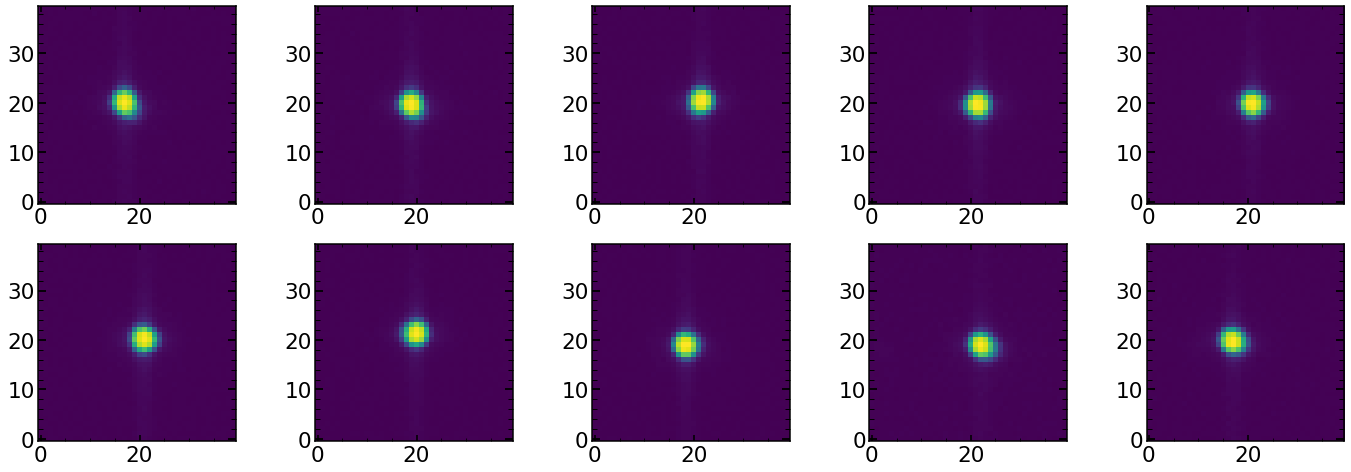

In [35]:
list_of_x_coordinates=[78,469,737,1308,1718,2100,2608,3012,3957,4343]
list_of_y_coordinates=[3440,3420,3404,3394,3385,3387,3385,3394,3442,3421]    
new_LAM_July26_2020_HgAr_data_15_sec=[]
for i in range(10):
    new_LAM_July26_2020_HgAr_data_15_sec.append(LAM_July26_2020_HgAr_data_15_sec[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,\
                                                                                     list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])

plt.figure(figsize=(24,8))
plt.subplot(251)
plt.imshow(new_LAM_July26_2020_HgAr_data_15_sec[0],norm=LogNorm())
plt.subplot(252)
plt.imshow(new_LAM_July26_2020_HgAr_data_15_sec[1],norm=LogNorm())
plt.subplot(253)
plt.imshow(new_LAM_July26_2020_HgAr_data_15_sec[2],norm=LogNorm())
plt.subplot(254)
plt.imshow(new_LAM_July26_2020_HgAr_data_15_sec[3],norm=LogNorm())

plt.subplot(255)
plt.imshow(new_LAM_July26_2020_HgAr_data_15_sec[4],norm=LogNorm())
plt.subplot(256)
plt.imshow(new_LAM_July26_2020_HgAr_data_15_sec[5],norm=LogNorm())
plt.subplot(257)
plt.imshow(new_LAM_July26_2020_HgAr_data_15_sec[6],norm=LogNorm())
plt.subplot(258)
plt.imshow(new_LAM_July26_2020_HgAr_data_15_sec[7],norm=LogNorm())

plt.subplot(259)
plt.imshow(new_LAM_July26_2020_HgAr_data_15_sec[8],norm=LogNorm())
plt.subplot(2,5,10)
plt.imshow(new_LAM_July26_2020_HgAr_data_15_sec[9],norm=LogNorm())

In [36]:
[np.sum(image) for image in new_LAM_July26_2020_HgAr_data_15_sec]

[2097357,
 2118116,
 2122011,
 2172394,
 2165231,
 2253509,
 2151589,
 2115413,
 1774628,
 1843050]

In [37]:
"""
# we are looking at the spot that is at y=1365 for non-reduced images
size=20


new_Subaru_data_Mar03_2020_cuts=[]

list_of_x_coordinates=[90,478,727,1321,1712,2093,2615,3000,3952,4333]
list_of_y_coordinates=[1276,1265,1377-123,1370-123,1367-123,1365-123,1366-123,1370-123,1408-123,1396-123]

new_Subaru_data_Mar03_2020_cuts=[]
for i in range(10):
    new_Subaru_data_Mar03_2020_cuts.append(Subaru_Mar03_2020_HgAr_data[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])

#for i in range(16):
#    new_data_Jan24_2019_cut25s_only_Ar.append(new_data_Jan24_2019_only_Ar[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])    

plt.figure(figsize=(24,8))
plt.subplot(251)
plt.imshow(new_Subaru_data_Mar03_2020_cuts[0],norm=LogNorm())
plt.subplot(252)
plt.imshow(new_Subaru_data_Mar03_2020_cuts[1],norm=LogNorm())
plt.subplot(253)
plt.imshow(new_Subaru_data_Mar03_2020_cuts[2],norm=LogNorm())
plt.subplot(254)
plt.imshow(new_Subaru_data_Mar03_2020_cuts[3],norm=LogNorm())

plt.subplot(255)
plt.imshow(new_Subaru_data_Mar03_2020_cuts[4],norm=LogNorm())
plt.subplot(256)
plt.imshow(new_Subaru_data_Mar03_2020_cuts[5],norm=LogNorm())
plt.subplot(257)
plt.imshow(new_Subaru_data_Mar03_2020_cuts[6],norm=LogNorm())
plt.subplot(258)
plt.imshow(new_Subaru_data_Mar03_2020_cuts[7],norm=LogNorm())

plt.subplot(259)
plt.imshow(new_Subaru_data_Mar03_2020_cuts[8],norm=LogNorm())
plt.subplot(2,5,10)
plt.imshow(new_Subaru_data_Mar03_2020_cuts[9],norm=LogNorm())

"""

'\n# we are looking at the spot that is at y=1365 for non-reduced images\nsize=20\n\n\nnew_Subaru_data_Mar03_2020_cuts=[]\n\nlist_of_x_coordinates=[90,478,727,1321,1712,2093,2615,3000,3952,4333]\nlist_of_y_coordinates=[1276,1265,1377-123,1370-123,1367-123,1365-123,1366-123,1370-123,1408-123,1396-123]\n\nnew_Subaru_data_Mar03_2020_cuts=[]\nfor i in range(10):\n    new_Subaru_data_Mar03_2020_cuts.append(Subaru_Mar03_2020_HgAr_data[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])\n\n#for i in range(16):\n#    new_data_Jan24_2019_cut25s_only_Ar.append(new_data_Jan24_2019_only_Ar[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])    \n\nplt.figure(figsize=(24,8))\nplt.subplot(251)\nplt.imshow(new_Subaru_data_Mar03_2020_cuts[0],norm=LogNorm())\nplt.subplot(252)\nplt.imshow(new_Subaru_data_Mar03_2020_cuts[1],norm=LogNorm())\nplt.subplot(253)\nplt.imsh

In [38]:
# subtract maximal value from the median of the values on the edge of the image (rough estimation of the background)
max_flux_in_fibers_Subaru_data_Mar03_2020_12_sec=[]
for i in range(len(new_Subaru_data_Mar03_2020_cuts_12_sec)):
    max_flux_in_fibers_Subaru_data_Mar03_2020_12_sec.append(np.sum(new_Subaru_data_Mar03_2020_cuts_12_sec[i]-np.median(new_Subaru_data_Mar03_2020_cuts_12_sec[i][:,0])))
  
max_flux_in_fibers_Subaru_data_Mar03_2020_15_sec=[]
for i in range(len(new_Subaru_data_Mar03_2020_cuts_15_sec)):
    max_flux_in_fibers_Subaru_data_Mar03_2020_15_sec.append(np.sum(new_Subaru_data_Mar03_2020_cuts_15_sec[i]-np.median(new_Subaru_data_Mar03_2020_cuts_15_sec[i][:,0])))
    
max_flux_in_fibers_Subaru_data_Mar03_2020_60_sec=[]
for i in range(len(new_Subaru_data_Mar03_2020_cuts_60_sec)):
    max_flux_in_fibers_Subaru_data_Mar03_2020_60_sec.append(np.sum(new_Subaru_data_Mar03_2020_cuts_60_sec[i]-np.median(new_Subaru_data_Mar03_2020_cuts_60_sec[i][:,0])))
    
max_flux_in_fibers_LAM_data_July_2019_15_sec=[]
really_max_flux_in_fibers_LAM_data_July_2019_15_sec=[]
for i in range(len(new_LAM_July26_2020_HgAr_data_15_sec)):
    max_flux_in_fibers_LAM_data_July_2019_15_sec.append(np.sum(new_LAM_July26_2020_HgAr_data_15_sec[i]-np.median(new_LAM_July26_2020_HgAr_data_15_sec[i][:,0])))
    really_max_flux_in_fibers_LAM_data_July_2019_15_sec.append(np.max(new_LAM_July26_2020_HgAr_data_15_sec[i]-np.median(new_LAM_July26_2020_HgAr_data_15_sec[i][:,0])))
    
max_flux_in_fibers_Subaru_data_Mar03_2020_12_sec=np.array(max_flux_in_fibers_Subaru_data_Mar03_2020_12_sec)
max_flux_in_fibers_Subaru_data_Mar03_2020_15_sec=np.array(max_flux_in_fibers_Subaru_data_Mar03_2020_15_sec)
max_flux_in_fibers_Subaru_data_Mar03_2020_60_sec=np.array(max_flux_in_fibers_Subaru_data_Mar03_2020_60_sec)
max_flux_in_fibers_LAM_data_July_2019_15_sec=np.array(max_flux_in_fibers_LAM_data_July_2019_15_sec)

In [39]:
corrective_factor=np.mean(np.array(max_flux_in_fibers_LAM_data_July_2019_15_sec)/np.array(really_max_flux_in_fibers_LAM_data_July_2019_15_sec))

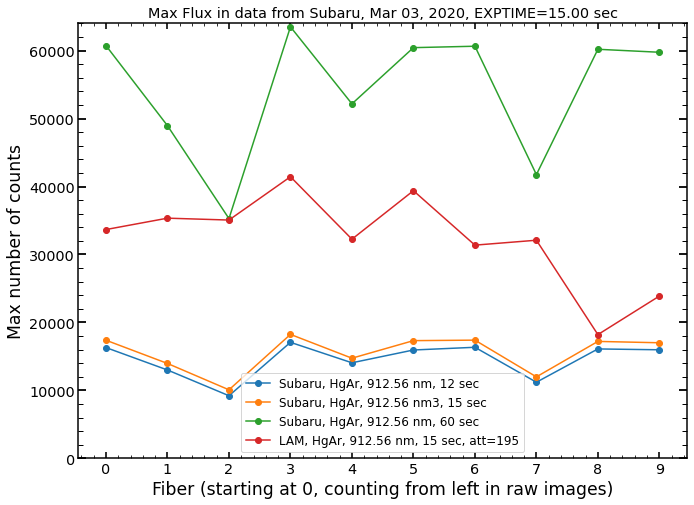

In [40]:
 matplotlib.rcParams.update({'font.size': 12})   
plt.figure(figsize=(24,8))
plt.subplot(121)

plt.plot(max_flux_in_fibers_Subaru_data_Mar03_2020_12_sec/corrective_factor,marker='o',label='Subaru, HgAr, 912.56 nm, 12 sec')
plt.plot(max_flux_in_fibers_Subaru_data_Mar03_2020_15_sec/corrective_factor,marker='o',label='Subaru, HgAr, 912.56 nm, 15 sec')
plt.plot(max_flux_in_fibers_Subaru_data_Mar03_2020_60_sec/corrective_factor,marker='o',label='Subaru, HgAr, 912.56 nm, 60 sec')

plt.plot(max_flux_in_fibers_LAM_data_July_2019_15_sec/corrective_factor,marker='o',label='LAM, HgAr, 912.56 nm, 15 sec, att=195')
#plt.plot(max_flux_in_fibers_in_new_data_only_Ar,marker='o',label='only Ar')
#plt.plot(np.array(max_flux_in_fibers_in_new_data_only_Ar)*5.5,marker='o',ls='--',label='only Ar * 5.5')

plt.xticks(range(10))
plt.ylim(0,64000)
plt.title('Max Flux in data from Subaru, Mar 03, 2020, EXPTIME=15.00 sec')
plt.xlabel('Fiber (starting at 0, counting from left in raw images)')
plt.ylabel('Max number of counts')
plt.legend()


## Neon 

In [41]:
Subaru_Mar31_2020_Neon_data_5_sec=fits.open(Subaru_DATA+'raw/pfs/2020-03-31/PFSA00105912.fits')[0].data
Subaru_Mar31_2020_Neon_data_10_sec=fits.open(Subaru_DATA+'raw/pfs/2020-03-31/PFSA00106012.fits')[0].data
Subaru_Apr02_2020_Neon_data_2_sec=fits.open(Subaru_DATA+'raw/pfs/2020-04-02/PFSA00135712.fits')[0].data
Subaru_Apr02_2020_Neon_data_3_sec=fits.open(Subaru_DATA+'raw/pfs/2020-04-02/PFSA00135612.fits')[0].data

LAM_July26_2020_Neon_data_15_sec=fits.open(LAM_DATA+'raw/2019-07-26/PFLA02160412.fits')[0].data

In [42]:
print(fits.open(LAM_DATA+'raw/2019-07-26/PFLA02160412.fits')[0].header['EXPTIME'])
print(fits.open(LAM_DATA+'raw/2019-07-26/PFLA02160412.fits')[0].header['W_AITATT'])

14.999
243


In [43]:
list_of_x_coordinates=[82,469,737,1308,1718,2100,2608,3012,3957,4343]
list_of_y_coordinates=np.array([1245,1230,1218,1212,1206,1200,1203,1203,1245,1230]    )+225 

new_Subaru_data_Mar31_2020_cuts_5_sec=[]
for i in range(10):
    new_Subaru_data_Mar31_2020_cuts_5_sec.append(Subaru_Mar31_2020_Neon_data_5_sec[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,\
                                                                                     list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])

    
    
  
new_Subaru_data_Apr02_2020_cuts_2_sec=[]
for i in range(10):
    new_Subaru_data_Apr02_2020_cuts_2_sec.append(Subaru_Apr02_2020_Neon_data_2_sec[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,\
                                                                                     list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
                                                                              
  
new_Subaru_data_Apr02_2020_cuts_3_sec=[]
for i in range(10):
    new_Subaru_data_Apr02_2020_cuts_3_sec.append(Subaru_Apr02_2020_Neon_data_3_sec[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,\
                                                                                     list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
                                                                              


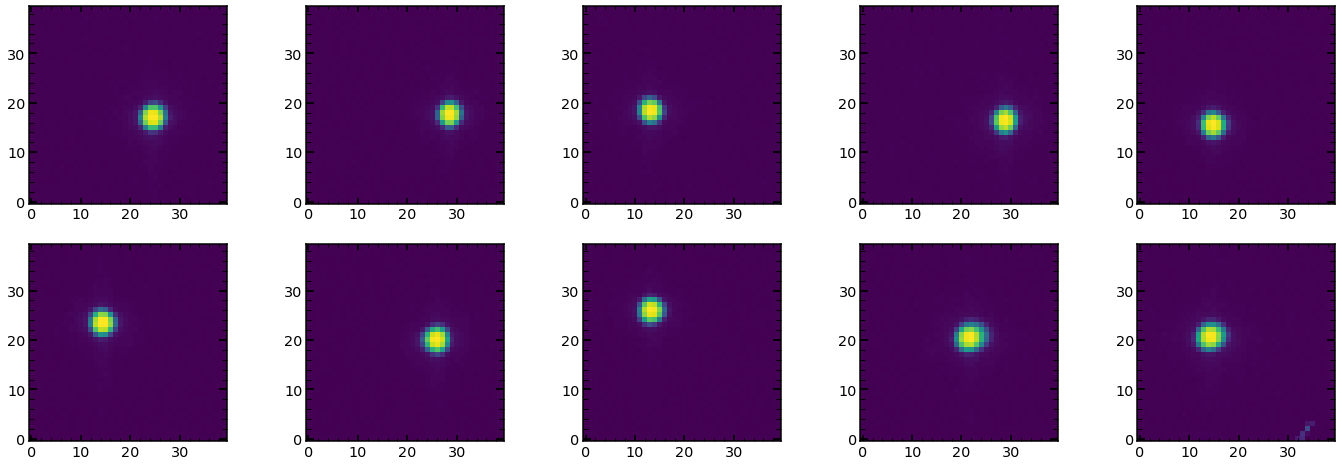

In [44]:
plt.figure(figsize=(24,8))
plt.subplot(251)
plt.imshow(new_Subaru_data_Apr02_2020_cuts_2_sec[0],norm=LogNorm())
plt.subplot(252)
plt.imshow(new_Subaru_data_Apr02_2020_cuts_2_sec[1],norm=LogNorm())
plt.subplot(253)
plt.imshow(new_Subaru_data_Apr02_2020_cuts_2_sec[2],norm=LogNorm())
plt.subplot(254)
plt.imshow(new_Subaru_data_Apr02_2020_cuts_2_sec[3],norm=LogNorm())

plt.subplot(255)
plt.imshow(new_Subaru_data_Apr02_2020_cuts_2_sec[4],norm=LogNorm())
plt.subplot(256)
plt.imshow(new_Subaru_data_Apr02_2020_cuts_2_sec[5],norm=LogNorm())
plt.subplot(257)
plt.imshow(new_Subaru_data_Apr02_2020_cuts_2_sec[6],norm=LogNorm())
plt.subplot(258)
plt.imshow(new_Subaru_data_Apr02_2020_cuts_2_sec[7],norm=LogNorm())

plt.subplot(259)
plt.imshow(new_Subaru_data_Apr02_2020_cuts_2_sec[8],norm=LogNorm())
plt.subplot(2,5,10)
plt.imshow(new_Subaru_data_Apr02_2020_cuts_2_sec[9],norm=LogNorm())


In [45]:
[np.max(image) for image in new_Subaru_data_Apr02_2020_cuts_2_sec]

[34198, 28665, 21595, 35144, 29325, 33182, 34005, 24148, 29159, 30651]

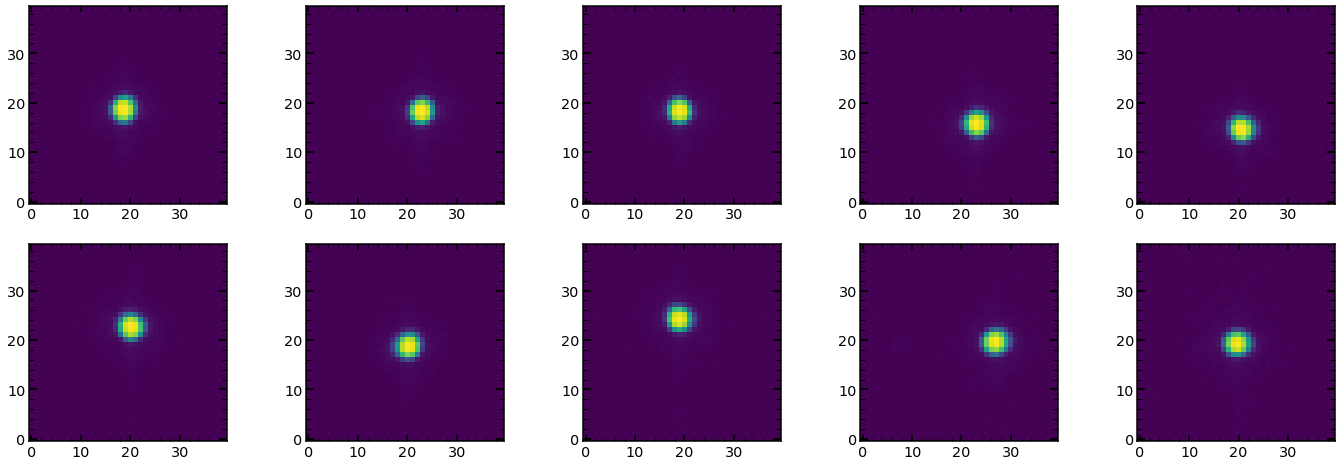

In [46]:
list_of_x_coordinates=[82,469,737,1308,1718,2100,2608,3012,3957,4343]
list_of_y_coordinates=np.array([1245,1230,1218,1212,1206,1200,1203,1203,1245,1230]   )+225
new_LAM_July26_2020_Ne_data_15_sec=[]
for i in range(10):
    new_LAM_July26_2020_Ne_data_15_sec.append(LAM_July26_2020_Neon_data_15_sec[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,\
                                                                                     list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])

plt.figure(figsize=(24,8))
plt.subplot(251)
plt.imshow(new_LAM_July26_2020_Ne_data_15_sec[0],norm=LogNorm())
plt.subplot(252)
plt.imshow(new_LAM_July26_2020_Ne_data_15_sec[1],norm=LogNorm())
plt.subplot(253)
plt.imshow(new_LAM_July26_2020_Ne_data_15_sec[2],norm=LogNorm())
plt.subplot(254)
plt.imshow(new_LAM_July26_2020_Ne_data_15_sec[3],norm=LogNorm())

plt.subplot(255)
plt.imshow(new_LAM_July26_2020_Ne_data_15_sec[4],norm=LogNorm())
plt.subplot(256)
plt.imshow(new_LAM_July26_2020_Ne_data_15_sec[5],norm=LogNorm())
plt.subplot(257)
plt.imshow(new_LAM_July26_2020_Ne_data_15_sec[6],norm=LogNorm())
plt.subplot(258)
plt.imshow(new_LAM_July26_2020_Ne_data_15_sec[7],norm=LogNorm())

plt.subplot(259)
plt.imshow(new_LAM_July26_2020_Ne_data_15_sec[8],norm=LogNorm())
plt.subplot(2,5,10)
plt.imshow(new_LAM_July26_2020_Ne_data_15_sec[9],norm=LogNorm())

In [47]:
[np.max(image) for image in new_LAM_July26_2020_Ne_data_15_sec]

[31138, 29734, 30443, 37338, 27724, 34519, 27531, 27736, 18351, 22038]

In [48]:
# subtract maximal value from the median of the values on the edge of the image (rough estimation of the background)
max_flux_in_fibers_Subaru_data_Apr02_2020_2_sec=[]
for i in range(len(new_Subaru_data_Apr02_2020_cuts_2_sec)):
    max_flux_in_fibers_Subaru_data_Apr02_2020_2_sec.append(np.sum(new_Subaru_data_Apr02_2020_cuts_2_sec[i]-np.median(new_Subaru_data_Apr02_2020_cuts_2_sec[i][:,0])))
  
max_flux_in_fibers_Subaru_data_Apr02_2020_3_sec=[]
for i in range(len(new_Subaru_data_Apr02_2020_cuts_3_sec)):
    max_flux_in_fibers_Subaru_data_Apr02_2020_3_sec.append(np.sum(new_Subaru_data_Apr02_2020_cuts_3_sec[i]-np.median(new_Subaru_data_Apr02_2020_cuts_3_sec[i][:,0])))
    
max_flux_in_fibers_LAM_data_July_2019_Neon_15_sec=[]
really_max_flux_in_fibers_LAM_data_July_2019_Neon_15_sec=[]
for i in range(len(new_LAM_July26_2020_Ne_data_15_sec)):
    max_flux_in_fibers_LAM_data_July_2019_Neon_15_sec.append(np.sum(new_LAM_July26_2020_Ne_data_15_sec[i]-np.median(new_LAM_July26_2020_Ne_data_15_sec[i][:,0])))
    really_max_flux_in_fibers_LAM_data_July_2019_Neon_15_sec.append(np.max(new_LAM_July26_2020_Ne_data_15_sec[i]-np.median(new_LAM_July26_2020_Ne_data_15_sec[i][:,0])))
    
max_flux_in_fibers_Subaru_data_Apr02_2020_2_sec=np.array(max_flux_in_fibers_Subaru_data_Apr02_2020_2_sec)
max_flux_in_fibers_Subaru_data_Apr02_2020_3_sec=np.array(max_flux_in_fibers_Subaru_data_Apr02_2020_3_sec)
max_flux_in_fibers_LAM_data_July_2019_Neon_15_sec=np.array(max_flux_in_fibers_LAM_data_July_2019_Neon_15_sec)
really_max_flux_in_fibers_LAM_data_July_2019_Neon_15_sec=np.array(really_max_flux_in_fibers_LAM_data_July_2019_Neon_15_sec)

corrective_factor=np.mean(np.array(max_flux_in_fibers_LAM_data_July_2019_Neon_15_sec)/np.array(really_max_flux_in_fibers_LAM_data_July_2019_Neon_15_sec))

In [49]:
max_flux_in_fibers_Subaru_data_Apr02_2020_3_sec

array([570788., 458717., 327441., 569645., 475089., 542361., 552523.,
       376682., 539847., 543788.])

In [50]:
max_flux_in_fibers_LAM_data_July_2019_Neon_15_sec

array([337462., 325717., 321541., 395994., 300867., 373303., 291133.,
       289596., 207493., 231795.])

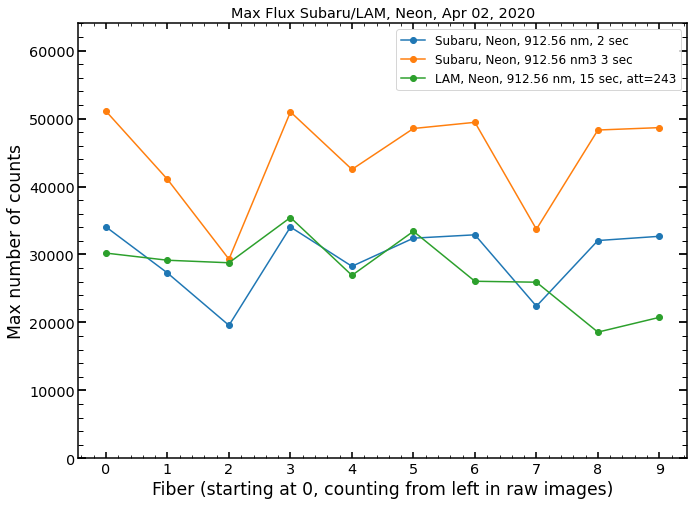

In [51]:
 matplotlib.rcParams.update({'font.size': 12})   
plt.figure(figsize=(24,8))
plt.subplot(121)

plt.plot(max_flux_in_fibers_Subaru_data_Apr02_2020_2_sec/corrective_factor,marker='o',label='Subaru, Neon, 912.56 nm, 2 sec')
plt.plot(max_flux_in_fibers_Subaru_data_Apr02_2020_3_sec/corrective_factor,marker='o',label='Subaru, Neon, 912.56 nm3 3 sec')
#plt.plot(max_flux_in_fibers_Subaru_data_Mar03_2020_60_sec/corrective_factor,marker='o',label='Subaru, HgAr, 912.56 nm, 60 sec')

plt.plot(max_flux_in_fibers_LAM_data_July_2019_Neon_15_sec/corrective_factor,marker='o',label='LAM, Neon, 912.56 nm, 15 sec, att=243')
#plt.plot(max_flux_in_fibers_in_new_data_only_Ar,marker='o',label='only Ar')
#plt.plot(np.array(max_flux_in_fibers_in_new_data_only_Ar)*5.5,marker='o',ls='--',label='only Ar * 5.5')

plt.xticks(range(10))
plt.ylim(0,64000)
plt.title('Max Flux Subaru/LAM, Neon, Apr 02, 2020')
plt.xlabel('Fiber (starting at 0, counting from left in raw images)')
plt.ylabel('Max number of counts')
plt.legend()


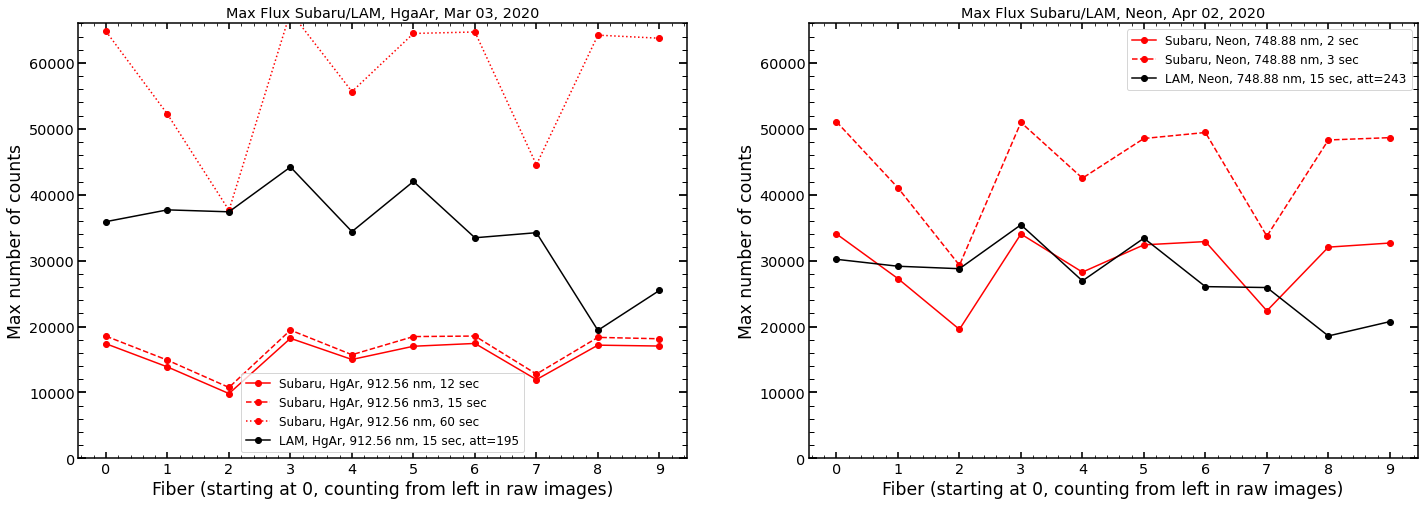

In [52]:
matplotlib.rcParams.update({'font.size': 12})   

plt.figure(figsize=(24,8))
plt.subplot(121)

plt.plot(max_flux_in_fibers_Subaru_data_Mar03_2020_12_sec/corrective_factor,marker='o',label='Subaru, HgAr, 912.56 nm, 12 sec',color='red',ls='-')
plt.plot(max_flux_in_fibers_Subaru_data_Mar03_2020_15_sec/corrective_factor,marker='o',label='Subaru, HgAr, 912.56 nm3, 15 sec',color='red',ls='--')
plt.plot(max_flux_in_fibers_Subaru_data_Mar03_2020_60_sec/corrective_factor,marker='o',label='Subaru, HgAr, 912.56 nm, 60 sec',color='red',ls=':')

plt.plot(max_flux_in_fibers_LAM_data_July_2019_15_sec/corrective_factor,marker='o',color='black',label='LAM, HgAr, 912.56 nm, 15 sec, att=195')
#plt.plot(max_flux_in_fibers_in_new_data_only_Ar,marker='o',label='only Ar')
#plt.plot(np.array(max_flux_in_fibers_in_new_data_only_Ar)*5.5,marker='o',ls='--',label='only Ar * 5.5')

plt.xticks(range(10))
plt.ylim(0,66000)
plt.title('Max Flux Subaru/LAM, HgaAr, Mar 03, 2020')
plt.xlabel('Fiber (starting at 0, counting from left in raw images)')
plt.ylabel('Max number of counts')
plt.legend()


plt.subplot(122)

plt.plot(max_flux_in_fibers_Subaru_data_Apr02_2020_2_sec/corrective_factor,marker='o',label='Subaru, Neon, 748.88 nm, 2 sec',ls='-',color='red')
plt.plot(max_flux_in_fibers_Subaru_data_Apr02_2020_3_sec/corrective_factor,marker='o',label='Subaru, Neon, 748.88 nm, 3 sec',ls='--',color='red')
#plt.plot(max_flux_in_fibers_Subaru_data_Mar03_2020_60_sec/corrective_factor,marker='o',label='Subaru, HgAr, 912.56 nm, 60 sec')

plt.plot(max_flux_in_fibers_LAM_data_July_2019_Neon_15_sec/corrective_factor,marker='o',label='LAM, Neon, 748.88 nm, 15 sec, att=243',color='black')
#plt.plot(max_flux_in_fibers_in_new_data_only_Ar,marker='o',label='only Ar')
#plt.plot(np.array(max_flux_in_fibers_in_new_data_only_Ar)*5.5,marker='o',ls='--',label='only Ar * 5.5')

plt.xticks(range(10))
plt.ylim(0,66000)
plt.title('Max Flux Subaru/LAM, Neon, Apr 02, 2020')
plt.xlabel('Fiber (starting at 0, counting from left in raw images)')
plt.ylabel('Max number of counts')
plt.legend()

In [53]:
finalNe_Feb2020_dataset

NameError: name 'finalNe_Feb2020_dataset' is not defined

In [54]:
with open('/Users/nevencaplar/Documents/PFS/ReducedData/Data_May_28/Dataframes/finalHgAr_Feb2020', 'rb') as f:
    finalHgAr_Feb2020_dataset=pickle.load(f)  
with open('/Users/nevencaplar/Documents/PFS/ReducedData/Data_May_28/Dataframes/finalNe_Feb2020', 'rb') as f:
    finalNe_Feb2020_dataset=pickle.load(f)  
with open('/Users/nevencaplar/Documents/PFS/ReducedData/Data_May_28/Dataframes/finalKr_Feb2020', 'rb') as f:
    finalKr_Feb2020_dataset=pickle.load(f)  


In [254]:
finalNe_Feb2020_dataset[finalNe_Feb2020_dataset['fiber']==339]

fiber    xc    yc wavelength close lamp xc_effective second_offset  \
36   339  1612   315  650.84186     0   Ne         1612         30.12   
37   339  1612   345   653.4774    -1   Ne         1612             0   
38   339  1612   420   660.0668     1   Ne         1612             0   
39   339  1613   511  668.01764     0   Ne         1613         44.24   
40   339  1613   555   671.9268    -1   Ne         1613             0   
41   339  1613   797  693.13116     1   Ne         1613             0   
42   339  1613  1077  717.59015     1   Ne         1613             0   
43   339  1613  1159  724.72437     1   Ne         1613             0   
44   339  1613  1381   744.1276     0   Ne         1613         38.57   

   second_ratio second2_offset second2_ratio  
36        0.406              0             0  
37            0              0             0  
38            0              0             0  
39         0.67         -29.97         0.003  
40            0              0             0  
41            0              0             0  
42            0              0             0  
43            0              0             0  
44        0.012          57.44         0.162

In [255]:
19.5/(1381-1159)

0.08783783783783784

In [256]:
50*0.0878+744

748.39

## Blue - red 

# Subaru Argon and Krypton 

In [94]:
i=23146
i=23174
data=fits.open('/Volumes/Saturn_USA/PFS/Subaru/raw/pfs/2020-08-03/sps/PFSA0'+str(i)+'12.fits')
Subaru_Aug04_2020_Ar_data_30_sec=data[1].data

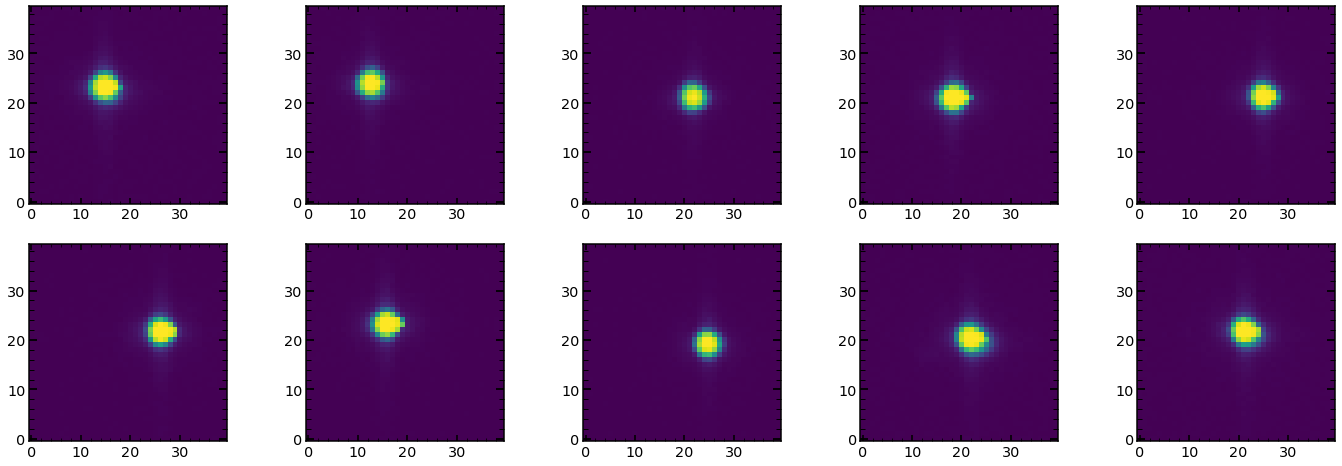

In [95]:
# we are looking at the spot that is at y=3376 for non-reduced images
size=20

list_of_x_coordinates=[86,481,731,1317,1708,2089,2618,3000,3952,4333]
list_of_y_coordinates=[3436,3416,3404,3394,3385,3387,3385,3396,3442,3421]

Subaru_Aug04_2020_Ar_data_30_sec_cuts=[]
for i in range(10):
    Subaru_Aug04_2020_Ar_data_30_sec_cuts.append(Subaru_Aug04_2020_Ar_data_30_sec[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,\
                                                                                     list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
"""
new_Subaru_data_Mar03_2020_cuts_15_sec=[]
for i in range(10):
    new_Subaru_data_Mar03_2020_cuts_15_sec.append(Subaru_Mar03_2020_HgAr_data_15_sec[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,\
                                                                                     list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])

new_Subaru_data_Mar03_2020_cuts_60_sec=[]
for i in range(10):
    new_Subaru_data_Mar03_2020_cuts_60_sec.append(Subaru_Mar03_2020_HgAr_data_60_sec[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,\
                                                                                    list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])

""" 
#for i in range(16):
#    new_data_Jan24_2019_cut25s_only_Ar.append(new_data_Jan24_2019_only_Ar[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])    

plt.figure(figsize=(24,8))
plt.subplot(251)
plt.imshow(Subaru_Aug04_2020_Ar_data_30_sec_cuts[0],norm=LogNorm())
plt.subplot(252)
plt.imshow(Subaru_Aug04_2020_Ar_data_30_sec_cuts[1],norm=LogNorm())
plt.subplot(253)
plt.imshow(Subaru_Aug04_2020_Ar_data_30_sec_cuts[2],norm=LogNorm())
plt.subplot(254)
plt.imshow(Subaru_Aug04_2020_Ar_data_30_sec_cuts[3],norm=LogNorm())

plt.subplot(255)
plt.imshow(Subaru_Aug04_2020_Ar_data_30_sec_cuts[4],norm=LogNorm())
plt.subplot(256)
plt.imshow(Subaru_Aug04_2020_Ar_data_30_sec_cuts[5],norm=LogNorm())
plt.subplot(257)
plt.imshow(Subaru_Aug04_2020_Ar_data_30_sec_cuts[6],norm=LogNorm())
plt.subplot(258)
plt.imshow(Subaru_Aug04_2020_Ar_data_30_sec_cuts[7],norm=LogNorm())

plt.subplot(259)
plt.imshow(Subaru_Aug04_2020_Ar_data_30_sec_cuts[8],norm=LogNorm())
plt.subplot(2,5,10)
plt.imshow(Subaru_Aug04_2020_Ar_data_30_sec_cuts[9],norm=LogNorm())


In [96]:
[np.sum(image) for image in Subaru_Aug04_2020_Ar_data_30_sec_cuts]

[3169572.0,
 2963610.0,
 2879598.0,
 3411792.0,
 3135378.0,
 3269832.0,
 3203409.0,
 3007065.0,
 3018950.0,
 3000944.0]

In [97]:
[np.max(image) for image in Subaru_Aug04_2020_Ar_data_30_sec_cuts]

[65535.0,
 65535.0,
 61925.0,
 65535.0,
 65535.0,
 65535.0,
 65535.0,
 65535.0,
 65535.0,
 65535.0]

In [98]:
corrective_factor

11.174342097533966

In [99]:
np.array(max_flux_in_fibers_Subaru_data_Mar03_2020_15_sec/corrective_factor)*10

array([185379.14643379, 148904.51585219, 107530.2679578 , 194553.73578367,
       157169.87941398, 184743.76227085, 185527.7010409 , 127850.92737722,
       183524.89856674, 181395.91416727])

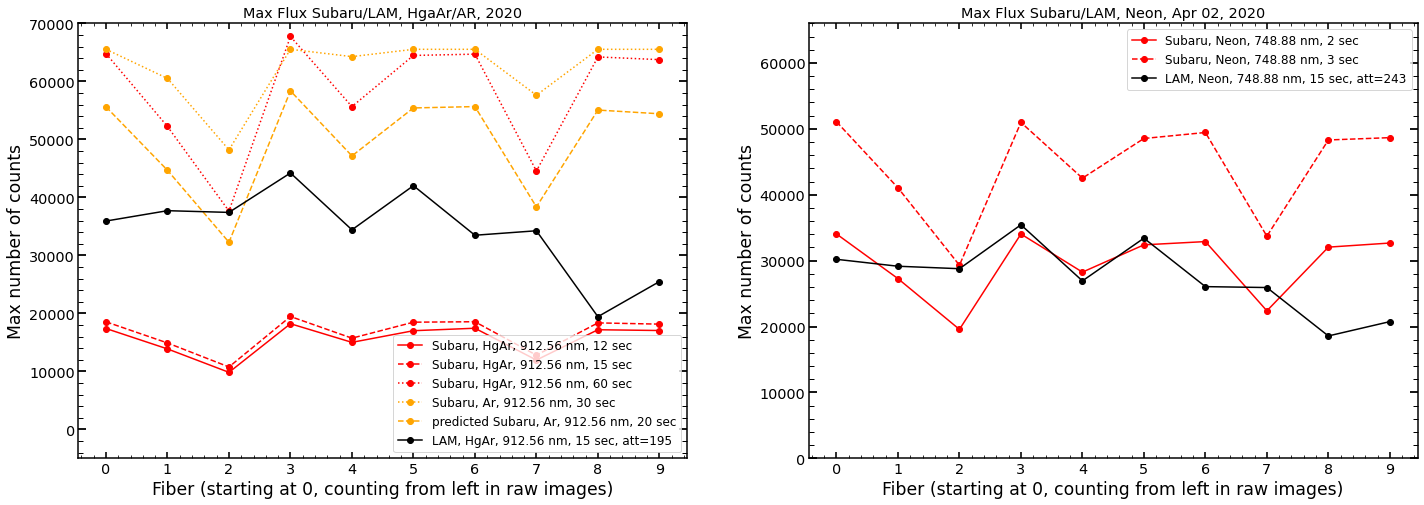

In [93]:
matplotlib.rcParams.update({'font.size': 12})   

plt.figure(figsize=(24,8))
plt.subplot(121)

plt.plot(max_flux_in_fibers_Subaru_data_Mar03_2020_12_sec/corrective_factor,marker='o',label='Subaru, HgAr, 912.56 nm, 12 sec',color='red',ls='-')
plt.plot(max_flux_in_fibers_Subaru_data_Mar03_2020_15_sec/corrective_factor,marker='o',label='Subaru, HgAr, 912.56 nm, 15 sec',color='red',ls='--')
plt.plot(max_flux_in_fibers_Subaru_data_Mar03_2020_60_sec/corrective_factor,marker='o',label='Subaru, HgAr, 912.56 nm, 60 sec',color='red',ls=':')
plt.plot([np.max(image) for image in Subaru_Aug04_2020_Ar_data_30_sec_cuts],marker='o',label='Subaru, Ar, 912.56 nm, 30 sec',color='orange',ls=':')
plt.plot(np.array(max_flux_in_fibers_Subaru_data_Mar03_2020_15_sec/corrective_factor)*3,marker='o',label='predicted Subaru, Ar, 912.56 nm, 20 sec',color='orange',ls='--')

plt.plot(max_flux_in_fibers_LAM_data_July_2019_15_sec/corrective_factor,marker='o',color='black',label='LAM, HgAr, 912.56 nm, 15 sec, att=195')
#plt.plot(max_flux_in_fibers_in_new_data_only_Ar,marker='o',label='only Ar')
#plt.plot(np.array(max_flux_in_fibers_in_new_data_only_Ar)*5.5,marker='o',ls='--',label='only Ar * 5.5')

plt.xticks(range(10))
plt.ylim(-5000,70000)
plt.title('Max Flux Subaru/LAM, HgaAr/AR, 2020')
plt.xlabel('Fiber (starting at 0, counting from left in raw images)')
plt.ylabel('Max number of counts')
plt.legend()


plt.subplot(122)

plt.plot(max_flux_in_fibers_Subaru_data_Apr02_2020_2_sec/corrective_factor,marker='o',label='Subaru, Neon, 748.88 nm, 2 sec',ls='-',color='red')
plt.plot(max_flux_in_fibers_Subaru_data_Apr02_2020_3_sec/corrective_factor,marker='o',label='Subaru, Neon, 748.88 nm, 3 sec',ls='--',color='red')
#plt.plot(max_flux_in_fibers_Subaru_data_Mar03_2020_60_sec/corrective_factor,marker='o',label='Subaru, HgAr, 912.56 nm, 60 sec')

plt.plot(max_flux_in_fibers_LAM_data_July_2019_Neon_15_sec/corrective_factor,marker='o',label='LAM, Neon, 748.88 nm, 15 sec, att=243',color='black')
#plt.plot(max_flux_in_fibers_in_new_data_only_Ar,marker='o',label='only Ar')
#plt.plot(np.array(max_flux_in_fibers_in_new_data_only_Ar)*5.5,marker='o',ls='--',label='only Ar * 5.5')

plt.xticks(range(10))
plt.ylim(0,66000)
plt.title('Max Flux Subaru/LAM, Neon, Apr 02, 2020')
plt.xlabel('Fiber (starting at 0, counting from left in raw images)')
plt.ylabel('Max number of counts')
plt.legend()

In [85]:
48.19*2/3

32.126666666666665

In [87]:
np.array(max_flux_in_fibers_Subaru_data_Mar03_2020_15_sec/corrective_factor)*3.

array([55613.74393014, 44671.35475566, 32259.08038734, 58366.1207351 ,
       47150.96382419, 55423.12868126, 55658.31031227, 38355.27821317,
       55057.46957002, 54418.77425018])

## Krypton 

In [137]:
i=23196
data=fits.open('/Volumes/Saturn_USA/PFS/Subaru/raw/pfs/2020-08-04/PFSA0'+str(i)+'12.fits')
Subaru_Aug04_2020_Kr_data_10_sec=data[1].data

In [138]:
list_of_x_coordinates=[82,469,737,1308,1718,2100,2608,3012,3957,4343]
list_of_y_coordinates=np.array([1245,1230,1218,1212,1206,1200,1203,1203,1245,1230]   )+1004
new_Sub_Aug04_2020_Kr_data_10_sec=[]

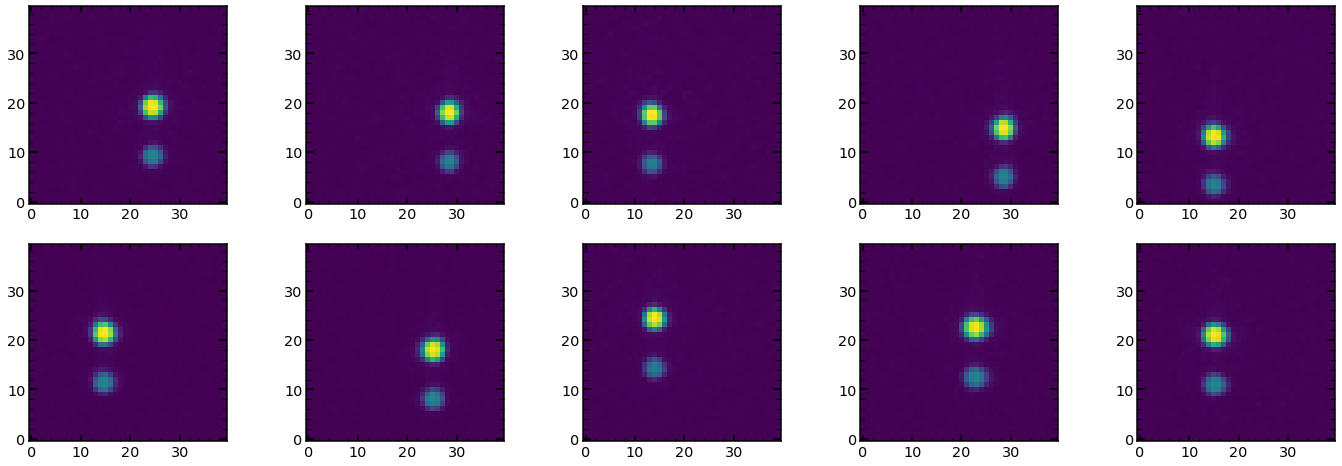

In [139]:

new_Sub_Aug04_2020_Kr_data_10_sec_cuts=[]
for i in range(10):
    new_Sub_Aug04_2020_Kr_data_10_sec_cuts.append(Subaru_Aug04_2020_Kr_data_10_sec[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,\
                                                                                     list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
"""
new_Subaru_data_Mar03_2020_cuts_15_sec=[]
for i in range(10):
    new_Subaru_data_Mar03_2020_cuts_15_sec.append(Subaru_Mar03_2020_HgAr_data_15_sec[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,\
                                                                                     list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])

new_Subaru_data_Mar03_2020_cuts_60_sec=[]
for i in range(10):
    new_Subaru_data_Mar03_2020_cuts_60_sec.append(Subaru_Mar03_2020_HgAr_data_60_sec[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,\
                                                                                    list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])

""" 
#for i in range(16):
#    new_data_Jan24_2019_cut25s_only_Ar.append(new_data_Jan24_2019_only_Ar[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])    

plt.figure(figsize=(24,8))
plt.subplot(251)
plt.imshow(new_Sub_Aug04_2020_Kr_data_10_sec_cuts[0],norm=LogNorm())
plt.subplot(252)
plt.imshow(new_Sub_Aug04_2020_Kr_data_10_sec_cuts[1],norm=LogNorm())
plt.subplot(253)
plt.imshow(new_Sub_Aug04_2020_Kr_data_10_sec_cuts[2],norm=LogNorm())
plt.subplot(254)
plt.imshow(new_Sub_Aug04_2020_Kr_data_10_sec_cuts[3],norm=LogNorm())

plt.subplot(255)
plt.imshow(new_Sub_Aug04_2020_Kr_data_10_sec_cuts[4],norm=LogNorm())
plt.subplot(256)
plt.imshow(new_Sub_Aug04_2020_Kr_data_10_sec_cuts[5],norm=LogNorm())
plt.subplot(257)
plt.imshow(new_Sub_Aug04_2020_Kr_data_10_sec_cuts[6],norm=LogNorm())
plt.subplot(258)
plt.imshow(new_Sub_Aug04_2020_Kr_data_10_sec_cuts[7],norm=LogNorm())

plt.subplot(259)
plt.imshow(new_Sub_Aug04_2020_Kr_data_10_sec_cuts[8],norm=LogNorm())
plt.subplot(2,5,10)
plt.imshow(new_Sub_Aug04_2020_Kr_data_10_sec_cuts[9],norm=LogNorm())


In [140]:
[np.max(image) for image in new_Sub_Aug04_2020_Kr_data_10_sec_cuts]

[9541.0,
 8057.0,
 6293.0,
 9742.0,
 8202.0,
 9281.0,
 9618.0,
 7292.0,
 8874.0,
 8956.0]

# all together

In [148]:
i=23203
data=fits.open('/Volumes/Saturn_USA/PFS/Subaru/raw/pfs/2020-08-05/sps/PFSA0'+str(i)+'12.fits')
Subaru_Aug05=data[1].data

## Argon 

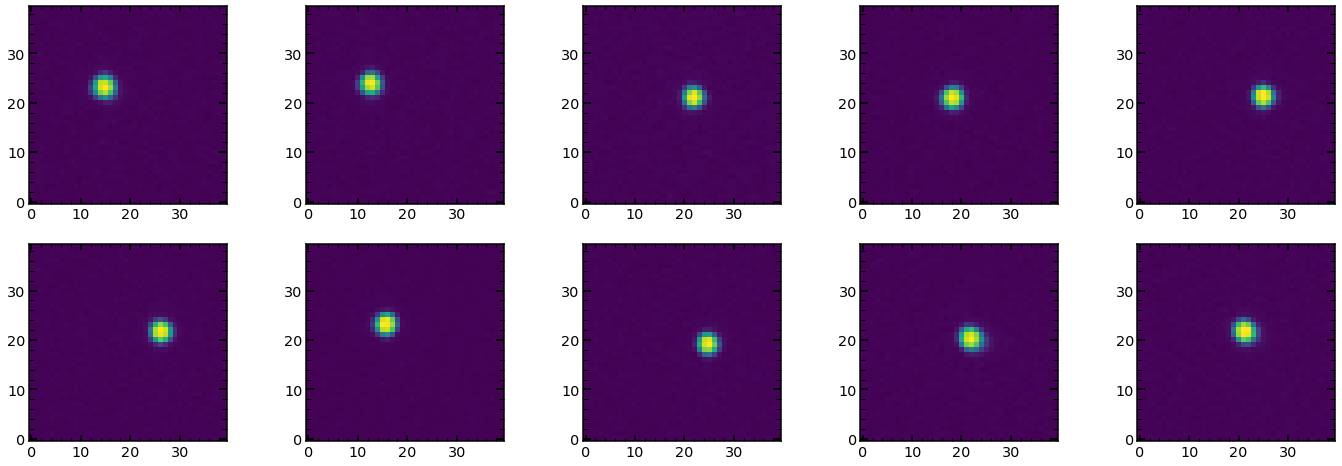

In [185]:
# we are looking at the spot that is at y=3376 for non-reduced images
size=20

list_of_x_coordinates=[86,481,731,1317,1708,2089,2618,3000,3952,4333]
list_of_y_coordinates=[3436,3416,3404,3394,3385,3387,3385,3396,3442,3421]

Subaru_Aug04_2020_Ar_data=[]
for i in range(10):
    Subaru_Aug04_2020_Ar_data.append(Subaru_Aug05[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,\
                                                                                     list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
    

for i in range(10):
    Subaru_Aug04_2020_Ar_data[i]=Subaru_Aug04_2020_Ar_data[i]-np.median(Subaru_Aug04_2020_Ne_data[i][:,0])

plt.figure(figsize=(24,8))
plt.subplot(251)
plt.imshow(Subaru_Aug04_2020_Ar_data[0],norm=LogNorm())
plt.subplot(252)
plt.imshow(Subaru_Aug04_2020_Ar_data[1],norm=LogNorm())
plt.subplot(253)
plt.imshow(Subaru_Aug04_2020_Ar_data[2],norm=LogNorm())
plt.subplot(254)
plt.imshow(Subaru_Aug04_2020_Ar_data[3],norm=LogNorm())

plt.subplot(255)
plt.imshow(Subaru_Aug04_2020_Ar_data[4],norm=LogNorm())
plt.subplot(256)
plt.imshow(Subaru_Aug04_2020_Ar_data[5],norm=LogNorm())
plt.subplot(257)
plt.imshow(Subaru_Aug04_2020_Ar_data[6],norm=LogNorm())
plt.subplot(258)
plt.imshow(Subaru_Aug04_2020_Ar_data[7],norm=LogNorm())

plt.subplot(259)
plt.imshow(Subaru_Aug04_2020_Ar_data[8],norm=LogNorm())
plt.subplot(2,5,10)
plt.imshow(Subaru_Aug04_2020_Ar_data[9],norm=LogNorm())


In [186]:
[np.max(image) for image in Subaru_Aug04_2020_Ar_data]

[4778.0,
 4260.0,
 3515.0,
 5111.0,
 4483.0,
 4994.0,
 4877.0,
 4037.0,
 4581.0,
 4410.0]

## Neon 

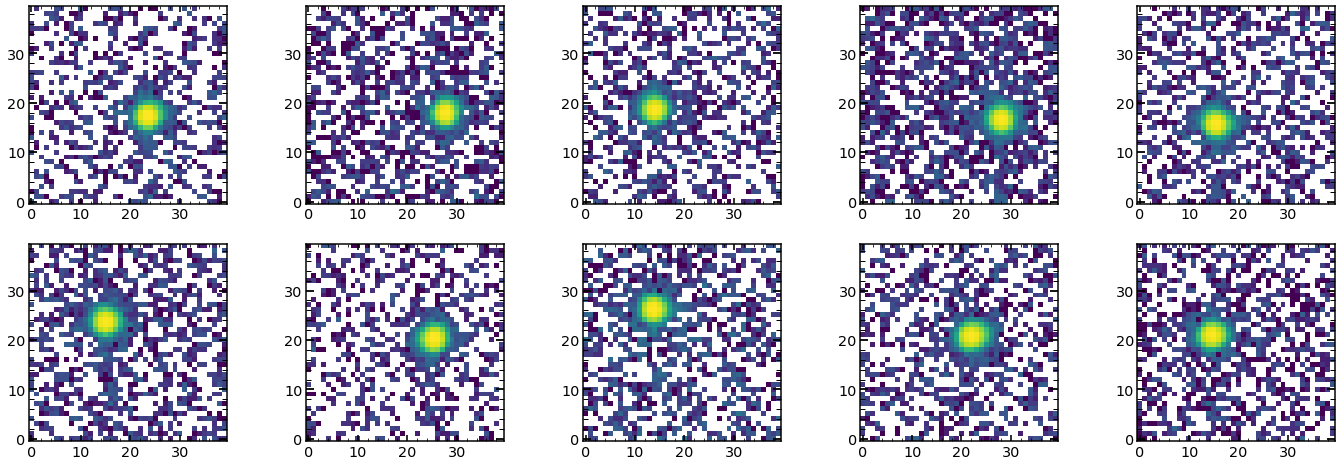

In [188]:
list_of_x_coordinates=[82,469,737,1308,1718,2100,2608,3012,3957,4343]
list_of_y_coordinates=np.array([1245,1230,1218,1212,1206,1200,1203,1203,1245,1230]    )+225 

Subaru_Aug04_2020_Ne_data=[]
for i in range(10):
    Subaru_Aug04_2020_Ne_data.append(Subaru_Aug05[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,\
                                                                                     list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])

for i in range(10):
    Subaru_Aug04_2020_Ne_data[i]=Subaru_Aug04_2020_Ne_data[i]-np.median(Subaru_Aug04_2020_Ne_data[i][:,0])


plt.figure(figsize=(24,8))
plt.subplot(251)
plt.imshow(Subaru_Aug04_2020_Ne_data[0],norm=LogNorm())
plt.subplot(252)
plt.imshow(Subaru_Aug04_2020_Ne_data[1],norm=LogNorm())
plt.subplot(253)
plt.imshow(Subaru_Aug04_2020_Ne_data[2],norm=LogNorm())
plt.subplot(254)
plt.imshow(Subaru_Aug04_2020_Ne_data[3],norm=LogNorm())

plt.subplot(255)
plt.imshow(Subaru_Aug04_2020_Ne_data[4],norm=LogNorm())
plt.subplot(256)
plt.imshow(Subaru_Aug04_2020_Ne_data[5],norm=LogNorm())
plt.subplot(257)
plt.imshow(Subaru_Aug04_2020_Ne_data[6],norm=LogNorm())
plt.subplot(258)
plt.imshow(Subaru_Aug04_2020_Ne_data[7],norm=LogNorm())

plt.subplot(259)
plt.imshow(Subaru_Aug04_2020_Ne_data[8],norm=LogNorm())
plt.subplot(2,5,10)
plt.imshow(Subaru_Aug04_2020_Ne_data[9],norm=LogNorm())


In [189]:
[np.max(image) for image in Subaru_Aug04_2020_Ne_data]

[3764.0,
 3169.0,
 2340.0,
 3957.0,
 3191.0,
 3719.0,
 3656.0,
 2603.5,
 3440.0,
 3668.0]

## Krypton 

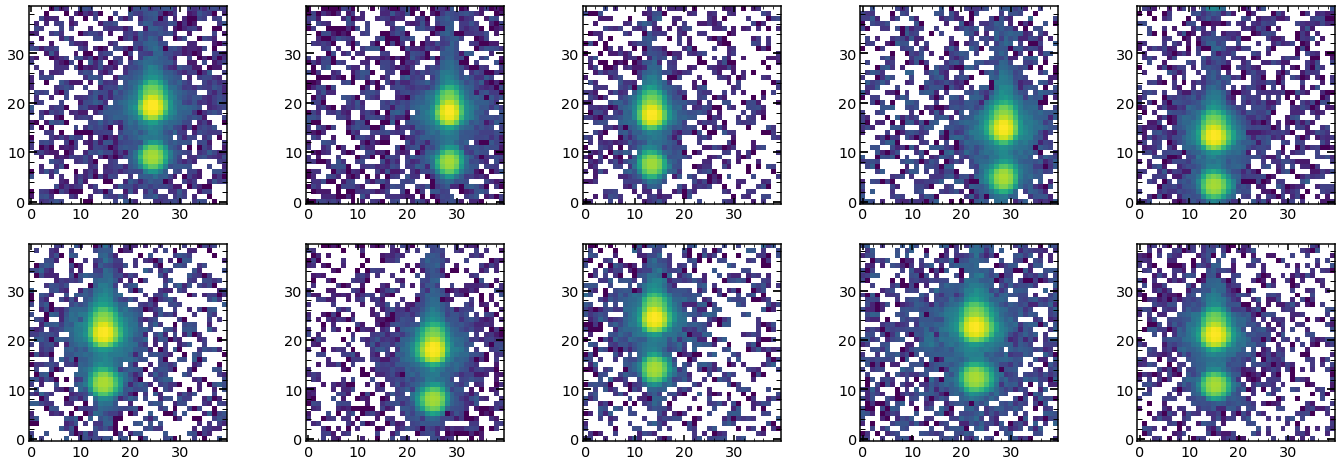

In [190]:
list_of_x_coordinates=[82,469,737,1308,1718,2100,2608,3012,3957,4343]
list_of_y_coordinates=np.array([1245,1230,1218,1212,1206,1200,1203,1203,1245,1230]   )+1004


Subaru_Aug04_2020_Kr_data=[]
for i in range(10):
    Subaru_Aug04_2020_Kr_data.append(Subaru_Aug05[list_of_y_coordinates[i]-size:list_of_y_coordinates[i]+size,\
                                                                                     list_of_x_coordinates[i]-size:list_of_x_coordinates[i]+size])
    
for i in range(10):
    Subaru_Aug04_2020_Kr_data[i]=Subaru_Aug04_2020_Kr_data[i]-np.median(Subaru_Aug04_2020_Kr_data[i][:,0])
    

plt.figure(figsize=(24,8))
plt.subplot(251)
plt.imshow(Subaru_Aug04_2020_Kr_data[0],norm=LogNorm())
plt.subplot(252)
plt.imshow(Subaru_Aug04_2020_Kr_data[1],norm=LogNorm())
plt.subplot(253)
plt.imshow(Subaru_Aug04_2020_Kr_data[2],norm=LogNorm())
plt.subplot(254)
plt.imshow(Subaru_Aug04_2020_Kr_data[3],norm=LogNorm())

plt.subplot(255)
plt.imshow(Subaru_Aug04_2020_Kr_data[4],norm=LogNorm())
plt.subplot(256)
plt.imshow(Subaru_Aug04_2020_Kr_data[5],norm=LogNorm())
plt.subplot(257)
plt.imshow(Subaru_Aug04_2020_Kr_data[6],norm=LogNorm())
plt.subplot(258)
plt.imshow(Subaru_Aug04_2020_Kr_data[7],norm=LogNorm())

plt.subplot(259)
plt.imshow(Subaru_Aug04_2020_Kr_data[8],norm=LogNorm())
plt.subplot(2,5,10)
plt.imshow(Subaru_Aug04_2020_Kr_data[9],norm=LogNorm())


In [191]:
[np.max(image) for image in Subaru_Aug04_2020_Kr_data]

[16469.0,
 13676.0,
 10048.0,
 16825.5,
 14057.0,
 16414.5,
 16679.0,
 11980.5,
 15352.5,
 15681.0]

## together 

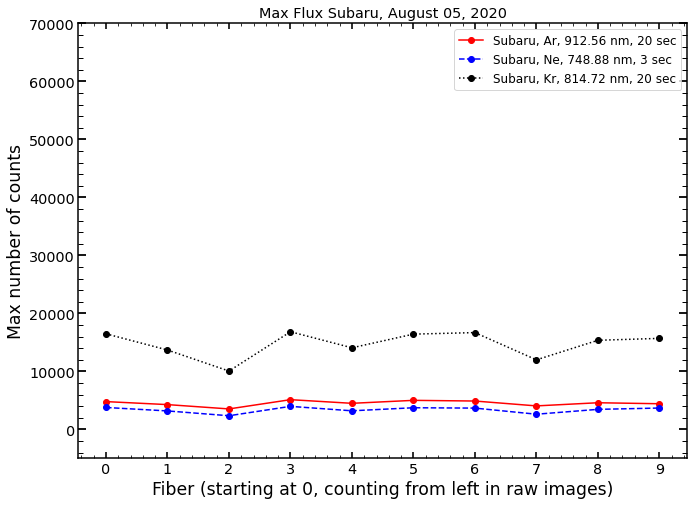

In [192]:
matplotlib.rcParams.update({'font.size': 12})   

plt.figure(figsize=(24,8))
plt.subplot(121)

plt.plot([np.max(image) for image in Subaru_Aug04_2020_Ar_data],marker='o',label='Subaru, Ar, 912.56 nm, 20 sec',color='red',ls='-')
plt.plot([np.max(image) for image in Subaru_Aug04_2020_Ne_data],marker='o',label='Subaru, Ne, 748.88 nm, 3 sec',color='blue',ls='--')
plt.plot([np.max(image) for image in Subaru_Aug04_2020_Kr_data],marker='o',label='Subaru, Kr, 814.72 nm, 20 sec',color='black',ls=':')

plt.xticks(range(10))
plt.ylim(-5000,70000)
plt.title('Max Flux Subaru, August 05, 2020')
plt.xlabel('Fiber (starting at 0, counting from left in raw images)')
plt.ylabel('Max number of counts')
plt.legend()

In [ ]:
1212+225 (748.88)

In [ ]:
3394 (912.56)

In [172]:
3394-(1212+225)

1957

In [173]:
912.56-748.88

163.67999999999995

In [174]:
1957/163.67999999999995

11.95625610948192

In [175]:
163.67999999999995/1957

0.08363822176801224

In [176]:
1212+1004

2216

In [177]:
2216-(1212+225)

779

In [179]:
779*0.08363822176801224+748.88

814.0341747572816